# <center><b>London Travel Demand Survey</b></center>

<center><b> April 2024</b></center>

In [2]:
!pip install xlrd 


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np  
import pandas as pd 


import sklearn
import statsmodels.api as sm 

import seaborn as sns
import matplotlib.pyplot as plt 

import os  


In [4]:
os.getcwd()

'/Users/levonmcgregor'

In [5]:
# Diplay hex values and colors in colorblind palette.
print(sns.color_palette("colorblind").as_hex())

sns.color_palette("colorblind")

# Assign color palette to local variable as cmap.
colorblind_list = sns.color_palette("colorblind", as_cmap=True)


# Assign individual colors from colorblind palette to local variables.
blue_dk = colorblind_list[0]
blue_lt = colorblind_list[9]
brown = colorblind_list[5]
green = colorblind_list[2]
grey = colorblind_list[7]
orange_dk = colorblind_list[3]
orange_lt = colorblind_list[1]
pink_dk = colorblind_list[4]
pink_lt = colorblind_list[6]
yellow = colorblind_list[8]

['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']


Data Source: London Travel Demand Survey https://tfl.gov.uk/corporate/about-tfl/how-we-work/planning-for-the-future/consultations-and-surveys   & includes data up to 2022/23 

In [6]:
df = pd.read_excel('ltds-0523-acc.xlsx',sheet_name=None)

In [7]:
df_trips = pd.read_excel('ltds-0523-acc.xlsx', sheet_name="Trips")
df_stages = pd.read_excel('ltds-0523-acc.xlsx', sheet_name="Stages")
df_trip_rates = pd.read_excel('ltds-0523-acc.xlsx', sheet_name="Trip rates")
df_stage_rates = pd.read_excel('ltds-0523-acc.xlsx', sheet_name="Stage rates")
df_trip_rates_wkdys = pd.read_excel('ltds-0523-acc.xlsx', sheet_name="Trip rates - weekdays")
df_trip_rates_wkends = pd.read_excel('ltds-0523-acc.xlsx', sheet_name="Trip rates - weekends")
df_mode_shares = pd.read_excel('ltds-0523-acc.xlsx', sheet_name="Mode shares")
df_purpose_shares = pd.read_excel('ltds-0523-acc.xlsx', sheet_name="Purpose shares")
df_travel_times = pd.read_excel('ltds-0523-acc.xlsx', sheet_name="Travel times")
df_travel_distances = pd.read_excel('ltds-0523-acc.xlsx', sheet_name="Travel distances")

### Trips Greater London 

In [8]:
df_trips 
#subsetting dataset to isolate greater london summaries 
df_trips_gtr_ldn = df_trips.iloc[2:12,0:17]
df_trips_gtr_ldn

#set column names equal to values in row index position 0
df_trips_gtr_ldn.columns = df_trips_gtr_ldn.iloc[0]

#remove first row from DataFrame
df_trips_gtr_ldn = df_trips_gtr_ldn[1:]
df_trips_gtr_ldn

df_trips_gtr_ldn = df_trips_gtr_ldn.T
df_trips_gtr_ldn

# Set the first row as the header
df_trips_gtr_ldn.columns = df_trips_gtr_ldn.iloc[0]
df_trips_gtr_ldn

df_trips_gtr_ldn.index.rename('Year_Date', inplace=True)

df_trips_gtr_ldn = df_trips_gtr_ldn[1:]
df_trips_gtr_ldn

df_trips_gtr_ldn = df_trips_gtr_ldn.T
df_trips_gtr_ldn
df_trips_gtr_ldn.T

Greater London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,776010,1192066,2470533,190387,5235096,2339886,84306,292407,5560346
2006/07,765514,1265644,2597678,275740,5097403,2589102,87629,313153,5701901
2007/08,752692,1339351,2593402,240848,5125075,2575463,93850,339523,5730691
2008/09,809296,1365011,2682388,187576,4500067,2210348,94470,332203,5271452
2009/10,849546,1308377,2637303,214387,4552362,2314611,90409,357458,5328854
2010/11,924690,1470972,2806137,250753,4763939,2345919,63388,402952,5472124
2011/12,947518,1476535,2829366,252529,4886381,2448756,80988,526273,5798337
2012/13,1061933,1624124,2821797,260354,4701672,2305073,90278,489427,6046066
2013/14,1007982,1560290,2987290,254256,4964768,2498415,71358,527003,5869278


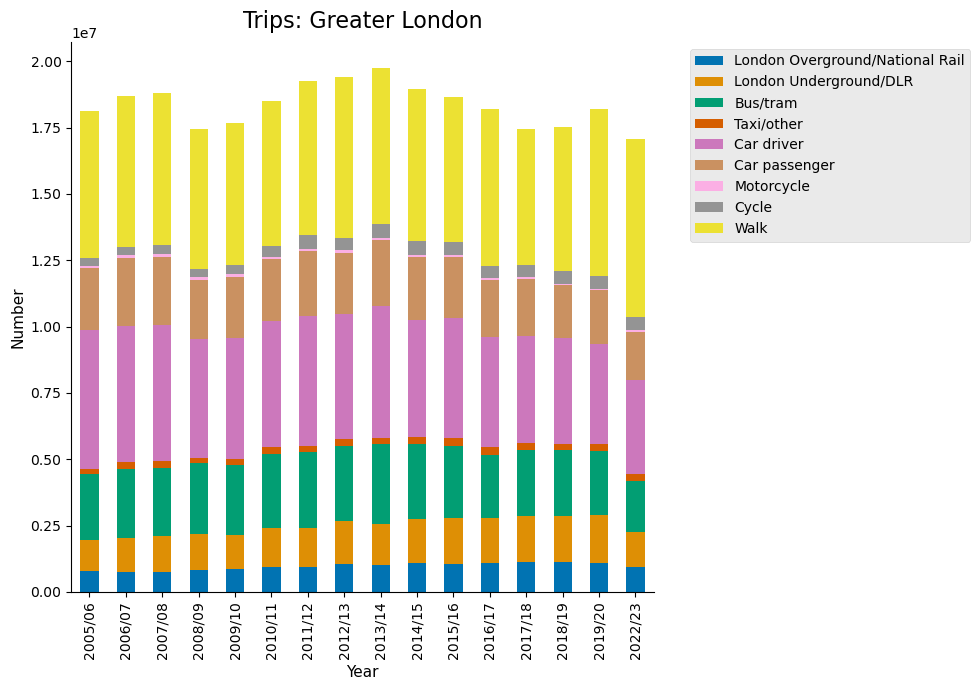

In [9]:
fig, ax = plt.subplots(figsize=(10, 7))

# Get the "colorblind" palette
colors = sns.color_palette("colorblind", n_colors=len(df_trips_gtr_ldn))                
df_trips_gtr_ldn.T.plot(kind='bar', stacked=True, color=colors,  ax=ax)
plt.title("Trips: Greater London", fontsize=16, color="black", pad=10)
plt.ylabel("Number",fontsize=11)
plt.xlabel("Year",fontsize=11)

sns.plotting_context("notebook")
sns.despine()

plt.style.use('ggplot')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.tight_layout()

plt.savefig("df_trips_gtr_ldn.png")

plt.show()


### Travel Stages Greater London 

In [10]:
df_stages
#subsetting dataset to isolate greater london summaries 
df_stages_gtr_ldn = df_stages.iloc[2:11,0:17]
df_stages_gtr_ldn

#set column names equal to values in row index position 0
df_stages_gtr_ldn.columns = df_stages_gtr_ldn.iloc[0]

#remove first row from DataFrame
df_stages_gtr_ldn = df_stages_gtr_ldn[1:]
df_stages_gtr_ldn

df_stages_gtr_ldn = df_stages_gtr_ldn.T
df_stages_gtr_ldn

# Set the first row as the header
df_stages_gtr_ldn.columns = df_stages_gtr_ldn.iloc[0]
df_stages_gtr_ldn

df_stages_gtr_ldn.index.rename('Year_Date', inplace=True)

df_stages_gtr_ldn = df_stages_gtr_ldn[1:]
df_stages_gtr_ldn

df_stages_gtr_ldn = df_stages_gtr_ldn.T
df_stages_gtr_ldn
df_stages_gtr_ldn.T

Greater London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle
Year_Date,,,,,,,,
2005/06,941321,2122429,3822178,271508,5563161,2481844,86228,308563
2006/07,942426,2292432,3881726,326886,5365417,2752076,88348,331885
2007/08,916331,2462240,3842925,289634,5291061,2623801,94592,351589
2008/09,972709,2422137,4044960,221185,4627530,2256135,94953,342561
2009/10,1029940,2408169,4010293,250684,4662294,2383200,91339,379873
2010/11,1179799,2645117,4190143,272966,4860103,2403895,63790,427349
2011/12,1220928,2670596,4155471,291848,5019083,2522203,80988,569894
2012/13,1318980,2898885,4265612,297462,4816425,2396897,91788,524363
2013/14,1287428,2832832,4472520,285692,5082549,2589452,71358,555235


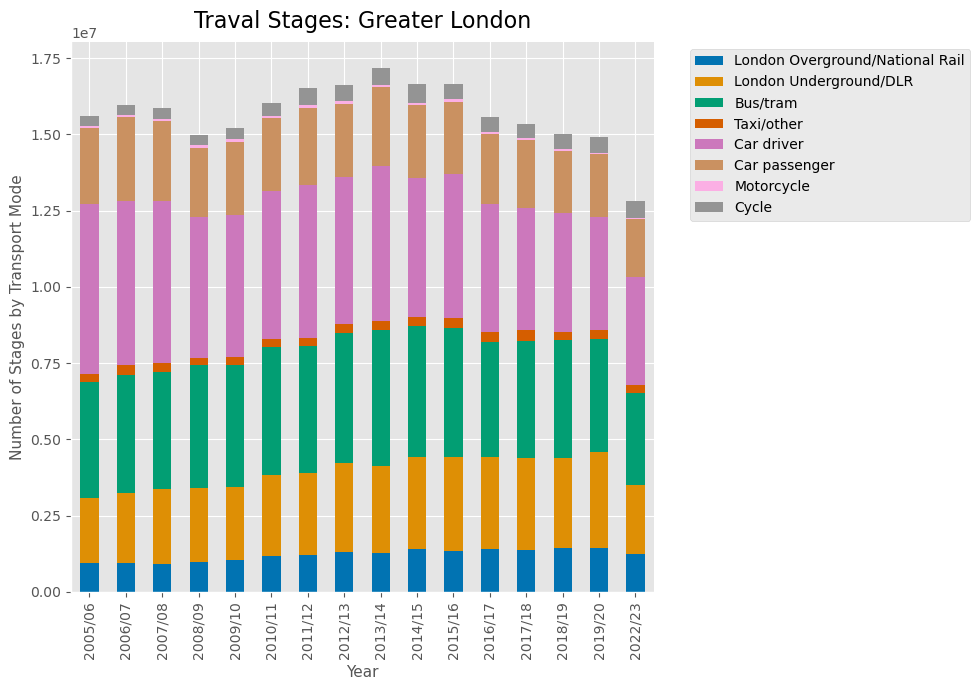

In [11]:
fig, ax = plt.subplots(figsize=(10, 7))

# Get the "colorblind" palette
colors = sns.color_palette("colorblind", n_colors=len(df_stages_gtr_ldn))                
df_stages_gtr_ldn.T.plot(kind='bar', stacked=True, color=colors,  ax=ax)
plt.title("Traval Stages: Greater London", fontsize=16, color="black", pad=10)
plt.ylabel("Number of Stages by Transport Mode",fontsize=11)
plt.xlabel("Year",fontsize=11)

sns.plotting_context("notebook")
sns.despine()

plt.style.use('ggplot')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.tight_layout()

plt.savefig("df_stages_gtr_ldn.png")

plt.show()


### Trip Rates Greater London 

In [12]:
df_trip_rates
#subsetting dataset to isolate greater london summaries 
df_trip_rates_gtr_ldn = df_trip_rates.iloc[2:12,0:17]
df_trip_rates_gtr_ldn

#set column names equal to values in row index position 0
df_trip_rates_gtr_ldn.columns = df_trip_rates_gtr_ldn.iloc[0]

#remove first row from DataFrame
df_trip_rates_gtr_ldn = df_trip_rates_gtr_ldn[1:]
df_trip_rates_gtr_ldn

df_trip_rates_gtr_ldn = df_trip_rates_gtr_ldn.T
df_trip_rates_gtr_ldn

# Set the first row as the header
df_trip_rates_gtr_ldn.columns = df_trip_rates_gtr_ldn.iloc[0]
df_trip_rates_gtr_ldn

df_trip_rates_gtr_ldn.index.rename('Year_Date', inplace=True)

df_trip_rates_gtr_ldn = df_trip_rates_gtr_ldn[1:]
df_trip_rates_gtr_ldn

df_trip_rates_gtr_ldn = df_trip_rates_gtr_ldn.T
df_trip_rates_gtr_ldn
df_trip_rates_gtr_ldn.T

Greater London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,0.11059,0.16988,0.35207,0.02713,0.74605,0.33345,0.01201,0.04167,0.7924
2006/07,0.10811,0.17875,0.36687,0.03894,0.71991,0.36566,0.01238,0.04423,0.80528
2007/08,0.10515,0.18711,0.36231,0.03365,0.71599,0.3598,0.01311,0.04743,0.8006
2008/09,0.1115,0.18807,0.36957,0.02584,0.62001,0.30454,0.01302,0.04577,0.72629
2009/10,0.11526,0.17751,0.3578,0.02909,0.61762,0.31402,0.01227,0.0485,0.72297
2010/11,0.12372,0.19681,0.37544,0.03355,0.63738,0.31387,0.00848,0.05391,0.73213
2011/12,0.1245,0.19401,0.37177,0.03318,0.64205,0.32176,0.01064,0.06915,0.76188
2012/13,0.1372,0.20983,0.36457,0.03347,0.60745,0.29781,0.01166,0.06323,0.78114
2013/14,0.12851,0.19892,0.38085,0.03241,0.63295,0.31852,0.0091,0.06719,0.74827


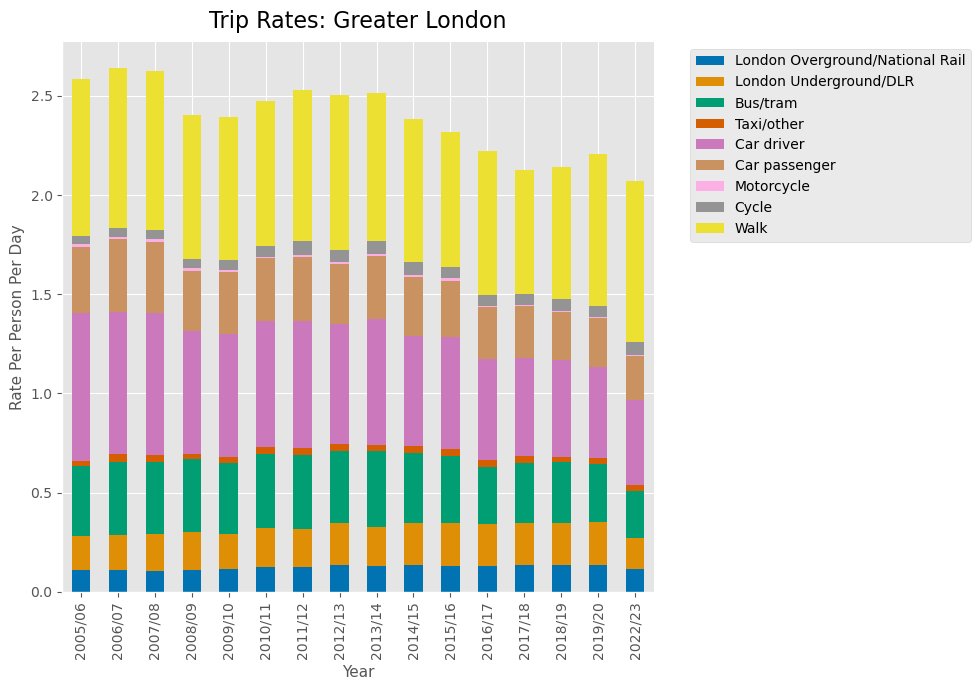

In [13]:
fig, ax = plt.subplots(figsize=(10, 7))

# Get the "colorblind" palette
colors = sns.color_palette("colorblind", n_colors=len(df_trip_rates))                
df_trip_rates_gtr_ldn.T.plot(kind='bar', stacked=True, color=colors,  ax=ax)
plt.title("Trip Rates: Greater London", fontsize=16, color="black", pad=10)
plt.ylabel("Rate Per Person Per Day",fontsize=11)
plt.xlabel("Year",fontsize=11)

sns.plotting_context("notebook")
sns.despine()

plt.style.use('ggplot')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.tight_layout()

plt.savefig("df_trip_rates_gtr_ldn.png")

plt.show()


### Stage Rates Greater London 

In [14]:
df_stage_rates
#subsetting dataset to isolate greater london summaries 
df_stage_rates_gtr_ldn = df_stage_rates.iloc[2:11,0:17]
df_stage_rates_gtr_ldn

#set column names equal to values in row index position 0
df_stage_rates_gtr_ldn.columns = df_stage_rates_gtr_ldn.iloc[0]

#remove first row from DataFrame
df_stage_rates_gtr_ldn = df_stage_rates_gtr_ldn[1:]
df_stage_rates_gtr_ldn

df_stage_rates_gtr_ldn = df_stage_rates_gtr_ldn.T
df_stage_rates_gtr_ldn

# Set the first row as the header
df_stage_rates_gtr_ldn.columns = df_stage_rates_gtr_ldn.iloc[0]
df_stage_rates_gtr_ldn

df_stage_rates_gtr_ldn.index.rename('Year_Date', inplace=True)

df_stage_rates_gtr_ldn = df_stage_rates_gtr_ldn[1:]
df_stage_rates_gtr_ldn

df_stage_rates_gtr_ldn = df_stage_rates_gtr_ldn.T
df_stage_rates_gtr_ldn
df_stage_rates_gtr_ldn.T

Greater London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle
Year_Date,,,,,,,,
2005/06,0.13415,0.30247,0.54469,0.03869,0.7928,0.35369,0.01229,0.04397
2006/07,0.1331,0.32376,0.54822,0.04617,0.75776,0.38868,0.01248,0.04687
2007/08,0.12801,0.34398,0.53687,0.04046,0.73918,0.36655,0.01321,0.04912
2008/09,0.13402,0.33372,0.5573,0.03047,0.63757,0.31084,0.01308,0.0472
2009/10,0.13973,0.32672,0.54408,0.03401,0.63253,0.32333,0.01239,0.05154
2010/11,0.15785,0.3539,0.56061,0.03652,0.65025,0.32163,0.00853,0.05718
2011/12,0.16043,0.35091,0.54601,0.03835,0.65949,0.33141,0.01064,0.07488
2012/13,0.17041,0.37453,0.55111,0.03843,0.62228,0.30968,0.01186,0.06775
2013/14,0.16413,0.36116,0.5702,0.03642,0.64797,0.33013,0.0091,0.07079


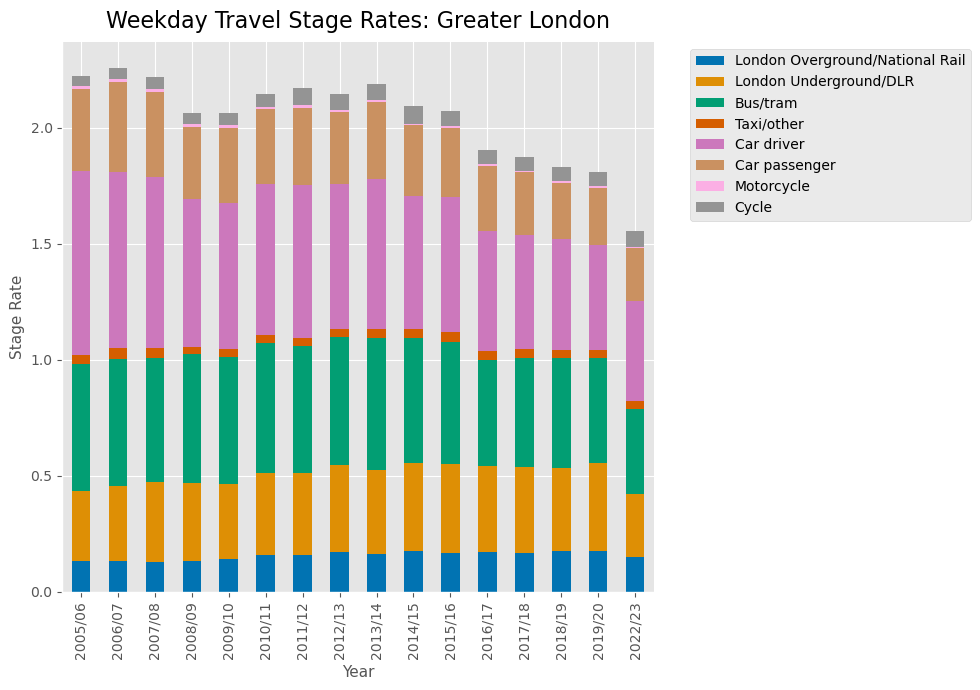

In [15]:
fig, ax = plt.subplots(figsize=(10, 7))

# Get the "colorblind" palette
colors = sns.color_palette("colorblind", n_colors=len(df_stage_rates_gtr_ldn))                
df_stage_rates_gtr_ldn.T.plot(kind='bar', stacked=True, color=colors,  ax=ax)
plt.title("Weekday Travel Stage Rates: Greater London", fontsize=16, color="black", pad=10)
plt.ylabel("Stage Rate",fontsize=11)
plt.xlabel("Year",fontsize=11)

sns.plotting_context("notebook")
sns.despine()

plt.style.use('ggplot')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.tight_layout()

plt.savefig("df_stage_rates_wkdys_gtr_ldn.png")

plt.show()


### Trip Rates Weekdays Greater London 

In [16]:
df_trip_rates_wkdys
#subsetting dataset to isolate greater london summaries 
df_trip_rates_wkdys_gtr_ldn = df_trip_rates_wkdys.iloc[2:12,0:17]
df_trip_rates_wkdys_gtr_ldn

#set column names equal to values in row index position 0
df_trip_rates_wkdys_gtr_ldn.columns = df_trip_rates_wkdys_gtr_ldn.iloc[0]

#remove first row from DataFrame
df_trip_rates_wkdys_gtr_ldn = df_trip_rates_wkdys_gtr_ldn[1:]
df_trip_rates_wkdys_gtr_ldn

df_trip_rates_wkdys_gtr_ldn = df_trip_rates_wkdys_gtr_ldn.T
df_trip_rates_wkdys_gtr_ldn

# Set the first row as the header
df_trip_rates_wkdys_gtr_ldn.columns = df_trip_rates_wkdys_gtr_ldn.iloc[0]
df_trip_rates_wkdys_gtr_ldn

df_trip_rates_wkdys_gtr_ldn.index.rename('Year_Date', inplace=True)

df_trip_rates_wkdys_gtr_ldn = df_trip_rates_wkdys_gtr_ldn[1:]
df_trip_rates_wkdys_gtr_ldn

df_trip_rates_wkdys_gtr_ldn = df_trip_rates_wkdys_gtr_ldn.T
df_trip_rates_wkdys_gtr_ldn
df_trip_rates_wkdys_gtr_ldn.T

Greater London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,0.13153,0.19941,0.39706,0.02623,0.80211,0.31119,0.01292,0.04282,0.82266
2006/07,0.12893,0.20948,0.40394,0.03974,0.75099,0.30983,0.0151,0.04724,0.86579
2007/08,0.13253,0.21353,0.39784,0.03553,0.74158,0.30615,0.01527,0.0527,0.86657
2008/09,0.13901,0.22326,0.41752,0.02428,0.63674,0.25483,0.01724,0.05467,0.78938
2009/10,0.13458,0.21451,0.39711,0.0277,0.64437,0.27313,0.01391,0.0523,0.75425
2010/11,0.14693,0.22926,0.41545,0.02723,0.6603,0.25844,0.00981,0.06048,0.77833
2011/12,0.14385,0.22983,0.41083,0.03387,0.65815,0.26972,0.01298,0.07268,0.82282
2012/13,0.15824,0.23522,0.40526,0.03134,0.63286,0.24638,0.01403,0.07213,0.84223
2013/14,0.15243,0.2364,0.4162,0.03093,0.66008,0.26942,0.01008,0.07632,0.80766


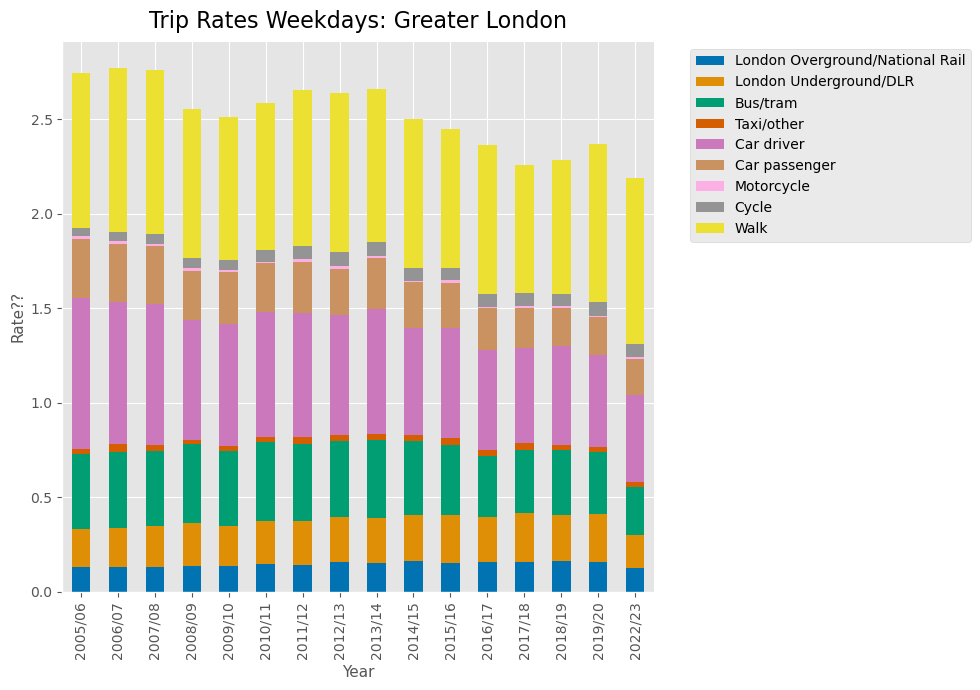

<Figure size 640x480 with 0 Axes>

In [17]:
fig, ax = plt.subplots(figsize=(10, 7))

# Get the "colorblind" palette
colors = sns.color_palette("colorblind", n_colors=len(df_trip_rates_wkdys_gtr_ldn))                
df_trip_rates_wkdys_gtr_ldn.T.plot(kind='bar', stacked=True, color=colors,  ax=ax)
plt.title("Trip Rates Weekdays: Greater London", fontsize=16, color="black", pad=10)
plt.ylabel("Rate??",fontsize=11)
plt.xlabel("Year",fontsize=11)

sns.plotting_context("notebook")
sns.despine()

plt.style.use('ggplot')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.tight_layout()


plt.show()
plt.savefig("df_trip_rates_wkdys_gtr_ldn.pdf")

### Trip Rates Weekend Greater London 

In [18]:
df_trip_rates_wkends
#subsetting dataset to isolate greater london summaries 
df_trip_rates_wkends_gtr_ldn = df_trip_rates_wkends.iloc[2:12,0:17]
df_trip_rates_wkends_gtr_ldn

#set column names equal to values in row index position 0
df_trip_rates_wkends_gtr_ldn.columns = df_trip_rates_wkends_gtr_ldn.iloc[0]

#remove first row from DataFrame
df_trip_rates_wkends_gtr_ldn = df_trip_rates_wkends_gtr_ldn[1:]
df_trip_rates_wkends_gtr_ldn

df_trip_rates_wkends_gtr_ldn = df_trip_rates_wkends_gtr_ldn.T
df_trip_rates_wkends_gtr_ldn

# Set the first row as the header
df_trip_rates_wkends_gtr_ldn.columns = df_trip_rates_wkends_gtr_ldn.iloc[0]
df_trip_rates_wkends_gtr_ldn

df_trip_rates_wkends_gtr_ldn.index.rename('Year_Date', inplace=True)

df_trip_rates_wkends_gtr_ldn = df_trip_rates_wkends_gtr_ldn[1:]
df_trip_rates_wkends_gtr_ldn

df_trip_rates_wkends_gtr_ldn = df_trip_rates_wkends_gtr_ldn.T
df_trip_rates_wkends_gtr_ldn
df_trip_rates_wkends_gtr_ldn.T

Greater London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,0.05327,0.10069,0.24067,0.02834,0.59553,0.40245,0.00918,0.03626,0.69907
2006/07,0.05301,0.10388,0.2671,0.03687,0.61864,0.49821,0.00543,0.03485,0.63686
2007/08,0.03962,0.12888,0.27295,0.03036,0.66055,0.49867,0.00922,0.03447,0.64279
2008/09,0.05096,0.11084,0.27122,0.03143,0.60486,0.44504,0.0027,0.02677,0.60634
2009/10,0.07092,0.08989,0.25841,0.03161,0.55698,0.41853,0.0081,0.0412,0.65088
2010/11,0.06873,0.11157,0.27002,0.0513,0.58535,0.45671,0.00534,0.04207,0.62102
2011/12,0.07992,0.11441,0.28072,0.032,0.61526,0.4507,0.00479,0.06225,0.62606
2012/13,0.09116,0.14979,0.26483,0.04007,0.5573,0.43306,0.00584,0.04371,0.65304
2013/14,0.0815,0.11504,0.31097,0.03475,0.58962,0.45314,0.00747,0.04983,0.63396


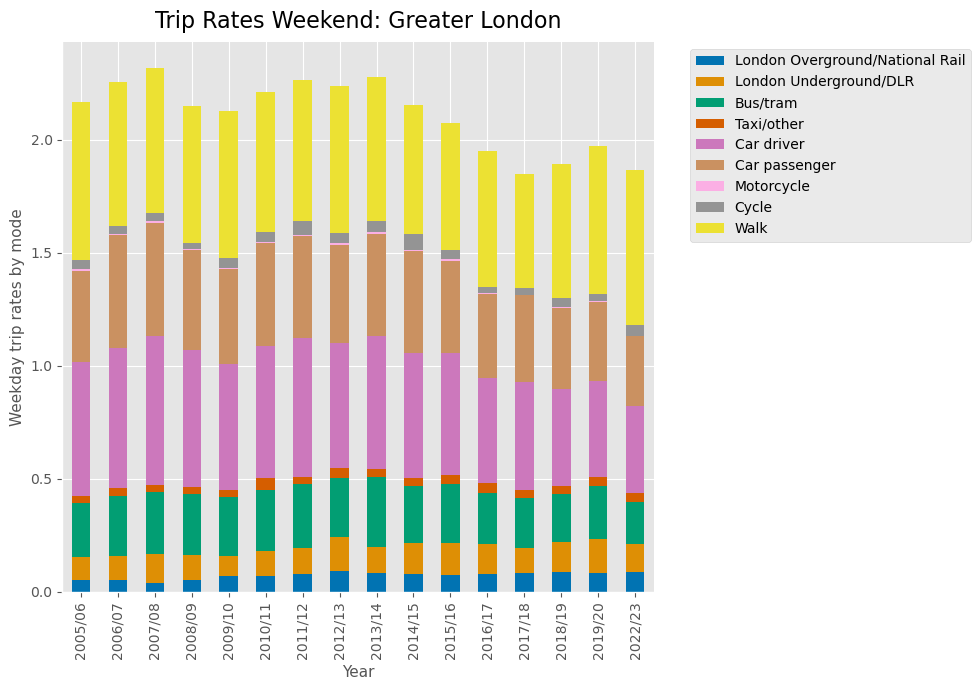

<Figure size 640x480 with 0 Axes>

In [19]:
fig, ax = plt.subplots(figsize=(10, 7))

# Get the "colorblind" palette
colors = sns.color_palette("colorblind", n_colors=len(df_trip_rates_wkends_gtr_ldn))                
df_trip_rates_wkends_gtr_ldn.T.plot(kind='bar', stacked=True, color=colors,  ax=ax)
plt.title("Trip Rates Weekend: Greater London", fontsize=16, color="black", pad=10)
plt.ylabel("Weekday trip rates by mode",fontsize=11)
plt.xlabel("Year",fontsize=11)

sns.plotting_context("notebook")
sns.despine()

plt.style.use('ggplot')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.tight_layout()


plt.show()
plt.savefig("df_trip_rates_wkends_gtr_ldn.pdf")

### Mode Shares Greater London 

In [20]:
df_mode_shares
#subsetting dataset to isolate greater london summaries 
df_mode_shares_gtr_ldn = df_mode_shares.iloc[2:12,0:17]
df_mode_shares_gtr_ldn

#set column names equal to values in row index position 0
df_mode_shares_gtr_ldn.columns = df_mode_shares_gtr_ldn.iloc[0]

#remove first row from DataFrame
df_mode_shares_gtr_ldn = df_mode_shares_gtr_ldn[1:]
df_mode_shares_gtr_ldn

df_mode_shares_gtr_ldn = df_mode_shares_gtr_ldn.T
df_mode_shares_gtr_ldn

# Set the first row as the header
df_mode_shares_gtr_ldn.columns = df_mode_shares_gtr_ldn.iloc[0]
df_mode_shares_gtr_ldn

df_mode_shares_gtr_ldn.index.rename('Year_Date', inplace=True)

df_mode_shares_gtr_ldn = df_mode_shares_gtr_ldn[1:]
df_mode_shares_gtr_ldn

df_mode_shares_gtr_ldn = df_mode_shares_gtr_ldn.T
df_mode_shares_gtr_ldn
df_mode_shares_gtr_ldn.T

Greater London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,0.04278,0.06571,0.13618,0.01049,0.28858,0.12898,0.00465,0.01612,0.30651
2006/07,0.04095,0.0677,0.13896,0.01475,0.27268,0.1385,0.00469,0.01675,0.30502
2007/08,0.04006,0.07128,0.13801,0.01282,0.27274,0.13706,0.00499,0.01807,0.30497
2008/09,0.04637,0.07821,0.15369,0.01075,0.25784,0.12665,0.00541,0.01903,0.30204
2009/10,0.04812,0.07412,0.14939,0.01214,0.25788,0.13111,0.00512,0.02025,0.30186
2010/11,0.04998,0.07951,0.15168,0.01355,0.2575,0.1268,0.00343,0.02178,0.29578
2011/12,0.04923,0.07672,0.14701,0.01312,0.25388,0.12723,0.00421,0.02734,0.30126
2012/13,0.05474,0.08372,0.14546,0.01202,0.24236,0.11882,0.00465,0.02523,0.31166
2013/14,0.05106,0.07904,0.15133,0.01216,0.2515,0.12656,0.00361,0.0267,0.29732


In [21]:

df = df_mode_shares_gtr_ldn.T
df.to_excel('mode_share_greater_ldn.xlsx', index=True, header=True)

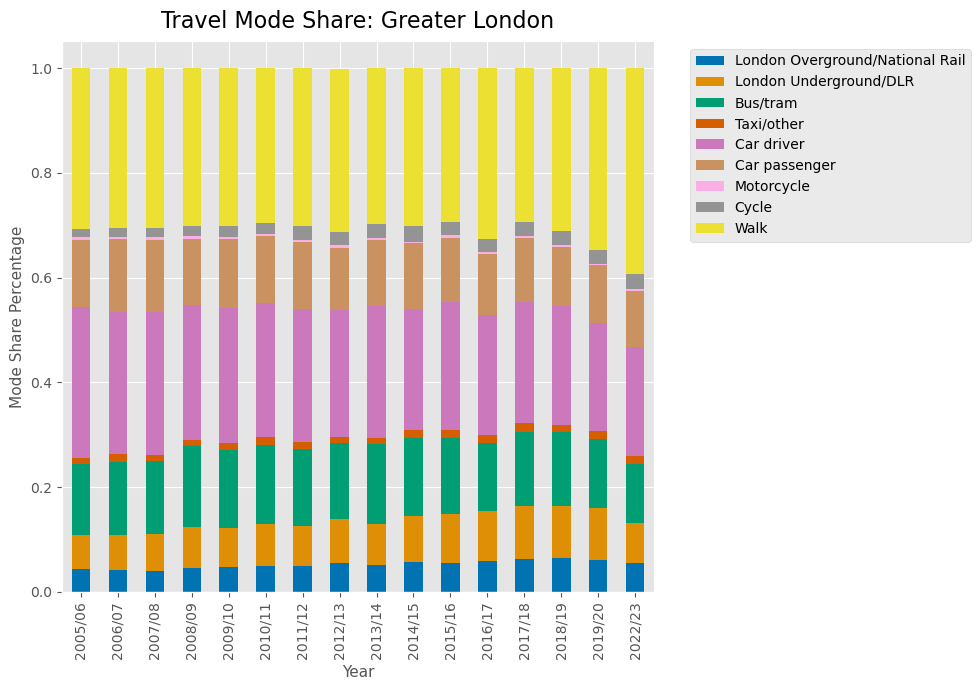

In [22]:
fig, ax = plt.subplots(figsize=(10, 7))

# Get the "colorblind" palette
colors = sns.color_palette("colorblind", n_colors=len(df_mode_shares_gtr_ldn))                
df_mode_shares_gtr_ldn.T.plot(kind='bar', stacked=True, color=colors,  ax=ax)
plt.title("Travel Mode Share: Greater London", fontsize=16, color="black", pad=10)
plt.ylabel("Mode Share Percentage",fontsize=11)
plt.xlabel("Year",fontsize=11)

sns.plotting_context("notebook")
sns.despine()

plt.style.use('ggplot')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.tight_layout()

plt.savefig("df_mode_shares_gtr_ldn.png")

plt.show()



### Purpose Share Greater London 

In [23]:
df_purpose_shares
#subsetting dataset to isolate greater london summaries 
df_purpose_shares_gtr_ldn = df_purpose_shares.iloc[2:9,0:17]
df_purpose_shares_gtr_ldn

#set column names equal to values in row index position 0
df_purpose_shares_gtr_ldn.columns = df_purpose_shares_gtr_ldn.iloc[0]

#remove first row from DataFrame
df_purpose_shares_gtr_ldn = df_purpose_shares_gtr_ldn[1:]
df_purpose_shares_gtr_ldn

df_purpose_shares_gtr_ldn = df_purpose_shares_gtr_ldn.T
df_purpose_shares_gtr_ldn

# Set the first row as the header
df_purpose_shares_gtr_ldn.columns = df_purpose_shares_gtr_ldn.iloc[0]
df_purpose_shares_gtr_ldn

df_purpose_shares_gtr_ldn.index.rename('Year_Date', inplace=True)

df_purpose_shares_gtr_ldn = df_purpose_shares_gtr_ldn[1:]
df_purpose_shares_gtr_ldn

df_purpose_shares_gtr_ldn = df_purpose_shares_gtr_ldn.T
df_purpose_shares_gtr_ldn
df_purpose_shares_gtr_ldn.T

Greater London,Commuting,Other work,Education,Shopping and personal business,Leisure,Other (including escort)
Year_Date,,,,,,
2005/06,0.18154,0.05112,0.10227,0.30276,0.22035,0.14195
2006/07,0.17178,0.05825,0.08069,0.29552,0.26108,0.13268
2007/08,0.16039,0.06344,0.08099,0.30281,0.26121,0.13115
2008/09,0.17101,0.05718,0.08375,0.29163,0.27566,0.12077
2009/10,0.16854,0.06258,0.08664,0.28742,0.2757,0.11911
2010/11,0.16392,0.06298,0.08518,0.29056,0.26909,0.12827
2011/12,0.15125,0.0596,0.07695,0.29743,0.28101,0.13375
2012/13,0.15259,0.06487,0.07755,0.27595,0.28847,0.14057
2013/14,0.15792,0.06691,0.08064,0.25633,0.29154,0.14665


In [24]:

df = df_purpose_shares_gtr_ldn.T
df.to_excel('purpose_share_greater_ldn.xlsx', index=True, header=True)

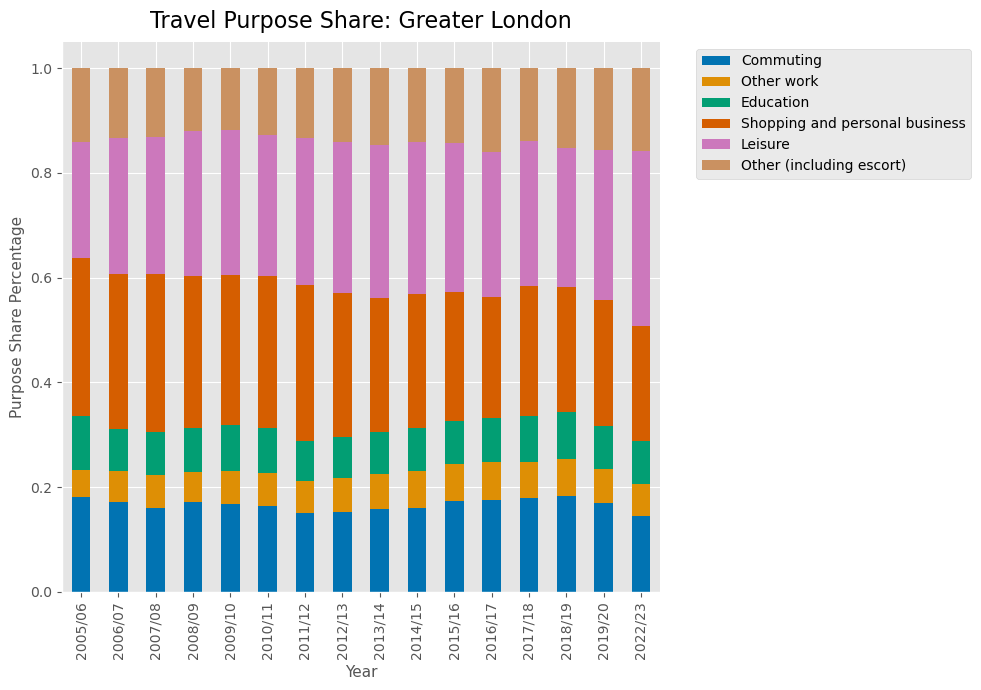

In [25]:
fig, ax = plt.subplots(figsize=(10, 7))

# Get the "colorblind" palette
colors = sns.color_palette("colorblind", n_colors=len(df_purpose_shares_gtr_ldn))                
df_purpose_shares_gtr_ldn.T.plot(kind='bar', stacked=True, color=colors,  ax=ax)
plt.title("Travel Purpose Share: Greater London", fontsize=16, color="black", pad=10)
plt.ylabel("Purpose Share Percentage",fontsize=11)
plt.xlabel("Year",fontsize=11)

sns.plotting_context("notebook")
sns.despine()

plt.style.use('ggplot')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.tight_layout()

#plt.subplots_adjust(left=0.1)

plt.savefig("df_purpose_shares_gtr_ldn.pdf")

plt.show()

### Travel Times Greater London 

In [26]:
df_travel_times
#subsetting dataset to isolate greater london summaries 
df_travel_times_gtr_ldn = df_travel_times.iloc[2:12,0:17]
df_travel_times_gtr_ldn

#set column names equal to values in row index position 0
df_travel_times_gtr_ldn.columns = df_travel_times_gtr_ldn.iloc[0]

#remove first row from DataFrame
df_travel_times_gtr_ldn = df_travel_times_gtr_ldn[1:]
df_travel_times_gtr_ldn

df_travel_times_gtr_ldn = df_travel_times_gtr_ldn.T
df_travel_times_gtr_ldn

# Set the first row as the header
df_travel_times_gtr_ldn.columns = df_travel_times_gtr_ldn.iloc[0]
df_travel_times_gtr_ldn

df_travel_times_gtr_ldn.index.rename('Year_Date', inplace=True)

df_travel_times_gtr_ldn = df_travel_times_gtr_ldn[1:]
df_travel_times_gtr_ldn

df_travel_times_gtr_ldn = df_travel_times_gtr_ldn.T
df_travel_times_gtr_ldn
df_travel_times_gtr_ldn.T

Greater London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,7.1807,8.61918,14.72084,0.79923,18.38846,8.05167,0.32634,0.85779,13.29079
2006/07,7.62371,9.33096,14.31911,1.35983,18.13379,9.39444,0.31131,0.95764,11.78648
2007/08,7.07674,9.56833,13.8784,1.09224,17.49233,8.62233,0.33177,0.95899,10.38818
2008/09,7.64323,9.88055,14.64487,0.7523,16.65327,7.64053,0.36784,0.99616,9.3787
2009/10,8.11137,9.29977,14.28664,0.94117,16.25766,8.04064,0.32081,0.92771,9.62111
2010/11,8.3991,10.2596,14.43314,0.89436,16.4446,7.49694,0.25685,1.13389,9.29596
2011/12,8.51187,9.90181,13.91299,0.84809,15.02607,7.80532,0.2913,1.47794,9.52565
2012/13,9.55409,10.41761,14.06501,1.09349,14.13144,7.47125,0.33474,1.31647,9.64961
2013/14,8.64996,10.11874,14.87473,0.91106,14.87093,7.50566,0.23736,1.56152,9.39817


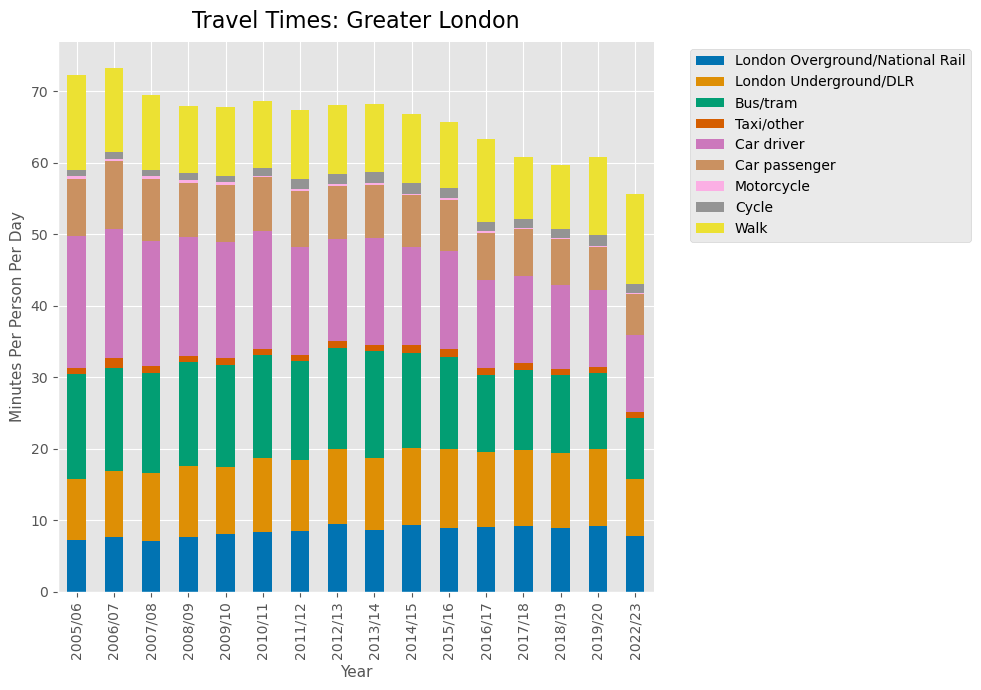

<Figure size 640x480 with 0 Axes>

In [27]:
fig, ax = plt.subplots(figsize=(10, 7))

# Get the "colorblind" palette
colors = sns.color_palette("colorblind", n_colors=len(df_travel_times_gtr_ldn))                
df_travel_times_gtr_ldn.T.plot(kind='bar', stacked=True, color=colors,  ax=ax)
plt.title("Travel Times: Greater London", fontsize=16, color="black", pad=10)
plt.ylabel("Minutes Per Person Per Day",fontsize=11)
plt.xlabel("Year",fontsize=11)

sns.plotting_context("notebook")
sns.despine()

plt.style.use('ggplot')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.tight_layout()

#plt.subplots_adjust(left=0.1)
plt.show()
plt.savefig("df_travel_times_gtr_ldn.pdf")



### Travel Distances Greater London 

In [28]:
df_travel_distances
#subsetting dataset to isolate greater london summaries 
df_travel_distances_gtr_ldn = df_travel_distances.iloc[2:12,0:17]
df_travel_distances_gtr_ldn

#set column names equal to values in row index position 0
df_travel_distances_gtr_ldn.columns = df_travel_distances_gtr_ldn.iloc[0]

#remove first row from DataFrame
df_travel_distances_gtr_ldn = df_travel_distances_gtr_ldn[1:]
df_travel_distances_gtr_ldn

df_travel_distances_gtr_ldn = df_travel_distances_gtr_ldn.T
df_travel_distances_gtr_ldn

# Set the first row as the header
df_travel_distances_gtr_ldn.columns = df_travel_distances_gtr_ldn.iloc[0]
df_travel_distances_gtr_ldn

df_travel_distances_gtr_ldn.index.rename('Year_Date', inplace=True)

df_travel_distances_gtr_ldn = df_travel_distances_gtr_ldn[1:]
df_travel_distances_gtr_ldn

df_travel_distances_gtr_ldn = df_travel_distances_gtr_ldn.T
df_travel_distances_gtr_ldn
df_travel_distances_gtr_ldn.T

Greater London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,1.91145,1.55622,1.5186,0.14856,5.21445,2.26932,0.11743,0.12258,1.22984
2006/07,2.44557,1.7068,1.62362,0.35725,5.62387,2.94585,0.08911,0.16059,0.94053
2007/08,2.11478,1.7122,1.58842,0.39597,5.44379,2.76053,0.11202,0.14515,0.67575
2008/09,2.21876,1.77626,1.53336,0.18776,5.05495,2.54046,0.10441,0.15897,0.46893
2009/10,2.54369,1.67066,1.58767,0.36002,4.89942,2.67979,0.10085,0.14588,0.51902
2010/11,2.62137,1.89533,1.57769,0.1896,4.88658,2.53402,0.09546,0.17753,0.47362
2011/12,2.66904,1.83946,1.69559,0.20637,4.89297,2.81084,0.0979,0.20989,0.46853
2012/13,3.17136,1.9389,1.51124,0.25835,4.69573,2.72546,0.10732,0.20755,0.46946
2013/14,2.71796,1.91914,1.7254,0.15993,4.64619,2.55389,0.0768,0.23044,0.46049


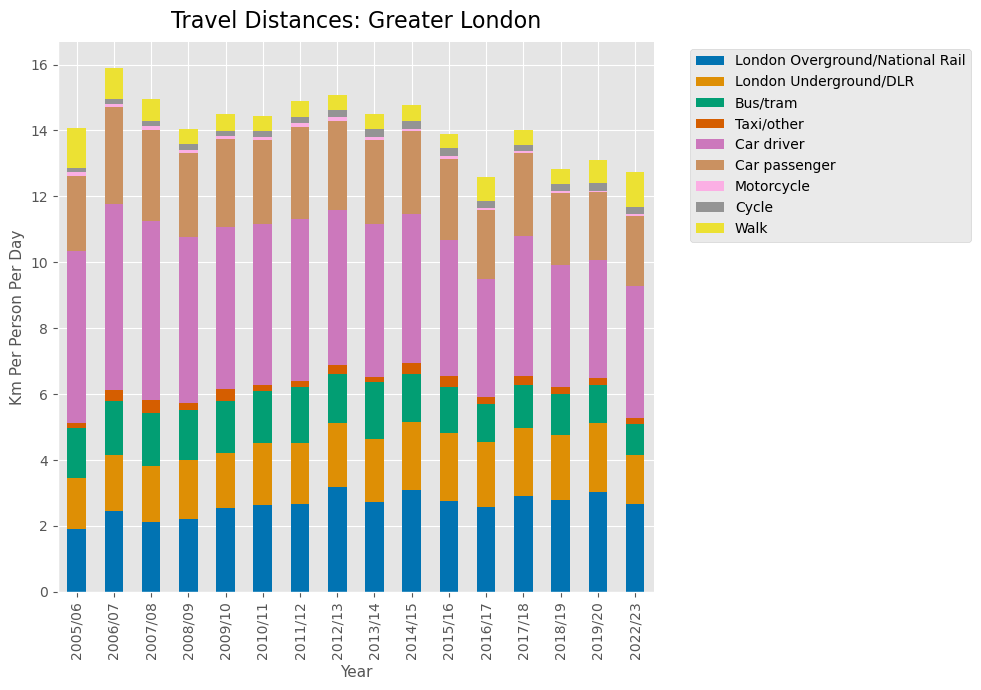

In [29]:
fig, ax = plt.subplots(figsize=(10, 7))

# Get the "colorblind" palette
colors = sns.color_palette("colorblind", n_colors=len(df_travel_distances_gtr_ldn))                
df_travel_distances_gtr_ldn.T.plot(kind='bar', stacked=True, color=colors,  ax=ax)
plt.title("Travel Distances: Greater London", fontsize=16, color="black", pad=10)
plt.ylabel("Km Per Person Per Day",fontsize=11)
plt.xlabel("Year",fontsize=11)

sns.plotting_context("notebook")
sns.despine()

plt.style.use('ggplot')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.tight_layout()

plt.savefig("df_travel_distances_gtr_ldn.png")
plt.show()




>Look at Inner and Outer London results

### Trips Inner London

In [30]:
 
#subsetting dataset to isolate greater london summaries 
df_trips_innr_ldn = df_trips.iloc[14:24,0:17]

#set column names equal to values in row index position 0
df_trips_innr_ldn.columns = df_trips_innr_ldn.iloc[0]

df_trips_innr_ldn = df_trips_innr_ldn.T

# Set the first row as the header
df_trips_innr_ldn.columns = df_trips_innr_ldn.iloc[0]

#index renaming
df_trips_innr_ldn.index.rename('Year_Date', inplace=True)
df_trips_innr_ldn = df_trips_innr_ldn[1:]
df_trips_innr_ldn = df_trips_innr_ldn.T
df_trips_innr_ldn

#remove first row from DataFrame
df_trips_innr_ldn  = df_trips_innr_ldn[1:]
df_trips_innr_ldn


Year_Date,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2022/23
Inner London,,,,,,,,,,,,,,,,
London Overground/National Rail,306865,272187,284876,279369,347319,347379,382942,406607,420772,427872,434300,417081,445047,485672,412808,375060
London Underground/DLR,684925,694454,769166,729372,725466,817964,832450,935765,874149,972411,970933,966534,998850,963060,1001726,758961
Bus/tram,1177246,1272602,1279067,1301793,1315588,1450570,1417383,1400008,1439217,1362507,1342014,1143539,1141730,1164427,1162565,913986
Taxi/other,95226,143436,134117,109863,139869,137925,153049,141712,152731,130696,176056,168789,196113,141687,147278,135672
Car driver,1093071,1182563,1163969,1084435,1135065,1068940,1135526,1083251,1152769,969479,1066998,969054,985114,921616,822778,862313
Car passenger,516863,649833,653240,561221,527287,578711,579352,556462,639893,554717,548282,495337,548287,488717,452071,489772
Motorcycle,42668,41502,40635,62768,34778,27370,35847,41702,22863,24131,50915,35528,25976,25462,22493,15210
Cycle,156906,196759,185355,199420,202349,226233,338360,308082,312171,323488,274818,290407,306746,322921,317471,361207
Walk,2137644,2466979,2603799,2452320,2605187,2695657,2894453,3024525,2950001,2858779,2745817,3004203,2684616,2812690,3137608,3431369


### Trips Outer London

In [31]:
#subsetting dataset to isolate greater london summaries 
df_trips_out_ldn = df_trips.iloc[26:36,0:17]

#set column names equal to values in row index position 0
df_trips_out_ldn.columns = df_trips_out_ldn.iloc[0]

df_trips_out_ldn = df_trips_out_ldn.T

# Set the first row as the header
df_trips_out_ldn.columns = df_trips_out_ldn.iloc[0]

#index renaming
df_trips_out_ldn.index.rename('Year_Date', inplace=True)
df_trips_out_ldn = df_trips_out_ldn[1:]
df_trips_out_ldn = df_trips_out_ldn.T
df_trips_out_ldn

#remove first row from DataFrame
df_trips_out_ldn  = df_trips_out_ldn[1:]
df_trips_out_ldn

Year_Date,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2022/23
Outer London,,,,,,,,,,,,,,,,
London Overground/National Rail,469145,493327,467816,529927,502227,577312,564577,655326,587211,651074,603797,661184,663023,634842,687588,564848
London Underground/DLR,507141,571190,570185,635638,582911,653008,644085,688358,686141,712517,771879,750487,755435,775272,806529,552760
Bus/tram,1293287,1325075,1314336,1380595,1321715,1355567,1411983,1421789,1548074,1453797,1366598,1235748,1323828,1320719,1245481,1015106
Taxi/other,95162,132304,106731,77714,74518,112828,99480,118642,101525,138912,118342,108046,95590,102359,113384,107379
Car driver,4142026,3914840,3961107,3415632,3417297,3694998,3750855,3618421,3811998,3428142,3469494,3190831,3048182,3075695,2956523,2682536
Car passenger,1823022,1939269,1922223,1649126,1787324,1767208,1869405,1748611,1858523,1826212,1745627,1637327,1588014,1475881,1549478,1353504
Motorcycle,41638,46128,53214,31702,55631,36018,45141,48576,48495,37900,42280,31171,36144,39059,24410,32380
Cycle,135501,116394,154168,132783,155109,176719,187913,181345,214832,226945,189054,167519,142156,141518,173838,151371
Walk,3422702,3234922,3126892,2819131,2723667,2776466,2903884,3021541,2919276,2867159,2748006,2937608,2448583,2643909,3168039,3267736


In [32]:
comp = (df_trips_innr_ldn.compare(df_trips_out_ldn,keep_equal=True, keep_shape=True))

In [33]:
#renaming and transpoing to render a long multiindex dataframe

comp.rename(columns={'self':'Inner London','other':'Outer London'},inplace=True)
comp = comp.T

comp = comp.reset_index()

#group the data by geo split
k = comp.groupby(['Year_Date','level_1'])['Cycle'].sum()

#create the dataframe
k= pd.DataFrame(k)
k = k.reset_index()

k.rename(columns={'level_1':'ldn_geo'},inplace=True)

In [34]:
k.head()

,Year_Date,ldn_geo,Cycle
0,2005/06,Inner London,156906
1,2005/06,Outer London,135501
2,2006/07,Inner London,196759
3,2006/07,Outer London,116394
4,2007/08,Inner London,185355


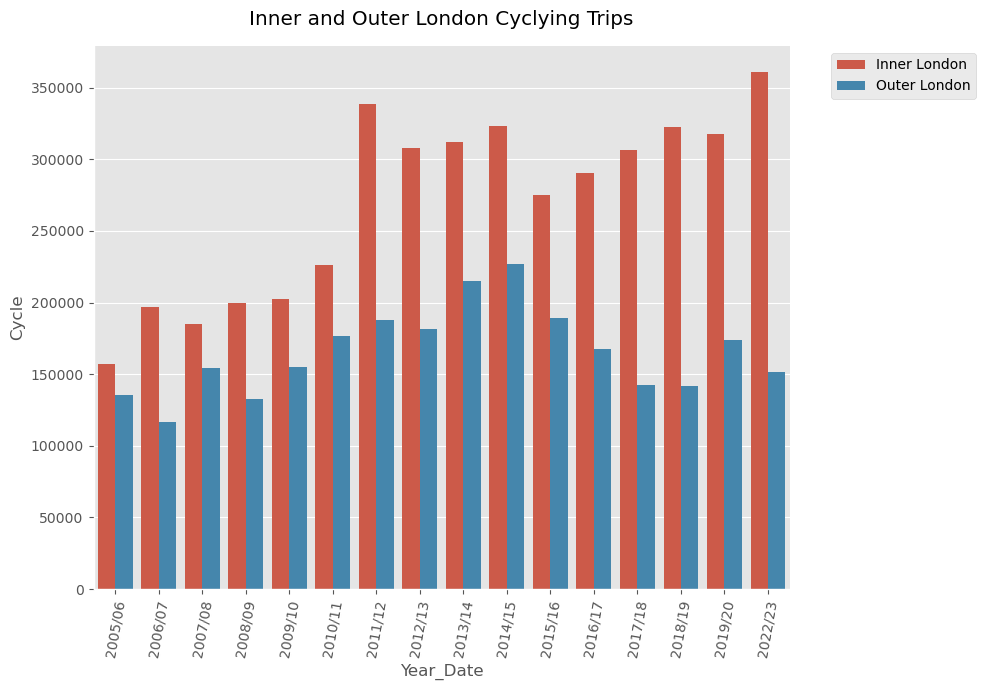

In [35]:
fig, ax = plt.subplots(figsize=(10, 7))
colors = sns.color_palette("colorblind", n_colors=len(k))

sns.barplot(x = 'Year_Date',
            y = 'Cycle',
            hue = 'ldn_geo',
            data = k)

sns.despine()
plt.style.use('ggplot')
plt.xticks(rotation=80)
# title of plot
plt.title("Inner and Outer London Cyclying Trips",pad=15)

sns.plotting_context("notebook")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.tight_layout()

plt.savefig("Inner_Outer_Ldn_Cylcing_Trips.png")
plt.show()


### Travel Stages Inner London 

In [36]:
#subsetting dataset to isolate greater london summaries 
df_stages_innr_ldn = df_stages.iloc[13:22,0:17]

#set column names equal to values in row index position 0
df_stages_innr_ldn.columns = df_stages_innr_ldn.iloc[0]

df_stages_innr_ldn = df_stages_innr_ldn.T

# Set the first row as the header
df_stages_innr_ldn.columns = df_stages_innr_ldn.iloc[0]

#index renaming
df_stages_innr_ldn.index.rename('Year_Date', inplace=True)
df_stages_innr_ldn = df_stages_innr_ldn[1:]
df_stages_innr_ldn = df_stages_innr_ldn.T
df_stages_innr_ldn

#remove first row from DataFrame
df_stages_innr_ldn  = df_stages_innr_ldn[1:]
df_stages_innr_ldn


Year_Date,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2022/23
Inner London,,,,,,,,,,,,,,,,
London Overground/National Rail,378501,328923,349998,324842,420058,460002,524012,512102,558279,584505,573265,562804,565636,661732,570036,495695
London Underground/DLR,1124365,1177245,1344044,1194163,1273892,1372948,1421967,1606060,1522185,1656714,1638672,1612000,1622696,1542130,1646925,1219506
Bus/tram,1823697,1836837,1873737,1900220,1960809,2070058,2022599,2055781,2097507,2043394,1963143,1715879,1783242,1750951,1688455,1419834
Taxi/other,136593,168493,158503,128958,161231,147446,168273,158093,170745,140294,200838,180667,226821,157848,165373,150152
Car driver,1157011,1233449,1208908,1113783,1159303,1078668,1167322,1107714,1177440,1005010,1104903,1003488,975598,892928,810276,870642
Car passenger,554243,679287,652448,572785,544518,591076,598116,581209,668573,556385,562729,553910,564394,500562,464145,494186
Motorcycle,43473,41502,40635,62768,34778,27370,35847,43212,22863,24131,50915,37082,25976,25462,22493,15210
Cycle,162843,202964,189676,203152,210571,231309,357317,323870,324944,350344,301128,308903,317674,335304,332609,380891


### Travel Stages Outer London 

In [37]:
#subsetting dataset to isolate greater london summaries 
df_stages_out_ldn = df_stages.iloc[24:33,0:17]

#set column names equal to values in row index position 0
df_stages_out_ldn.columns = df_stages_out_ldn.iloc[0]

df_stages_out_ldn = df_stages_out_ldn.T

# Set the first row as the header
df_stages_out_ldn.columns = df_stages_out_ldn.iloc[0]

#index renaming
df_stages_out_ldn.index.rename('Year_Date', inplace=True)
df_stages_out_ldn = df_stages_out_ldn[1:]
df_stages_out_ldn = df_stages_out_ldn.T
df_stages_out_ldn

#remove first row from DataFrame
df_stages_out_ldn  = df_stages_out_ldn[1:]
df_stages_out_ldn

Year_Date,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2022/23
Outer London,,,,,,,,,,,,,,,,
London Overground/National Rail,562820,613503,566333,647868,609882,719797,696916,806879,729149,814334,762593,840780,811686,788749,871917,734196
London Underground/DLR,998064,1115187,1118196,1227974,1134277,1272169,1248630,1292825,1310648,1360697,1451042,1421990,1401397,1396949,1486327,1039988
Bus/tram,1998481,2044888,1969188,2144740,2049485,2120084,2132873,2209831,2375013,2245750,2269047,2043654,2057132,2114291,2035323,1597744
Taxi/other,134914,158393,131131,92227,89453,125520,123576,139369,114948,158025,134303,130710,114982,115956,137660,125125
Car driver,4406150,4131968,4082153,3513748,3502991,3781435,3851762,3708711,3905109,3559506,3599686,3219180,3026446,3018601,2896418,2664482
Car passenger,1927601,2072789,1971352,1683349,1838681,1812819,1924087,1815688,1920879,1856241,1803197,1734598,1656606,1502825,1586436,1403415
Motorcycle,42754,46846,53957,32186,56561,36420,45141,48576,48495,37900,43262,32066,36144,39059,24410,32380
Cycle,145720,128921,161913,139409,169302,196040,212577,200493,230291,245496,198773,189458,161985,157476,191566,174225


In [38]:
df_stages_innr_ldn = df_stages_innr_ldn.T
df_stages_innr_ldn.head()

Inner London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle
Year_Date,,,,,,,,
2005/06,378501,1124365,1823697,136593,1157011,554243,43473,162843
2006/07,328923,1177245,1836837,168493,1233449,679287,41502,202964
2007/08,349998,1344044,1873737,158503,1208908,652448,40635,189676
2008/09,324842,1194163,1900220,128958,1113783,572785,62768,203152
2009/10,420058,1273892,1960809,161231,1159303,544518,34778,210571


In [39]:
df_stages_out_ldn = df_stages_out_ldn.T
df_stages_out_ldn.head()

Outer London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle
Year_Date,,,,,,,,
2005/06,562820,998064,1998481,134914,4406150,1927601,42754,145720
2006/07,613503,1115187,2044888,158393,4131968,2072789,46846,128921
2007/08,566333,1118196,1969188,131131,4082153,1971352,53957,161913
2008/09,647868,1227974,2144740,92227,3513748,1683349,32186,139409
2009/10,609882,1134277,2049485,89453,3502991,1838681,56561,169302


plotting figures side by side 

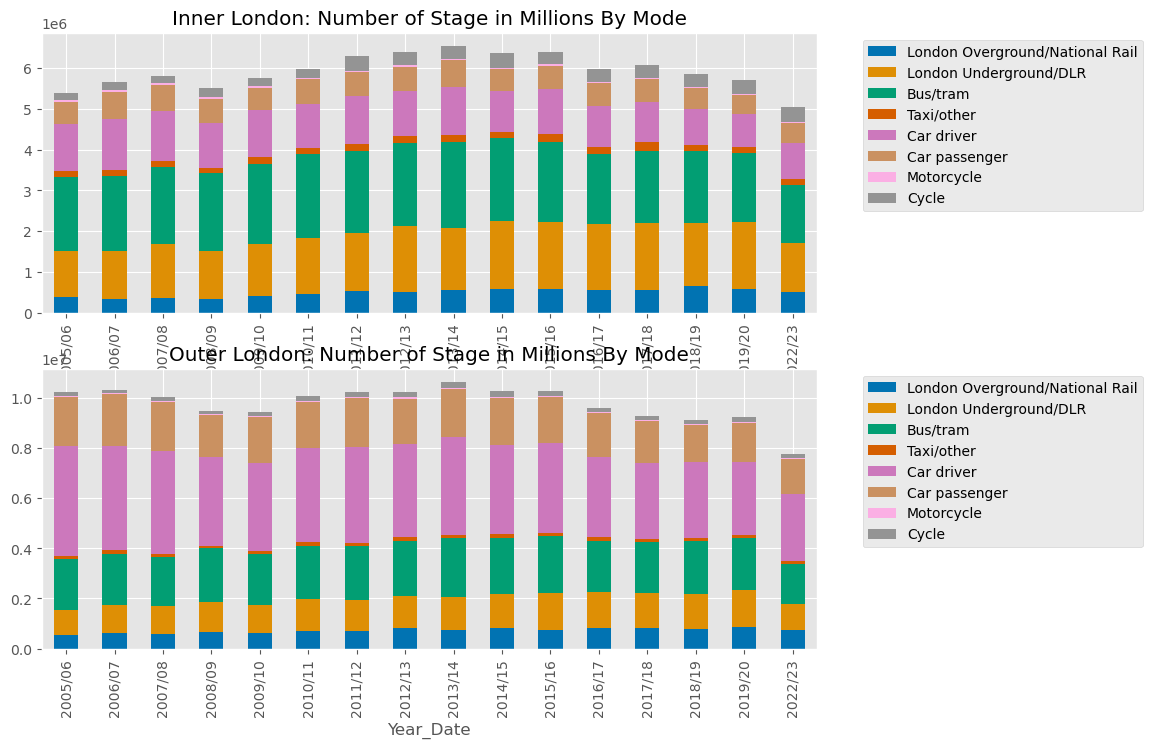

In [40]:

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Get the "colorblind" palette
colors = sns.color_palette("colorblind", n_colors=len(df_travel_distances_gtr_ldn))                
df_stages_innr_ldn.plot(kind='bar', stacked=True, color=colors,  ax=axes[0])
axes[0].set_title("Inner London: Number of Stage in Millions By Mode")


colors = sns.color_palette("colorblind", n_colors=len(df_travel_distances_gtr_ldn))                
df_stages_out_ldn.plot(kind='bar', stacked=True, color=colors,  ax=axes[1])
axes[1].set_title("Outer London: Number of Stage in Millions By Mode")


plt.style.use('ggplot')

# position at which legend to be added 
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("Num_Trips_by_Stage.png")
plt.show()




(Key definitions - "Stage" A trip is defined as a one-way course of travel with a single main purpose. A new stage is defined where there is a change in the mode of transport.)


### Trip Rates Inner London 

In [41]:
#subsetting dataset to isolate greater london summaries 
df_trip_rates_innr_ldn = df_trip_rates.iloc[14:24,0:17]

#set column names equal to values in row index position 0
df_trip_rates_innr_ldn.columns = df_trip_rates_innr_ldn.iloc[0]

df_trip_rates_innr_ldn = df_trip_rates_innr_ldn.T

# Set the first row as the header
df_trip_rates_innr_ldn.columns = df_trip_rates_innr_ldn.iloc[0]

#index renaming
df_trip_rates_innr_ldn.index.rename('Year_Date', inplace=True)
df_trip_rates_innr_ldn = df_trip_rates_innr_ldn[1:]
df_trip_rates_innr_ldn = df_trip_rates_innr_ldn.T


#remove first row from DataFrame
df_trip_rates_innr_ldn  = df_trip_rates_innr_ldn[1:]
df_trip_rates_innr_ldn

Year_Date,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2022/23
Inner London,,,,,,,,,,,,,,,,
London Overground/National Rail,0.11142,0.09784,0.10107,0.09763,0.11927,0.11766,0.12701,0.13246,0.13517,0.13551,0.13593,0.12618,0.13466,0.14695,0.12393,0.1126
London Underground/DLR,0.24868,0.24964,0.2729,0.2549,0.24913,0.27706,0.2761,0.30485,0.28081,0.30796,0.30388,0.29241,0.30222,0.29139,0.30073,0.22785
Bus/tram,0.42743,0.45746,0.45381,0.45495,0.45178,0.49134,0.4701,0.45609,0.46233,0.4315,0.42003,0.34596,0.34546,0.35232,0.34902,0.27439
Taxi/other,0.03457,0.05156,0.04758,0.03839,0.04803,0.04672,0.05076,0.04617,0.04906,0.04139,0.0551,0.05106,0.05934,0.04287,0.04422,0.04073
Car driver,0.39687,0.4251,0.41297,0.37899,0.38979,0.36207,0.37662,0.3529,0.37031,0.30703,0.33395,0.29317,0.29807,0.27885,0.24701,0.25888
Car passenger,0.18766,0.2336,0.23177,0.19613,0.18107,0.19602,0.19215,0.18128,0.20556,0.17568,0.1716,0.14986,0.1659,0.14787,0.13572,0.14704
Motorcycle,0.01549,0.01492,0.01442,0.02194,0.01194,0.00927,0.01189,0.01359,0.00734,0.00764,0.01594,0.01075,0.00786,0.0077,0.00675,0.00457
Cycle,0.05697,0.07073,0.06576,0.06969,0.06949,0.07663,0.11222,0.10037,0.10028,0.10245,0.08601,0.08786,0.09281,0.09771,0.09531,0.10844
Walk,0.77614,0.88681,0.92382,0.85703,0.89463,0.91307,0.96,0.98531,0.94765,0.90537,0.85939,0.90888,0.81229,0.85104,0.94196,1.03015


### Trip Rates Outer London 

In [42]:
#subsetting dataset to isolate greater london summaries 
df_trip_rates_out_ldn = df_trip_rates.iloc[26:36,0:17]

#set column names equal to values in row index position 0
df_trip_rates_out_ldn.columns = df_trip_rates_out_ldn.iloc[0]

df_trip_rates_out_ldn = df_trip_rates_out_ldn.T

# Set the first row as the header
df_trip_rates_out_ldn.columns = df_trip_rates_out_ldn.iloc[0]

#index renaming
df_trip_rates_out_ldn.index.rename('Year_Date', inplace=True)
df_trip_rates_out_ldn = df_trip_rates_out_ldn[1:]
df_trip_rates_out_ldn = df_trip_rates_out_ldn.T


#remove first row from DataFrame
df_trip_rates_out_ldn  = df_trip_rates_out_ldn[1:]
df_trip_rates_out_ldn

Year_Date,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2022/23
Outer London,,,,,,,,,,,,,,,,
London Overground/National Rail,0.11005,0.11476,0.1078,0.12053,0.11264,0.12767,0.12285,0.14031,0.12412,0.1358,0.12451,0.13528,0.13566,0.12989,0.13999,0.115
London Underground/DLR,0.11897,0.13287,0.13139,0.14457,0.13073,0.14441,0.14016,0.14739,0.14504,0.14862,0.15917,0.15355,0.15456,0.15862,0.1642,0.11254
Bus/tram,0.30338,0.30825,0.30288,0.31401,0.29643,0.29978,0.30725,0.30442,0.32723,0.30323,0.28182,0.25284,0.27086,0.27022,0.25357,0.20667
Taxi/other,0.02232,0.03078,0.04758,0.01768,0.01671,0.02495,0.02165,0.0254,0.02146,0.02897,0.0244,0.02211,0.01956,0.02094,0.02308,0.02186
Car driver,0.97165,0.91069,0.9128,0.77687,0.76642,0.81713,0.8162,0.77475,0.80578,0.71505,0.71547,0.50774,0.62367,0.6293,0.60192,0.54614
Car passenger,0.42765,0.45112,0.44296,0.37508,0.40085,0.39081,0.40679,0.3744,0.39285,0.38091,0.35998,0.26031,0.32491,0.30197,0.31546,0.27556
Motorcycle,0.00977,0.01073,0.01226,0.00721,0.01248,0.00797,0.00982,0.0104,0.01025,0.00791,0.00872,0.00814,0.0074,0.00799,0.00497,0.00659
Cycle,0.03179,0.02708,0.03553,0.0302,0.03479,0.03908,0.04089,0.03883,0.04541,0.04734,0.03899,0.05589,0.02909,0.02895,0.03539,0.03082
Walk,0.80291,0.75253,0.72056,0.6412,0.61085,0.614,0.6319,0.64695,0.61708,0.59803,0.56668,0.72524,0.50099,0.54095,0.64498,0.66528


In [43]:
df_trip_rates_innr_ldn = df_trip_rates_innr_ldn.T
df_trip_rates_innr_ldn.head()

Inner London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,0.11142,0.24868,0.42743,0.03457,0.39687,0.18766,0.01549,0.05697,0.77614
2006/07,0.09784,0.24964,0.45746,0.05156,0.4251,0.2336,0.01492,0.07073,0.88681
2007/08,0.10107,0.2729,0.45381,0.04758,0.41297,0.23177,0.01442,0.06576,0.92382
2008/09,0.09763,0.2549,0.45495,0.03839,0.37899,0.19613,0.02194,0.06969,0.85703
2009/10,0.11927,0.24913,0.45178,0.04803,0.38979,0.18107,0.01194,0.06949,0.89463


In [44]:
df_trip_rates_out_ldn = df_trip_rates_out_ldn.T
df_trip_rates_out_ldn.head()

Outer London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,0.11005,0.11897,0.30338,0.02232,0.97165,0.42765,0.00977,0.03179,0.80291
2006/07,0.11476,0.13287,0.30825,0.03078,0.91069,0.45112,0.01073,0.02708,0.75253
2007/08,0.1078,0.13139,0.30288,0.04758,0.9128,0.44296,0.01226,0.03553,0.72056
2008/09,0.12053,0.14457,0.31401,0.01768,0.77687,0.37508,0.00721,0.0302,0.6412
2009/10,0.11264,0.13073,0.29643,0.01671,0.76642,0.40085,0.01248,0.03479,0.61085


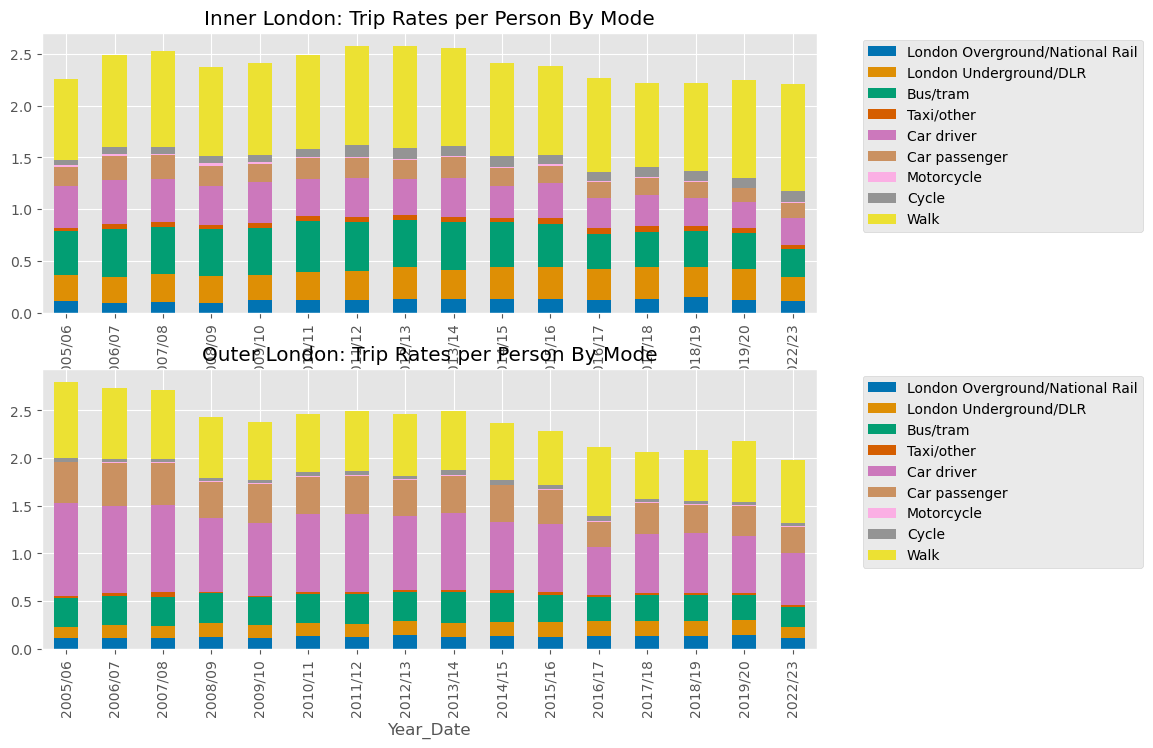

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Get the "colorblind" palette
colors = sns.color_palette("colorblind", n_colors=len(df_travel_distances_gtr_ldn))                
df_trip_rates_innr_ldn.plot(kind='bar', stacked=True, color=colors,  ax=axes[0])
axes[0].set_title("Inner London: Trip Rates per Person By Mode")


colors = sns.color_palette("colorblind", n_colors=len(df_travel_distances_gtr_ldn))                
df_trip_rates_out_ldn.plot(kind='bar', stacked=True, color=colors,  ax=axes[1])
axes[1].set_title("Outer London: Trip Rates per Person By Mode")

plt.style.use('ggplot')

# position at which legend to be added 
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("Trip_Rates_Per_Person.png")
plt.show()



### Stage Rates Inner London

In [46]:
#subsetting dataset to isolate greater london summaries 
df_stages_innr_ldn = df_stages.iloc[13:22,0:17]

#set column names equal to values in row index position 0
df_stages_innr_ldn.columns = df_stages_innr_ldn.iloc[0]

df_stages_innr_ldn = df_stages_innr_ldn.T

# Set the first row as the header
df_stages_innr_ldn.columns = df_stages_innr_ldn.iloc[0]

#index renaming
df_stages_innr_ldn.index.rename('Year_Date', inplace=True)
df_stages_innr_ldn = df_stages_innr_ldn[1:]
df_stages_innr_ldn = df_stages_innr_ldn.T


#remove first row from DataFrame
df_stages_innr_ldn  = df_stages_innr_ldn[1:]
df_stages_innr_ldn

Year_Date,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2022/23
Inner London,,,,,,,,,,,,,,,,
London Overground/National Rail,378501,328923,349998,324842,420058,460002,524012,512102,558279,584505,573265,562804,565636,661732,570036,495695
London Underground/DLR,1124365,1177245,1344044,1194163,1273892,1372948,1421967,1606060,1522185,1656714,1638672,1612000,1622696,1542130,1646925,1219506
Bus/tram,1823697,1836837,1873737,1900220,1960809,2070058,2022599,2055781,2097507,2043394,1963143,1715879,1783242,1750951,1688455,1419834
Taxi/other,136593,168493,158503,128958,161231,147446,168273,158093,170745,140294,200838,180667,226821,157848,165373,150152
Car driver,1157011,1233449,1208908,1113783,1159303,1078668,1167322,1107714,1177440,1005010,1104903,1003488,975598,892928,810276,870642
Car passenger,554243,679287,652448,572785,544518,591076,598116,581209,668573,556385,562729,553910,564394,500562,464145,494186
Motorcycle,43473,41502,40635,62768,34778,27370,35847,43212,22863,24131,50915,37082,25976,25462,22493,15210
Cycle,162843,202964,189676,203152,210571,231309,357317,323870,324944,350344,301128,308903,317674,335304,332609,380891


### Stage Rates Outer London

In [47]:
#subsetting dataset to isolate greater london summaries 
df_stages_out_ldn = df_stages.iloc[24:33,0:17]

#set column names equal to values in row index position 0
df_stages_out_ldn.columns = df_stages_out_ldn.iloc[0]

df_stages_out_ldn = df_stages_out_ldn.T

# Set the first row as the header
df_stages_out_ldn.columns = df_stages_out_ldn.iloc[0]

#index renaming
df_stages_out_ldn.index.rename('Year_Date', inplace=True)
df_stages_out_ldn = df_stages_out_ldn[1:]
df_stages_out_ldn = df_stages_out_ldn.T


#remove first row from DataFrame
df_stages_out_ldn  = df_stages_out_ldn[1:]
df_stages_out_ldn

Year_Date,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2022/23
Outer London,,,,,,,,,,,,,,,,
London Overground/National Rail,562820,613503,566333,647868,609882,719797,696916,806879,729149,814334,762593,840780,811686,788749,871917,734196
London Underground/DLR,998064,1115187,1118196,1227974,1134277,1272169,1248630,1292825,1310648,1360697,1451042,1421990,1401397,1396949,1486327,1039988
Bus/tram,1998481,2044888,1969188,2144740,2049485,2120084,2132873,2209831,2375013,2245750,2269047,2043654,2057132,2114291,2035323,1597744
Taxi/other,134914,158393,131131,92227,89453,125520,123576,139369,114948,158025,134303,130710,114982,115956,137660,125125
Car driver,4406150,4131968,4082153,3513748,3502991,3781435,3851762,3708711,3905109,3559506,3599686,3219180,3026446,3018601,2896418,2664482
Car passenger,1927601,2072789,1971352,1683349,1838681,1812819,1924087,1815688,1920879,1856241,1803197,1734598,1656606,1502825,1586436,1403415
Motorcycle,42754,46846,53957,32186,56561,36420,45141,48576,48495,37900,43262,32066,36144,39059,24410,32380
Cycle,145720,128921,161913,139409,169302,196040,212577,200493,230291,245496,198773,189458,161985,157476,191566,174225


### Trip Rates Inner London 

In [48]:
#subsetting dataset to isolate greater london summaries 
df_trip_rates_innr_ldn = df_trip_rates.iloc[14:24,0:17]

#set column names equal to values in row index position 0
df_trip_rates_innr_ldn.columns = df_trip_rates_innr_ldn.iloc[0]

df_trip_rates_innr_ldn = df_trip_rates_innr_ldn.T

# Set the first row as the header
df_trip_rates_innr_ldn.columns = df_trip_rates_innr_ldn.iloc[0]

#index renaming
df_trip_rates_innr_ldn.index.rename('Year_Date', inplace=True)
df_trip_rates_innr_ldn = df_trip_rates_innr_ldn[1:]
df_trip_rates_innr_ldn = df_trip_rates_innr_ldn.T


#remove first row from DataFrame
df_trip_rates_innr_ldn  = df_trip_rates_innr_ldn[1:]
df_trip_rates_innr_ldn

Year_Date,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2022/23
Inner London,,,,,,,,,,,,,,,,
London Overground/National Rail,0.11142,0.09784,0.10107,0.09763,0.11927,0.11766,0.12701,0.13246,0.13517,0.13551,0.13593,0.12618,0.13466,0.14695,0.12393,0.1126
London Underground/DLR,0.24868,0.24964,0.2729,0.2549,0.24913,0.27706,0.2761,0.30485,0.28081,0.30796,0.30388,0.29241,0.30222,0.29139,0.30073,0.22785
Bus/tram,0.42743,0.45746,0.45381,0.45495,0.45178,0.49134,0.4701,0.45609,0.46233,0.4315,0.42003,0.34596,0.34546,0.35232,0.34902,0.27439
Taxi/other,0.03457,0.05156,0.04758,0.03839,0.04803,0.04672,0.05076,0.04617,0.04906,0.04139,0.0551,0.05106,0.05934,0.04287,0.04422,0.04073
Car driver,0.39687,0.4251,0.41297,0.37899,0.38979,0.36207,0.37662,0.3529,0.37031,0.30703,0.33395,0.29317,0.29807,0.27885,0.24701,0.25888
Car passenger,0.18766,0.2336,0.23177,0.19613,0.18107,0.19602,0.19215,0.18128,0.20556,0.17568,0.1716,0.14986,0.1659,0.14787,0.13572,0.14704
Motorcycle,0.01549,0.01492,0.01442,0.02194,0.01194,0.00927,0.01189,0.01359,0.00734,0.00764,0.01594,0.01075,0.00786,0.0077,0.00675,0.00457
Cycle,0.05697,0.07073,0.06576,0.06969,0.06949,0.07663,0.11222,0.10037,0.10028,0.10245,0.08601,0.08786,0.09281,0.09771,0.09531,0.10844
Walk,0.77614,0.88681,0.92382,0.85703,0.89463,0.91307,0.96,0.98531,0.94765,0.90537,0.85939,0.90888,0.81229,0.85104,0.94196,1.03015


### Trip Rates Outer London 

In [49]:
#subsetting dataset to isolate greater london summaries 
df_trip_rates_out_ldn = df_trip_rates.iloc[26:36,0:17]

#set column names equal to values in row index position 0
df_trip_rates_out_ldn.columns = df_trip_rates_out_ldn.iloc[0]

df_trip_rates_out_ldn = df_trip_rates_out_ldn.T

# Set the first row as the header
df_trip_rates_out_ldn.columns = df_trip_rates_out_ldn.iloc[0]

#index renaming
df_trip_rates_out_ldn.index.rename('Year_Date', inplace=True)
df_trip_rates_out_ldn = df_trip_rates_out_ldn[1:]
df_trip_rates_out_ldn = df_trip_rates_out_ldn.T


#remove first row from DataFrame
df_trip_rates_out_ldn  = df_trip_rates_out_ldn[1:]
df_trip_rates_out_ldn

Year_Date,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2022/23
Outer London,,,,,,,,,,,,,,,,
London Overground/National Rail,0.11005,0.11476,0.1078,0.12053,0.11264,0.12767,0.12285,0.14031,0.12412,0.1358,0.12451,0.13528,0.13566,0.12989,0.13999,0.115
London Underground/DLR,0.11897,0.13287,0.13139,0.14457,0.13073,0.14441,0.14016,0.14739,0.14504,0.14862,0.15917,0.15355,0.15456,0.15862,0.1642,0.11254
Bus/tram,0.30338,0.30825,0.30288,0.31401,0.29643,0.29978,0.30725,0.30442,0.32723,0.30323,0.28182,0.25284,0.27086,0.27022,0.25357,0.20667
Taxi/other,0.02232,0.03078,0.04758,0.01768,0.01671,0.02495,0.02165,0.0254,0.02146,0.02897,0.0244,0.02211,0.01956,0.02094,0.02308,0.02186
Car driver,0.97165,0.91069,0.9128,0.77687,0.76642,0.81713,0.8162,0.77475,0.80578,0.71505,0.71547,0.50774,0.62367,0.6293,0.60192,0.54614
Car passenger,0.42765,0.45112,0.44296,0.37508,0.40085,0.39081,0.40679,0.3744,0.39285,0.38091,0.35998,0.26031,0.32491,0.30197,0.31546,0.27556
Motorcycle,0.00977,0.01073,0.01226,0.00721,0.01248,0.00797,0.00982,0.0104,0.01025,0.00791,0.00872,0.00814,0.0074,0.00799,0.00497,0.00659
Cycle,0.03179,0.02708,0.03553,0.0302,0.03479,0.03908,0.04089,0.03883,0.04541,0.04734,0.03899,0.05589,0.02909,0.02895,0.03539,0.03082
Walk,0.80291,0.75253,0.72056,0.6412,0.61085,0.614,0.6319,0.64695,0.61708,0.59803,0.56668,0.72524,0.50099,0.54095,0.64498,0.66528


### Stage Rates Inner London 

In [50]:
#subsetting dataset to isolate greater london summaries 
df_stage_rates_innr_ldn = df_stage_rates.iloc[13:22,0:17]

#set column names equal to values in row index position 0
df_stage_rates_innr_ldn.columns = df_stage_rates_innr_ldn.iloc[0]

df_stage_rates_innr_ldn = df_stage_rates_innr_ldn.T

# Set the first row as the header
df_stage_rates_innr_ldn.columns = df_stage_rates_innr_ldn.iloc[0]

#index renaming
df_stage_rates_innr_ldn.index.rename('Year_Date', inplace=True)
df_stage_rates_innr_ldn = df_stage_rates_innr_ldn[1:]
df_stage_rates_innr_ldn = df_stage_rates_innr_ldn.T


#remove first row from DataFrame
df_stage_rates_innr_ldn  = df_stage_rates_innr_ldn[1:]
df_stage_rates_innr_ldn

Year_Date,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2022/23
Inner London,,,,,,,,,,,,,,,,
London Overground/National Rail,0.13743,0.11824,0.12418,0.11352,0.14425,0.15581,0.1738,0.16683,0.17934,0.18511,0.17942,0.17027,0.17115,0.20022,0.17113,0.14882
London Underground/DLR,0.40823,0.42318,0.47686,0.41733,0.43746,0.46504,0.47162,0.52321,0.48898,0.52468,0.51287,0.48769,0.49098,0.4666,0.49443,0.36611
Bus/tram,0.66215,0.66029,0.6648,0.66408,0.67335,0.70117,0.67083,0.66972,0.67379,0.64714,0.61443,0.51912,0.53956,0.52979,0.5069,0.42626
Taxi/other,0.04959,0.06057,0.05624,0.04507,0.05537,0.04994,0.05581,0.0515,0.05485,0.04443,0.06286,0.05466,0.06863,0.04776,0.04965,0.04508
Car driver,0.42009,0.44339,0.42892,0.38924,0.39811,0.36537,0.38716,0.36087,0.37824,0.31828,0.34581,0.30359,0.29519,0.27017,0.24326,0.26138
Car passenger,0.20123,0.24418,0.23149,0.20018,0.18699,0.20021,0.19838,0.18934,0.21477,0.17621,0.17612,0.16758,0.17077,0.15146,0.13934,0.14836
Motorcycle,0.01578,0.01492,0.01442,0.02194,0.01194,0.00927,0.01189,0.01408,0.00734,0.00764,0.01594,0.01122,0.00786,0.0077,0.00675,0.00457
Cycle,0.05913,0.07296,0.0673,0.071,0.07231,0.07835,0.11851,0.10551,0.10438,0.11095,0.09425,0.09345,0.09612,0.10145,0.09985,0.11435


### Stage Rates Outer London 

In [51]:
#subsetting dataset to isolate greater london summaries 
df_stage_rates_out_ldn = df_stage_rates.iloc[24:33,0:17]

#set column names equal to values in row index position 0
df_stage_rates_out_ldn.columns = df_stage_rates_out_ldn.iloc[0]

df_stage_rates_out_ldn = df_stage_rates_out_ldn.T

# Set the first row as the header
df_stage_rates_out_ldn.columns = df_stage_rates_out_ldn.iloc[0]

#index renaming
df_stage_rates_out_ldn.index.rename('Year_Date', inplace=True)
df_stage_rates_out_ldn = df_stage_rates_out_ldn[1:]
df_stage_rates_out_ldn = df_stage_rates_out_ldn.T


df_stage_rates_out_ldn  = df_stage_rates_out_ldn[1:]
df_stage_rates_out_ldn

Year_Date,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2022/23
Outer London,,,,,,,,,,,,,,,,
London Overground/National Rail,0.13203,0.14272,0.13051,0.14735,0.13678,0.15918,0.15165,0.17276,0.15413,0.16985,0.15726,0.17203,0.16607,0.16138,0.17751,0.14948
London Underground/DLR,0.23413,0.25942,0.25768,0.2793,0.25439,0.28133,0.27171,0.27681,0.27704,0.28382,0.29923,0.29094,0.28673,0.28582,0.3026,0.21173
Bus/tram,0.46881,0.47569,0.45378,0.48781,0.45965,0.46885,0.46412,0.47315,0.50203,0.46842,0.46792,0.41814,0.4209,0.43259,0.41437,0.32529
Taxi/other,0.03165,0.03685,0.03022,0.02098,0.02006,0.02776,0.02689,0.02984,0.0243,0.03296,0.0277,0.02674,0.02353,0.02373,0.02803,0.02547
Car driver,1.03361,0.9612,0.94069,0.79918,0.78564,0.83625,0.83816,0.79409,0.82546,0.74245,0.74232,0.65865,0.61922,0.61762,0.58968,0.54246
Car passenger,0.45218,0.48218,0.45428,0.38287,0.41237,0.4009,0.41869,0.38876,0.40604,0.38718,0.37185,0.3549,0.33895,0.30748,0.32298,0.28572
Motorcycle,0.01003,0.0109,0.01243,0.00732,0.01269,0.00805,0.00982,0.0104,0.01025,0.00791,0.00892,0.00656,0.0074,0.00799,0.00497,0.00659
Cycle,0.03418,0.02999,0.03731,0.03171,0.03797,0.04335,0.04626,0.04293,0.04868,0.05121,0.04099,0.03876,0.03314,0.03222,0.039,0.03547


### Trip Rates Weekdays Inner London 

In [52]:
#subsetting dataset to isolate greater london summaries 
df_trip_rates_wkdys_innr_ldn = df_trip_rates_wkdys.iloc[14:24,0:17]

#set column names equal to values in row index position 0
df_trip_rates_wkdys_innr_ldn.columns = df_trip_rates_wkdys_innr_ldn.iloc[0]

df_trip_rates_wkdys_innr_ldn = df_trip_rates_wkdys_innr_ldn.T

# Set the first row as the header
df_trip_rates_wkdys_innr_ldn.columns = df_trip_rates_wkdys_innr_ldn.iloc[0]

#index renaming
df_trip_rates_wkdys_innr_ldn.index.rename('Year_Date', inplace=True)
df_trip_rates_wkdys_innr_ldn = df_trip_rates_wkdys_innr_ldn[1:]
df_trip_rates_wkdys_innr_ldn = df_trip_rates_wkdys_innr_ldn.T


df_trip_rates_wkdys_innr_ldn  = df_trip_rates_wkdys_innr_ldn[1:]
df_trip_rates_wkdys_innr_ldn

Year_Date,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2022/23
Inner London,,,,,,,,,,,,,,,,
London Overground/National Rail,0.13358,0.1128,0.12576,0.11956,0.1327,0.13681,0.13887,0.14295,0.15374,0.14815,0.15335,0.13431,0.15157,0.1685,0.13668,0.11908
London Underground/DLR,0.29193,0.29037,0.30889,0.28993,0.29964,0.31747,0.32841,0.34279,0.33539,0.35221,0.35401,0.33131,0.35535,0.33281,0.34277,0.24928
Bus/tram,0.47434,0.49753,0.48458,0.50765,0.49974,0.54688,0.53178,0.50103,0.50065,0.48388,0.4629,0.3734,0.38253,0.39596,0.37575,0.29073
Taxi/other,0.03222,0.05396,0.05344,0.03666,0.0464,0.04314,0.05056,0.04684,0.04788,0.04444,0.05384,0.04522,0.06114,0.03734,0.04122,0.03526
Car driver,0.43204,0.41907,0.41133,0.37075,0.38583,0.35074,0.36739,0.36834,0.37647,0.30363,0.31735,0.29999,0.29502,0.28341,0.24632,0.25174
Car passenger,0.17842,0.19523,0.20949,0.15233,0.13735,0.14453,0.14502,0.15219,0.16593,0.13722,0.1282,0.12356,0.13474,0.10788,0.11021,0.12131
Motorcycle,0.01608,0.01682,0.0156,0.02933,0.01377,0.01077,0.01521,0.01495,0.00879,0.00673,0.01984,0.01191,0.00928,0.00808,0.0078,0.00594
Cycle,0.05963,0.07385,0.07518,0.08607,0.07503,0.08708,0.11483,0.11665,0.11372,0.0984,0.09709,0.11116,0.10898,0.10892,0.1195,0.12643
Walk,0.77407,0.94581,0.99603,0.93519,0.90395,0.95582,1.01369,1.03476,0.98499,0.97687,0.91013,0.97838,0.88531,0.90557,1.01762,1.12422


### Trip Rates Weekdays Outer London 

In [53]:
#subsetting dataset to isolate greater london summaries 
df_trip_rates_wkdys_out_ldn = df_trip_rates_wkdys.iloc[26:36,0:17]

#set column names equal to values in row index position 0
df_trip_rates_wkdys_out_ldn.columns = df_trip_rates_wkdys_out_ldn.iloc[0]

df_trip_rates_wkdys_out_ldn = df_trip_rates_wkdys_out_ldn.T

# Set the first row as the header
df_trip_rates_wkdys_out_ldn.columns = df_trip_rates_wkdys_out_ldn.iloc[0]

#index renaming
df_trip_rates_wkdys_out_ldn.index.rename('Year_Date', inplace=True)
df_trip_rates_wkdys_out_ldn = df_trip_rates_wkdys_out_ldn[1:]
df_trip_rates_wkdys_out_ldn = df_trip_rates_wkdys_out_ldn.T


df_trip_rates_wkdys_out_ldn  = df_trip_rates_wkdys_out_ldn[1:]
df_trip_rates_wkdys_out_ldn

Year_Date,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2022/23
Outer London,,,,,,,,,,,,,,,,
London Overground/National Rail,0.13021,0.13937,0.13692,0.15167,0.13581,0.15353,0.14712,0.16829,0.15157,0.16954,0.15413,0.16945,0.16237,0.15551,0.16075,0.13175
London Underground/DLR,0.13963,0.15713,0.15159,0.17986,0.15891,0.17167,0.16515,0.16452,0.17126,0.17246,0.18335,0.18283,0.19155,0.18996,0.24759,0.12296
Bus/tram,0.34712,0.34336,0.34151,0.35887,0.33009,0.32965,0.33148,0.34231,0.36063,0.33481,0.31389,0.28207,0.30607,0.30807,0.34353,0.23236
Taxi/other,0.02235,0.03055,0.02389,0.01622,0.01549,0.01685,0.02293,0.02116,0.02016,0.02672,0.02333,0.02129,0.01841,0.02085,0.0275,0.02076
Car driver,1.04121,0.96582,0.95608,0.80985,0.81323,0.86239,0.84891,0.80672,0.8467,0.7367,0.75715,0.68573,0.64384,0.68442,0.52265,0.59831
Car passenger,0.39697,0.384,0.36893,0.32154,0.36181,0.33281,0.35154,0.30829,0.33751,0.30857,0.3132,0.28848,0.26575,0.26169,0.19964,0.24011
Motorcycle,0.01088,0.01398,0.01505,0.00937,0.014,0.00918,0.01151,0.01343,0.01093,0.00967,0.00869,0.00821,0.00957,0.00999,0.00922,0.00843
Cycle,0.03196,0.03002,0.03809,0.03425,0.03745,0.04312,0.04503,0.04287,0.05172,0.0501,0.04434,0.03653,0.03631,0.03212,0.0631,0.03115
Walk,0.85406,0.814,0.78249,0.69449,0.65648,0.66246,0.69759,0.71569,0.69097,0.66062,0.62328,0.66052,0.54091,0.57736,0.70976,0.71434


### Trip Rates Weekend Inner London 

In [54]:
#subsetting dataset to isolate greater london summaries 
df_trip_rates_wkends_innr_ldn = df_trip_rates_wkends.iloc[14:24,0:17]

#set column names equal to values in row index position 0
df_trip_rates_wkends_innr_ldn.columns = df_trip_rates_wkends_innr_ldn.iloc[0]

df_trip_rates_wkends_innr_ldn = df_trip_rates_wkends_innr_ldn.T

# Set the first row as the header
df_trip_rates_wkends_innr_ldn.columns = df_trip_rates_wkends_innr_ldn.iloc[0]

#index renaming
df_trip_rates_wkends_innr_ldn.index.rename('Year_Date', inplace=True)
df_trip_rates_wkends_innr_ldn = df_trip_rates_wkends_innr_ldn[1:]
df_trip_rates_wkends_innr_ldn = df_trip_rates_wkends_innr_ldn.T


df_trip_rates_wkends_innr_ldn  = df_trip_rates_wkends_innr_ldn[1:]
df_trip_rates_wkends_innr_ldn

Year_Date,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2022/23
Inner London,,,,,,,,,,,,,,,,
London Overground/National Rail,0.05548,0.06216,0.04412,0.05078,0.0953,0.0678,0.10053,0.10772,0.09928,0.10264,0.09307,0.10661,0.09928,0.11322,0.10105,0.09816
London Underground/DLR,0.15544,0.14632,0.19339,0.17803,0.13362,0.17183,0.15545,0.20303,0.15979,0.19543,0.19689,0.20521,0.18585,0.19878,0.21569,0.1831
Bus/tram,0.29323,0.34099,0.37183,0.34024,0.32873,0.32472,0.32002,0.34895,0.39804,0.28941,0.32911,0.27978,0.27184,0.25896,0.30052,0.24829
Taxi/other,0.03888,0.04534,0.03366,0.04761,0.05008,0.05964,0.04842,0.0469,0.05006,0.03382,0.06381,0.06401,0.06008,0.05781,0.05375,0.05828
Car driver,0.31331,0.43919,0.41145,0.42598,0.4128,0.39,0.40352,0.32045,0.35859,0.32707,0.37182,0.28366,0.31183,0.28456,0.26582,0.29309
Car passenger,0.21024,0.32737,0.30508,0.30612,0.2867,0.32075,0.30645,0.25754,0.30593,0.27286,0.27621,0.22332,0.23996,0.25714,0.20543,0.21953
Motorcycle,0.01312,0.00783,0.01346,0.00351,0.00822,0.00554,0.00336,0.00957,0.00388,0.00884,0.00503,0.00635,0.00521,0.00607,0.0047,0.00055
Cycle,0.0423,0.05879,0.04168,0.03116,0.05894,0.05145,0.10681,0.06309,0.0737,0.11306,0.0595,0.03012,0.053,0.06935,0.04358,0.06597
Walk,0.75037,0.71719,0.75867,0.71145,0.88531,0.79512,0.82375,0.87698,0.88733,0.74064,0.74189,0.75975,0.64238,0.76812,0.8314,0.86527


### Trip Rates Weekend Outer London 

In [55]:
#subsetting dataset to isolate greater london summaries 
df_trip_rates_wkends_out_ldn = df_trip_rates_wkends.iloc[26:36,0:17]

#set column names equal to values in row index position 0
df_trip_rates_wkends_out_ldn.columns = df_trip_rates_wkends_out_ldn.iloc[0]

df_trip_rates_wkends_out_ldn = df_trip_rates_wkends_out_ldn.T

# Set the first row as the header
df_trip_rates_wkends_out_ldn.columns = df_trip_rates_wkends_out_ldn.iloc[0]

#index renaming
df_trip_rates_wkends_out_ldn.index.rename('Year_Date', inplace=True)
df_trip_rates_wkends_out_ldn = df_trip_rates_wkends_out_ldn[1:]
df_trip_rates_wkends_out_ldn = df_trip_rates_wkends_out_ldn.T


df_trip_rates_wkends_out_ldn  = df_trip_rates_wkends_out_ldn[1:]
df_trip_rates_wkends_out_ldn

Year_Date,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2022/23
Outer London,,,,,,,,,,,,,,,,
London Overground/National Rail,0.05184,0.04709,0.0367,0.05107,0.05499,0.06934,0.0664,0.08028,0.0698,0.06024,0.0606,0.05754,0.07084,0.06913,0.07255,0.0776
London Underground/DLR,0.06532,0.07641,0.08698,0.06711,0.06133,0.07223,0.08748,0.1148,0.08559,0.10148,0.10793,0.08884,0.06398,0.08759,0.10467,0.08589
Bus/tram,0.20671,0.21928,0.20874,0.2263,0.21248,0.23431,0.25493,0.20954,0.25368,0.23141,0.21223,0.18983,0.18338,0.18314,0.1879,0.14784
Taxi/other,0.02153,0.03139,0.02822,0.0209,0.01954,0.04586,0.01895,0.03558,0.02468,0.03608,0.02861,0.02504,0.02316,0.02124,0.02915,0.02547
Car driver,0.77787,0.73477,0.82233,0.72128,0.65114,0.7129,0.75418,0.71297,0.74165,0.69892,0.65,0.58923,0.58355,0.52736,0.53301,0.44209
Car passenger,0.52664,0.60877,0.62441,0.53546,0.50463,0.54548,0.54534,0.54841,0.55,0.56732,0.49227,0.47256,0.48295,0.422,0.45022,0.37553
Motorcycle,0.00663,0.00387,0.00646,0.00218,0.00802,0.00521,0.00572,0.00339,0.00983,0.00321,0.00972,0.00224,0.00293,0.00345,0.00433,0.00111
Cycle,0.03236,0.01935,0.02979,0.02391,0.02961,0.03594,0.03301,0.03098,0.03412,0.042,0.028,0.02823,0.01246,0.02101,0.01959,0.03092
Walk,0.66593,0.58487,0.56753,0.53793,0.49778,0.50736,0.49635,0.50585,0.46723,0.46351,0.44531,0.49374,0.41022,0.4757,0.53467,0.56905


### Mode Shares Inner London

In [56]:

#subsetting dataset to isolate greater london summaries 
df_mode_shares_innr_ldn = df_mode_shares.iloc[14:24,0:17]
df_mode_shares_innr_ldn

#set column names equal to values in row index position 0
df_mode_shares_innr_ldn.columns = df_mode_shares_innr_ldn.iloc[0]

#remove first row from DataFrame
df_mode_shares_innr_ldn = df_mode_shares_innr_ldn[1:]
df_mode_shares_innr_ldn

df_mode_shares_innr_ldn = df_mode_shares_innr_ldn.T
df_mode_shares_innr_ldn

# Set the first row as the header
df_mode_shares_innr_ldn.columns = df_mode_shares_innr_ldn.iloc[0]
df_mode_shares_innr_ldn

df_mode_shares_innr_ldn.index.rename('Year_Date', inplace=True)

df_mode_shares_innr_ldn = df_mode_shares_innr_ldn[1:]
df_mode_shares_innr_ldn

df_mode_shares_innr_ldn = df_mode_shares_innr_ldn.T
df_mode_shares_innr_ldn
df_mode_shares_innr_ldn.T

Inner London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,0.0494,0.11027,0.18953,0.01533,0.17598,0.08321,0.00687,0.02526,0.34415
2006/07,0.03933,0.10035,0.18389,0.02073,0.17088,0.0939,0.006,0.02843,0.35648
2007/08,0.04004,0.10812,0.17979,0.01885,0.16361,0.09182,0.00571,0.02605,0.366
2008/09,0.0412,0.10757,0.19199,0.0162,0.15993,0.08277,0.00926,0.02941,0.36167
2009/10,0.04938,0.10315,0.18706,0.01989,0.16139,0.07497,0.00495,0.02877,0.37043
2010/11,0.04726,0.11128,0.19734,0.01876,0.14542,0.07873,0.00372,0.03078,0.36672
2011/12,0.04929,0.10715,0.18243,0.0197,0.14615,0.07457,0.00461,0.04355,0.37255
2012/13,0.05148,0.11848,0.17726,0.01794,0.13715,0.07046,0.00528,0.03901,0.38294
2013/14,0.05283,0.10975,0.1807,0.01918,0.14474,0.08034,0.00287,0.0392,0.37039


### Mode Shares Outer London

In [57]:
#subsetting dataset to isolate greater london summaries 
df_mode_shares_out_ldn = df_mode_shares.iloc[25:35,0:17]


#set column names equal to values in row index position 0
df_mode_shares_out_ldn.columns = df_mode_shares_out_ldn.iloc[0]

#remove first row from DataFrame
df_mode_shares_out_ldn = df_mode_shares_out_ldn[1:]

df_mode_shares_out_ldn = df_mode_shares_out_ldn.T

# Set the first row as the header
df_mode_shares_out_ldn.columns = df_mode_shares_out_ldn.iloc[0]

df_mode_shares_out_ldn.index.rename('Year_Date', inplace=True)

df_mode_shares_out_ldn = df_mode_shares_out_ldn[1:]
df_mode_shares_out_ldn

df_mode_shares_out_ldn = df_mode_shares_out_ldn.T
df_mode_shares_out_ldn
df_mode_shares_out_ldn.T

Outer London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,0.03933,0.04251,0.10841,0.00798,0.34721,0.15281,0.00349,0.01136,0.28691
2006/07,0.0419,0.04852,0.11255,0.01124,0.33251,0.16472,0.00392,0.00989,0.27476
2007/08,0.04006,0.04883,0.11256,0.00914,0.33923,0.16462,0.00456,0.0132,0.26779
2008/09,0.04965,0.05956,0.12936,0.00728,0.32005,0.15452,0.00297,0.01244,0.26416
2009/10,0.04729,0.05489,0.12445,0.00702,0.32177,0.16829,0.00524,0.0146,0.25646
2010/11,0.05178,0.05857,0.12157,0.01012,0.33139,0.15849,0.00323,0.01585,0.24901
2011/12,0.04919,0.05612,0.12302,0.00867,0.32681,0.16288,0.00393,0.01637,0.25301
2012/13,0.05697,0.05984,0.12361,0.01031,0.31457,0.15202,0.00422,0.01577,0.26268
2013/14,0.04986,0.05827,0.13146,0.00862,0.32371,0.15782,0.00412,0.01824,0.2479


In [58]:
df_mode_shares_innr_ldn = df_mode_shares_innr_ldn.T
df_mode_shares_innr_ldn.head()

Inner London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,0.0494,0.11027,0.18953,0.01533,0.17598,0.08321,0.00687,0.02526,0.34415
2006/07,0.03933,0.10035,0.18389,0.02073,0.17088,0.0939,0.006,0.02843,0.35648
2007/08,0.04004,0.10812,0.17979,0.01885,0.16361,0.09182,0.00571,0.02605,0.366
2008/09,0.0412,0.10757,0.19199,0.0162,0.15993,0.08277,0.00926,0.02941,0.36167
2009/10,0.04938,0.10315,0.18706,0.01989,0.16139,0.07497,0.00495,0.02877,0.37043


In [59]:
df_mode_shares_out_ldn = df_mode_shares_out_ldn.T
df_mode_shares_out_ldn.head()

Outer London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,0.03933,0.04251,0.10841,0.00798,0.34721,0.15281,0.00349,0.01136,0.28691
2006/07,0.0419,0.04852,0.11255,0.01124,0.33251,0.16472,0.00392,0.00989,0.27476
2007/08,0.04006,0.04883,0.11256,0.00914,0.33923,0.16462,0.00456,0.0132,0.26779
2008/09,0.04965,0.05956,0.12936,0.00728,0.32005,0.15452,0.00297,0.01244,0.26416
2009/10,0.04729,0.05489,0.12445,0.00702,0.32177,0.16829,0.00524,0.0146,0.25646


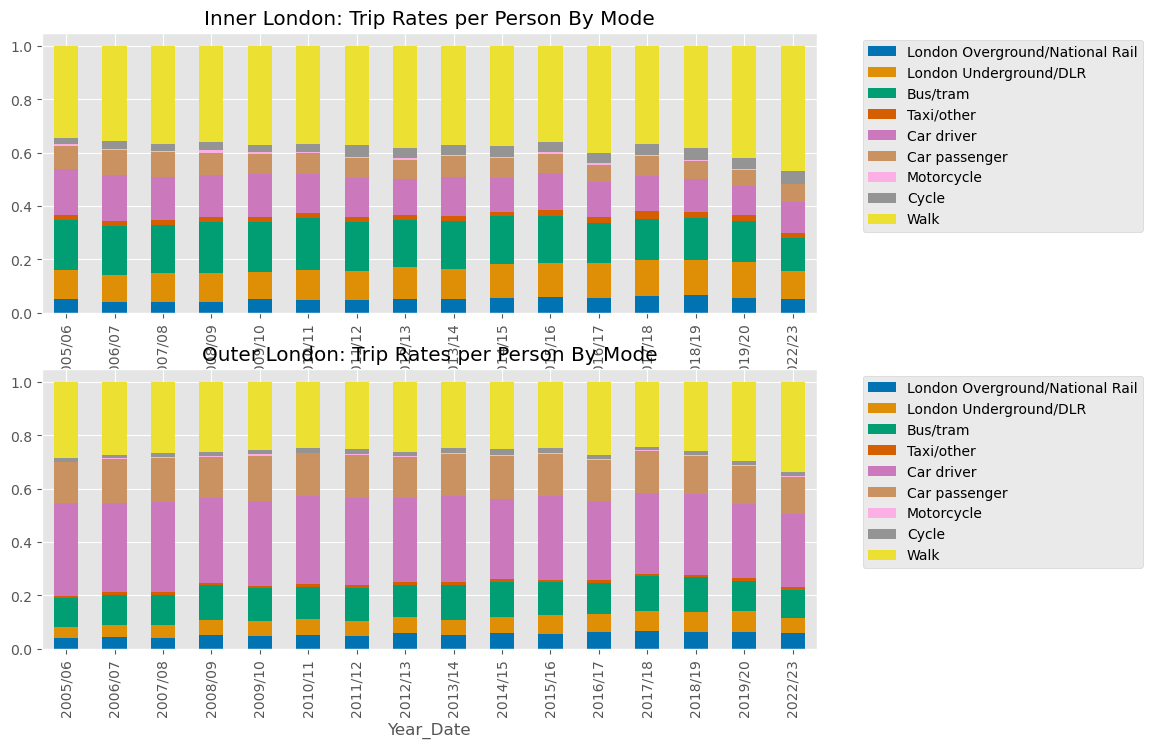

In [60]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Get the "colorblind" palette
colors = sns.color_palette("colorblind", n_colors=len(df_mode_shares_innr_ldn))                
df_mode_shares_innr_ldn.plot(kind='bar', stacked=True, color=colors,  ax=axes[0])
axes[0].set_title("Inner London: Trip Rates per Person By Mode")

colors = sns.color_palette("colorblind", n_colors=len(df_mode_shares_out_ldn))                
df_mode_shares_out_ldn.plot(kind='bar', stacked=True, color=colors,  ax=axes[1])
axes[1].set_title("Outer London: Trip Rates per Person By Mode")

plt.style.use('ggplot')

# position at which legend to be added 
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("travel_mode_share.png")

plt.show()



### Purpose Share Inner London

In [61]:
#subsetting dataset to isolate greater london summaries 
df_purpose_shares_innr_ldn = df_purpose_shares.iloc[10:17,0:17]

#set column names equal to values in row index position 0
df_purpose_shares_innr_ldn.columns = df_purpose_shares_innr_ldn.iloc[0]

#remove first row from DataFrame
df_purpose_shares_innr_ldn = df_purpose_shares_innr_ldn[1:]

df_purpose_shares_innr_ldn = df_purpose_shares_innr_ldn.T

# Set the first row as the header
df_purpose_shares_innr_ldn.columns = df_purpose_shares_innr_ldn.iloc[0]

df_purpose_shares_innr_ldn.index.rename('Year_Date', inplace=True)

df_purpose_shares_innr_ldn = df_purpose_shares_innr_ldn[1:]


df_purpose_shares_innr_ldn = df_purpose_shares_innr_ldn.T
df_purpose_shares_innr_ldn
df_purpose_shares_innr_ldn.T

Inner London,Commuting,Other work,Education,Shopping and personal business,Leisure,Other (including escort)
Year_Date,,,,,,
2005/06,0.19546,0.05002,0.11817,0.28933,0.22363,0.12338
2006/07,0.1857,0.0594,0.08394,0.29515,0.26256,0.11324
2007/08,0.16054,0.06366,0.0829,0.30987,0.27027,0.11275
2008/09,0.17416,0.06006,0.09039,0.29569,0.27444,0.10526
2009/10,0.17422,0.06074,0.09144,0.27346,0.29242,0.10772
2010/11,0.16521,0.06532,0.09188,0.29204,0.27768,0.10787
2011/12,0.15651,0.06178,0.08137,0.30472,0.2914,0.10421
2012/13,0.15167,0.06811,0.08364,0.27088,0.30003,0.12567
2013/14,0.1621,0.05754,0.08057,0.25894,0.31527,0.12558


In [62]:

df = df_purpose_shares_innr_ldn
df.to_excel('purpose_share_inner_ldn.xlsx', index=True, header=True)

### Purpose Share Outer London 

In [63]:
#subsetting dataset to isolate greater london summaries 
df_purpose_shares_out_ldn = df_purpose_shares.iloc[18:25,0:17]

#set column names equal to values in row index position 0
df_purpose_shares_out_ldn.columns = df_purpose_shares_out_ldn.iloc[0]

#remove first row from DataFrame
df_purpose_shares_out_ldn = df_purpose_shares_out_ldn[1:]

df_purpose_shares_out_ldn = df_purpose_shares_out_ldn.T

# Set the first row as the header
df_purpose_shares_out_ldn.columns = df_purpose_shares_out_ldn.iloc[0]

df_purpose_shares_out_ldn.index.rename('Year_Date', inplace=True)

df_purpose_shares_out_ldn = df_purpose_shares_out_ldn[1:]


df_purpose_shares_out_ldn = df_purpose_shares_out_ldn.T
df_purpose_shares_out_ldn
df_purpose_shares_out_ldn.T

Outer London,Commuting,Other work,Education,Shopping and personal business,Leisure,Other (including escort)
Year_Date,,,,,,
2005/06,0.1743,0.0517,0.09399,0.30975,0.21864,0.15162
2006/07,0.16359,0.05758,0.07877,0.29574,0.26022,0.14411
2007/08,0.1603,0.0633,0.07983,0.29851,0.2557,0.14236
2008/09,0.16901,0.05535,0.07953,0.28906,0.27644,0.13062
2009/10,0.16477,0.0638,0.08347,0.29667,0.26463,0.12666
2010/11,0.16306,0.06144,0.08077,0.28958,0.26343,0.14172
2011/12,0.14769,0.05813,0.07396,0.2925,0.27398,0.15374
2012/13,0.15323,0.06264,0.07337,0.27943,0.28053,0.1508
2013/14,0.1551,0.07326,0.08069,0.25456,0.27549,0.1609


In [64]:

df = df_purpose_shares_out_ldn
df.to_excel('df_purpose_shares_out_ldn.xlsx', index=True, header=True)

In [65]:
df_purpose_shares_innr_ldn = df_purpose_shares_innr_ldn.T
df_purpose_shares_innr_ldn.head()

Inner London,Commuting,Other work,Education,Shopping and personal business,Leisure,Other (including escort)
Year_Date,,,,,,
2005/06,0.19546,0.05002,0.11817,0.28933,0.22363,0.12338
2006/07,0.1857,0.0594,0.08394,0.29515,0.26256,0.11324
2007/08,0.16054,0.06366,0.0829,0.30987,0.27027,0.11275
2008/09,0.17416,0.06006,0.09039,0.29569,0.27444,0.10526
2009/10,0.17422,0.06074,0.09144,0.27346,0.29242,0.10772


In [66]:
df_purpose_shares_out_ldn = df_purpose_shares_out_ldn.T
df_purpose_shares_out_ldn.head()

Outer London,Commuting,Other work,Education,Shopping and personal business,Leisure,Other (including escort)
Year_Date,,,,,,
2005/06,0.1743,0.0517,0.09399,0.30975,0.21864,0.15162
2006/07,0.16359,0.05758,0.07877,0.29574,0.26022,0.14411
2007/08,0.1603,0.0633,0.07983,0.29851,0.2557,0.14236
2008/09,0.16901,0.05535,0.07953,0.28906,0.27644,0.13062
2009/10,0.16477,0.0638,0.08347,0.29667,0.26463,0.12666


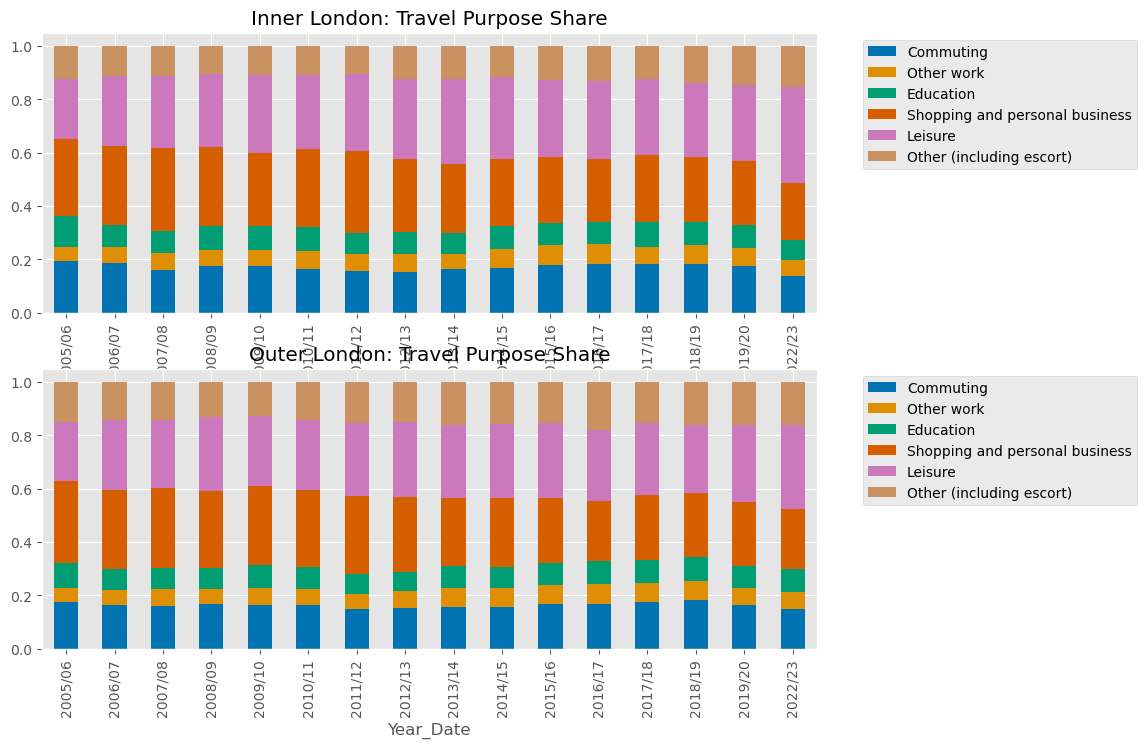

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Get the "colorblind" palette
colors = sns.color_palette("colorblind", n_colors=len(df_purpose_shares_innr_ldn))                
df_purpose_shares_innr_ldn.plot(kind='bar', stacked=True, color=colors,  ax=axes[0])
axes[0].set_title("Inner London: Travel Purpose Share")

colors = sns.color_palette("colorblind", n_colors=len(df_purpose_shares_out_ldn))                
df_purpose_shares_out_ldn.plot(kind='bar', stacked=True, color=colors,  ax=axes[1])
axes[1].set_title("Outer London: Travel Purpose Share")

plt.style.use('ggplot')

# position at which legend to be added 
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("travel_Purpose_share.png")
plt.show()



### Travel Times Inner London 

In [68]:
#subsetting dataset to isolate greater london summaries 
df_travel_times_innr_ldn = df_travel_times.iloc[15:25,0:17]

#set column names equal to values in row index position 0
df_travel_times_innr_ldn.columns = df_travel_times_innr_ldn.iloc[0]

#remove first row from DataFrame
df_travel_times_innr_ldn = df_travel_times_innr_ldn[1:]

df_travel_times_innr_ldn = df_travel_times_innr_ldn.T

# Set the first row as the header
df_travel_times_innr_ldn.columns = df_travel_times_innr_ldn.iloc[0]

df_travel_times_innr_ldn.index.rename('Year_Date', inplace=True)

df_travel_times_innr_ldn = df_travel_times_innr_ldn[1:]


df_travel_times_innr_ldn = df_travel_times_innr_ldn.T
df_travel_times_innr_ldn
df_travel_times_innr_ldn.T

Inner London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,6.61581,11.21185,18.06183,0.93418,10.35423,5.53501,0.45579,1.27625,12.58926
2006/07,6.58653,11.61501,16.59283,1.37608,11.66758,5.93101,0.35406,1.59508,12.74944
2007/08,6.75732,12.38143,17.0097,1.63383,10.6543,6.07741,0.31958,1.36016,12.28208
2008/09,6.60849,11.90622,18.34141,1.10429,11.59708,5.36964,0.45624,1.49717,11.52465
2009/10,8.22003,11.54618,17.82711,1.34466,10.96705,4.86081,0.26281,1.31954,11.93334
2010/11,7.70784,12.57071,18.47419,1.10494,10.31385,5.33581,0.26907,1.58958,11.59406
2011/12,8.15103,12.54247,17.11846,1.21233,9.48582,5.52052,0.33492,2.44874,12.05545
2012/13,9.10176,13.56137,17.19367,1.45746,8.75154,5.08799,0.39305,2.14204,12.30772
2013/14,8.81479,12.83303,17.65326,1.24616,9.08354,5.10167,0.18088,2.31596,11.96095


### Travel Time Outer London

In [69]:
#subsetting dataset to isolate greater london summaries 
df_travel_times_out_ldn = df_travel_times.iloc[27:37,0:17]

#set column names equal to values in row index position 0
df_travel_times_out_ldn.columns = df_travel_times_out_ldn.iloc[0]

#remove first row from DataFrame
df_travel_times_out_ldn = df_travel_times_out_ldn[1:]

df_travel_times_out_ldn = df_travel_times_out_ldn.T

# Set the first row as the header
df_travel_times_out_ldn.columns = df_travel_times_out_ldn.iloc[0]

df_travel_times_out_ldn.index.rename('Year_Date', inplace=True)

df_travel_times_out_ldn = df_travel_times_out_ldn[1:]


df_travel_times_out_ldn = df_travel_times_out_ldn.T
df_travel_times_out_ldn
df_travel_times_out_ldn.T

Outer London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,7.54567,6.94408,12.56225,0.71205,23.57929,9.67766,0.2427,0.58743,13.74405
2006/07,8.2949,7.85287,12.84771,1.34931,22.3183,11.63574,0.28365,0.54513,11.16331
2007/08,7.28421,7.74123,11.84463,0.74047,21.93361,10.27526,0.33969,0.69842,9.15809
2008/09,8.31664,8.56221,12.23912,0.52322,19.9439,9.11845,0.3103,0.67009,7.98208
2009/10,8.0404,7.83265,11.97437,0.67766,19.71294,10.11738,0.35868,0.67181,8.11099
2010/11,8.85041,8.7507,11.79478,0.75687,20.44728,8.90792,0.24887,0.83638,7.79557
2011/12,8.74861,8.16931,11.80991,0.60912,18.66096,9.30436,0.26269,0.84101,7.86588
2012/13,9.85138,8.35139,12.00872,0.85427,17.66734,9.03763,0.29642,0.77387,7.90258
2013/14,8.54149,8.33267,13.0464,0.69055,18.67917,9.08754,0.27454,1.06509,7.7118


In [70]:
df_travel_times_innr_ldn = df_travel_times_innr_ldn.T
df_travel_times_innr_ldn.head()

Inner London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,6.61581,11.21185,18.06183,0.93418,10.35423,5.53501,0.45579,1.27625,12.58926
2006/07,6.58653,11.61501,16.59283,1.37608,11.66758,5.93101,0.35406,1.59508,12.74944
2007/08,6.75732,12.38143,17.0097,1.63383,10.6543,6.07741,0.31958,1.36016,12.28208
2008/09,6.60849,11.90622,18.34141,1.10429,11.59708,5.36964,0.45624,1.49717,11.52465
2009/10,8.22003,11.54618,17.82711,1.34466,10.96705,4.86081,0.26281,1.31954,11.93334


In [71]:
df_travel_times_out_ldn = df_travel_times_out_ldn.T
df_travel_times_out_ldn.head()

Outer London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,7.54567,6.94408,12.56225,0.71205,23.57929,9.67766,0.2427,0.58743,13.74405
2006/07,8.2949,7.85287,12.84771,1.34931,22.3183,11.63574,0.28365,0.54513,11.16331
2007/08,7.28421,7.74123,11.84463,0.74047,21.93361,10.27526,0.33969,0.69842,9.15809
2008/09,8.31664,8.56221,12.23912,0.52322,19.9439,9.11845,0.3103,0.67009,7.98208
2009/10,8.0404,7.83265,11.97437,0.67766,19.71294,10.11738,0.35868,0.67181,8.11099


In [72]:
df_tr_innr_times_concat = df_travel_times_innr_ldn[['Cycle','Walk']]
df_tr_innr_times_concat = df_tr_innr_times_concat.rename(columns={'Cycle': 'Cycle_Inner_ldn', 'Walk': 'Walk_Inner_ldn'})
df_tr_out_times_concat = df_travel_times_out_ldn[['Cycle','Walk']]
df_tr_out_times_concat = df_tr_out_times_concat.rename(columns={'Cycle': 'Cycle_otr_ldn', 'Walk': 'Walk_otr_ldn'})



In [73]:
df_tr_innr_times_concat.head()

Inner London,Cycle_Inner_ldn,Walk_Inner_ldn
Year_Date,,
2005/06,1.27625,12.58926
2006/07,1.59508,12.74944
2007/08,1.36016,12.28208
2008/09,1.49717,11.52465
2009/10,1.31954,11.93334


In [74]:
df_tr_out_times_concat.head()

Outer London,Cycle_otr_ldn,Walk_otr_ldn
Year_Date,,
2005/06,0.58743,13.74405
2006/07,0.54513,11.16331
2007/08,0.69842,9.15809
2008/09,0.67009,7.98208
2009/10,0.67181,8.11099


In [75]:
df = pd.concat([df_tr_innr_times_concat,df_tr_out_times_concat], axis=1,ignore_index=False)
df.head()
df = df.reset_index()

In [76]:
df

,Year_Date,Cycle_Inner_ldn,Walk_Inner_ldn,Cycle_otr_ldn,Walk_otr_ldn
0,2005/06,1.27625,12.58926,0.58743,13.74405
1,2006/07,1.59508,12.74944,0.54513,11.16331
2,2007/08,1.36016,12.28208,0.69842,9.15809
3,2008/09,1.49717,11.52465,0.67009,7.98208
4,2009/10,1.31954,11.93334,0.67181,8.11099
5,2010/11,1.58958,11.59406,0.83638,7.79557
6,2011/12,2.44874,12.05545,0.84101,7.86588
7,2012/13,2.14204,12.30772,0.77387,7.90258
8,2013/14,2.31596,11.96095,1.06509,7.7118
9,2014/15,2.40147,11.92678,0.99848,8.06044


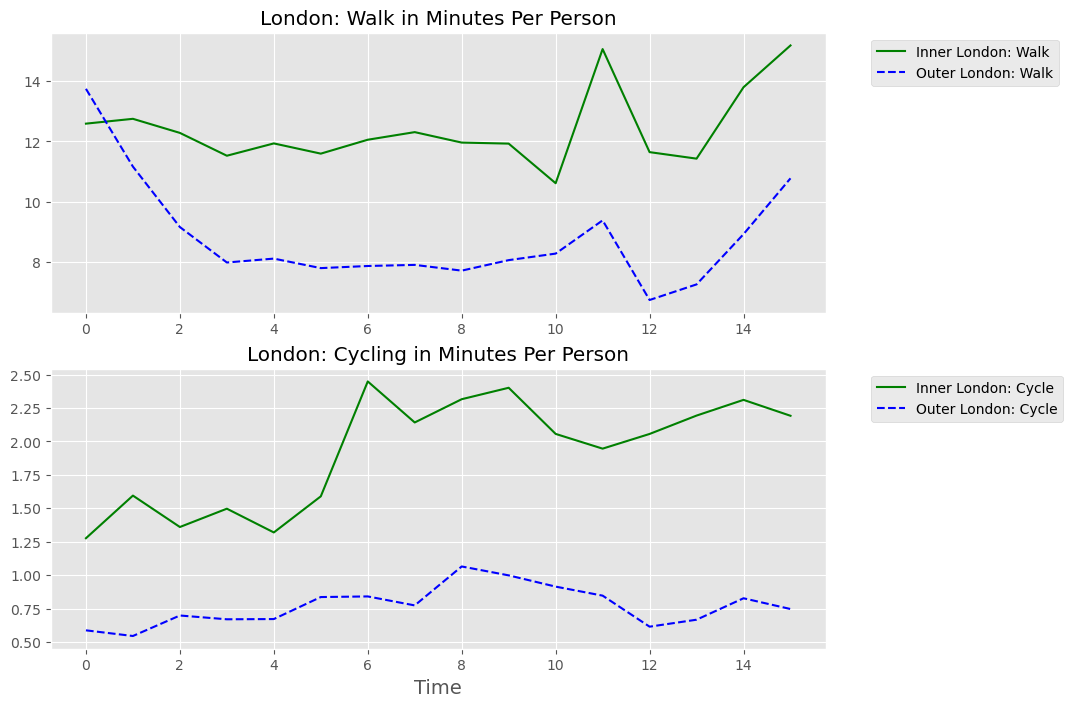

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))


axes[0].plot(df['Walk_Inner_ldn'],label='Inner London: Walk', color='green')
axes[0].plot(df['Walk_otr_ldn'],label='Outer London: Walk', color='blue', linestyle='dashed')
axes[0].set_title("London: Walk in Minutes Per Person")


#plot individual lines
axes[1].plot(df['Cycle_Inner_ldn'],label='Inner London: Cycle', color='green')
axes[1].plot(df['Cycle_otr_ldn'],label='Outer London: Cycle', color='Blue',linestyle='dashed')
axes[1].set_title("London: Cycling in Minutes Per Person")



plt.xlabel('Time', fontsize=14)
#axes[0].plot.ylabel('Average Time in Travel Per Person', fontsize=14)
#axes[1].plot.ylabel('Average Time in Travel Per Person', fontsize=14)
plt.style.use('ggplot')

# position at which legend to be added 
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')



plt.savefig("walk_cycle_in_mins.png")

plt.show()


### Travel Distances Inner London 

In [78]:
#subsetting dataset to isolate greater london summaries 
df_travel_distances_innr_ldn = df_travel_distances.iloc[15:25,0:17]

#set column names equal to values in row index position 0
df_travel_distances_innr_ldn.columns = df_travel_distances_innr_ldn.iloc[0]

#remove first row from DataFrame
df_travel_distances_innr_ldn = df_travel_distances_innr_ldn[1:]

df_travel_distances_innr_ldn = df_travel_distances_innr_ldn.T

# Set the first row as the header
df_travel_distances_innr_ldn.columns = df_travel_distances_innr_ldn.iloc[0]

df_travel_distances_innr_ldn.index.rename('Year_Date', inplace=True)

df_travel_distances_innr_ldn = df_travel_distances_innr_ldn[1:]


df_travel_distances_innr_ldn = df_travel_distances_innr_ldn.T
df_travel_distances_innr_ldn
df_travel_distances_innr_ldn.T

Inner London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,1.96658,1.76318,1.67461,0.14357,2.67162,1.44416,0.10586,0.17956,1.53886
2006/07,2.59618,1.89118,1.68221,0.21395,3.68476,1.56788,0.08728,0.26445,1.10995
2007/08,2.30413,1.89962,1.92401,0.70091,3.20849,1.96559,0.08186,0.20271,0.86551
2008/09,2.23126,1.91577,1.77046,0.26207,3.18969,1.83233,0.11731,0.2428,0.55449
2009/10,2.92944,1.85539,1.95235,0.69855,3.41319,1.48341,0.07402,0.19857,0.70092
2010/11,2.68467,2.04451,1.90715,0.21804,3.00284,1.85775,0.07823,0.24706,0.60662
2011/12,2.61329,2.07861,2.20653,0.29484,3.22327,2.01032,0.09111,0.34166,0.59984
2012/13,3.58085,2.23551,1.71733,0.32514,2.71633,1.88457,0.10861,0.33805,0.59893
2013/14,3.10382,2.11696,1.88247,0.21026,2.57769,1.55005,0.04479,0.35829,0.60905


### Travel Distances Outer London

In [79]:
#subsetting dataset to isolate greater london summaries 
df_travel_distances_out_ldn = df_travel_distances.iloc[27:37,0:17]

#set column names equal to values in row index position 0
df_travel_distances_out_ldn.columns = df_travel_distances_out_ldn.iloc[0]

#remove first row from DataFrame
df_travel_distances_out_ldn = df_travel_distances_out_ldn[1:]

df_travel_distances_out_ldn = df_travel_distances_out_ldn.T

# Set the first row as the header
df_travel_distances_out_ldn.columns = df_travel_distances_out_ldn.iloc[0]

df_travel_distances_out_ldn.index.rename('Year_Date', inplace=True)

df_travel_distances_out_ldn = df_travel_distances_out_ldn[1:]


df_travel_distances_out_ldn = df_travel_distances_out_ldn.T
df_travel_distances_out_ldn
df_travel_distances_out_ldn.T

Outer London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,1.87583,1.4225,1.4178,0.15178,6.85734,2.80245,0.12491,0.08577,1.03019
2006/07,2.3481,1.58748,1.58571,0.44999,6.87874,3.83759,0.09029,0.09337,0.8309
2007/08,1.9918,1.59046,1.37045,0.19791,6.89561,3.27684,0.13161,0.10777,0.5525
2008/09,2.21063,1.68546,1.37905,0.1394,6.26888,3.00131,0.09602,0.10441,0.41324
2009/10,2.29175,1.55001,1.34949,0.13893,5.87007,3.46114,0.11837,0.11148,0.40023
2010/11,2.58004,1.79793,1.36259,0.17104,6.11645,2.97554,0.10671,0.13213,0.38678
2011/12,2.70562,1.68255,1.36038,0.14832,5.98844,3.33605,0.10237,0.12344,0.38238
2012/13,2.90222,1.74395,1.37579,0.21446,5.99668,3.27813,0.10647,0.12178,0.38437
2013/14,2.46405,1.78896,1.62204,0.12681,6.00731,3.21443,0.09787,0.14631,0.36273


In [80]:
df_travel_distances_innr_ldn = df_travel_distances_innr_ldn.T
df_travel_distances_innr_ldn.head()

Inner London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,1.96658,1.76318,1.67461,0.14357,2.67162,1.44416,0.10586,0.17956,1.53886
2006/07,2.59618,1.89118,1.68221,0.21395,3.68476,1.56788,0.08728,0.26445,1.10995
2007/08,2.30413,1.89962,1.92401,0.70091,3.20849,1.96559,0.08186,0.20271,0.86551
2008/09,2.23126,1.91577,1.77046,0.26207,3.18969,1.83233,0.11731,0.2428,0.55449
2009/10,2.92944,1.85539,1.95235,0.69855,3.41319,1.48341,0.07402,0.19857,0.70092


In [81]:
df_travel_distances_out_ldn = df_travel_distances_out_ldn.T
df_travel_distances_out_ldn.head()

Outer London,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,1.87583,1.4225,1.4178,0.15178,6.85734,2.80245,0.12491,0.08577,1.03019
2006/07,2.3481,1.58748,1.58571,0.44999,6.87874,3.83759,0.09029,0.09337,0.8309
2007/08,1.9918,1.59046,1.37045,0.19791,6.89561,3.27684,0.13161,0.10777,0.5525
2008/09,2.21063,1.68546,1.37905,0.1394,6.26888,3.00131,0.09602,0.10441,0.41324
2009/10,2.29175,1.55001,1.34949,0.13893,5.87007,3.46114,0.11837,0.11148,0.40023


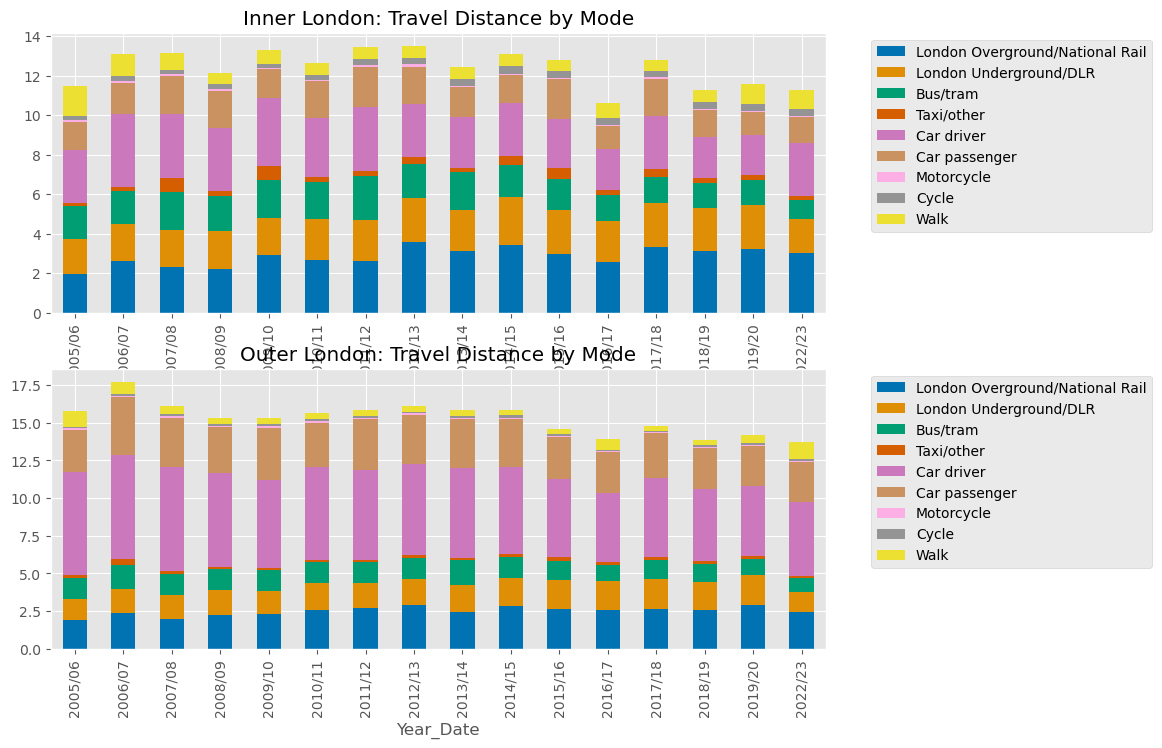

In [82]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Get the "colorblind" palette
colors = sns.color_palette("colorblind", n_colors=len(df_travel_distances_innr_ldn))                
df_travel_distances_innr_ldn.plot(kind='bar', stacked=True, color=colors,  ax=axes[0])
axes[0].set_title("Inner London: Travel Distance by Mode")

colors = sns.color_palette("colorblind", n_colors=len(df_travel_distances_out_ldn))                
df_travel_distances_out_ldn.plot(kind='bar', stacked=True, color=colors,  ax=axes[1])
axes[1].set_title("Outer London: Travel Distance by Mode")

plt.style.use('ggplot')

# position at which legend to be added 
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("inner_otr-dist_by_mode.png")

plt.show()

### <center><b>Gender</b></center>

In [83]:
df_trips = pd.read_excel('ltds-0523-acc.xlsx', sheet_name="Trips")
df_stages = pd.read_excel('ltds-0523-acc.xlsx', sheet_name="Stages")
df_trip_rates = pd.read_excel('ltds-0523-acc.xlsx', sheet_name="Trip rates")
df_stage_rates = pd.read_excel('ltds-0523-acc.xlsx', sheet_name="Stage rates")
df_trip_rates_wkdys = pd.read_excel('ltds-0523-acc.xlsx', sheet_name="Trip rates - weekdays")
df_trip_rates_wkends = pd.read_excel('ltds-0523-acc.xlsx', sheet_name="Trip rates - weekends")
df_mode_shares = pd.read_excel('ltds-0523-acc.xlsx', sheet_name="Mode shares")
df_purpose_shares = pd.read_excel('ltds-0523-acc.xlsx', sheet_name="Purpose shares")
df_travel_times = pd.read_excel('ltds-0523-acc.xlsx', sheet_name="Travel times")
df_travel_distances = pd.read_excel('ltds-0523-acc.xlsx', sheet_name="Travel distances")

In [84]:
df_trips_male = df_trips.iloc[40:50,0:17]
df_trips_female = df_trips.iloc [52:62,0:17]
df_stages_male =  df_stages.iloc[37:47,0:17]
df_stages_female =  df_stages.iloc[48:58,0:17]
df_trip_rates_male =  df_trip_rates.iloc[40:50,0:17]
df_trip_rates_female =  df_trip_rates.iloc[52:62,0:17]
df_stage_rates_male =  df_stage_rates.iloc[37:47,0:17]
df_stage_rates_female =  df_stage_rates.iloc[48:58,0:17]
df_trip_rates_wkdys_male =  df_trip_rates_wkdys.iloc[40:50,0:17]
df_trip_rates_wkdys_female =  df_trip_rates_wkdys.iloc[52:62,0:17]
df_trip_rates_wkends_male =  df_trip_rates_wkends.iloc[40:50,0:17]
df_trip_rates_wkends_female =  df_trip_rates_wkends.iloc[52:62,0:17]
df_mode_shares_male =  df_mode_shares.iloc[38:48,0:17]
df_mode_shares_female =  df_mode_shares.iloc[49:59,0:17]


### Trips Male

In [85]:
#subsetting dataset to isolate greater london summaries 
df_trips_male = df_trips.iloc[40:50,0:17]

#set column names equal to values in row index position 0
df_trips_male.columns = df_trips_male.iloc[0]

#remove first row from DataFrame
df_trips_male = df_trips_male[1:]

df_trips_male = df_trips_male.T

# Set the first row as the header
df_trips_male.columns = df_trips_male.iloc[0]

df_trips_male.index.rename('Year_Date', inplace=True)

df_trips_male = df_trips_male[1:]


df_trips_male = df_trips_male.T
df_trips_male
df_trips_male.T

Male,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,475621,697623,1049779,89110,2865096,891688,73673,193960,2495874
2006/07,439530,714218,1109836,139636,2793493,973756,72394,215061,2613502
2007/08,397035,743219,1100834,113438,2835214,1045094,85062,241029,2641367
2008/09,463866,770726,1155574,86742,2451561,889886,83500,236714,2360983
2009/10,493883,724462,1116768,112992,2587468,888832,81750,250437,2426682
2010/11,522720,796146,1117187,128885,2561509,903199,54666,290990,2516502
2011/12,513765,777058,1194658,125097,2761590,947264,70038,406064,2614877
2012/13,559711,912871,1176135,119800,2532456,878581,79470,355382,2790214
2013/14,572982,882576,1214109,128692,2587440,953252,62083,391096,2610594


### Trips Female

In [86]:
#subsetting dataset to isolate greater london summaries 
df_trips_female = df_trips.iloc [52:62,0:17]

#set column names equal to values in row index position 0
df_trips_female.columns = df_trips_female.iloc[0]

#remove first row from DataFrame
df_trips_female = df_trips_female[1:]

df_trips_female = df_trips_female.T

# Set the first row as the header
df_trips_female.columns = df_trips_female.iloc[0]

df_trips_female.index.rename('Year_Date', inplace=True)

df_trips_female = df_trips_female[1:]


df_trips_female = df_trips_female.T
df_trips_female
df_trips_female.T

Female,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,300389,494443,1420754,101277,2370001,1448198,10633,98447,3064472
2006/07,325984,551425,1487841,136104,2303910,1615345,15235,98092,3088399
2007/08,355657,596132,1492568,127410,2289862,1530369,8787,98494,3089323
2008/09,345430,594284,1526814,100834,2048506,1320461,10970,95490,2910469
2009/10,355663,583915,1520535,101395,1964894,1425779,8659,107021,2902172
2010/11,401970,674827,1688950,121868,2202429,1442720,8722,111962,2955621
2011/12,433754,699477,1634708,127432,2124791,1501493,10950,120209,3183460
2012/13,502222,711253,1645662,137392,2169217,1426492,10808,134045,3255852
2013/14,435001,677714,1773181,125564,2377327,1545164,9275,135907,3258683


In [87]:
compmf_trip = (df_trips_male.compare(df_trips_female,keep_equal=True, keep_shape=True))
#renaming and transpoing to render a long multiindex dataframe

compmf_trip.rename(columns={'self':'Male','other':'Female'},inplace=True)
compmf_trip

compmf_trip = compmf_trip.T

compmf_trip = compmf_trip.reset_index()

#group the data by geo split
k = compmf_trip.groupby(['Year_Date','level_1'])['Cycle'].sum()

#create the dataframe
k= pd.DataFrame(k)
k = k.reset_index()

k.rename(columns={'level_1':'Gender'},inplace=True)
k.head()

,Year_Date,Gender,Cycle
0,2005/06,Female,98447
1,2005/06,Male,193960
2,2006/07,Female,98092
3,2006/07,Male,215061
4,2007/08,Female,98494


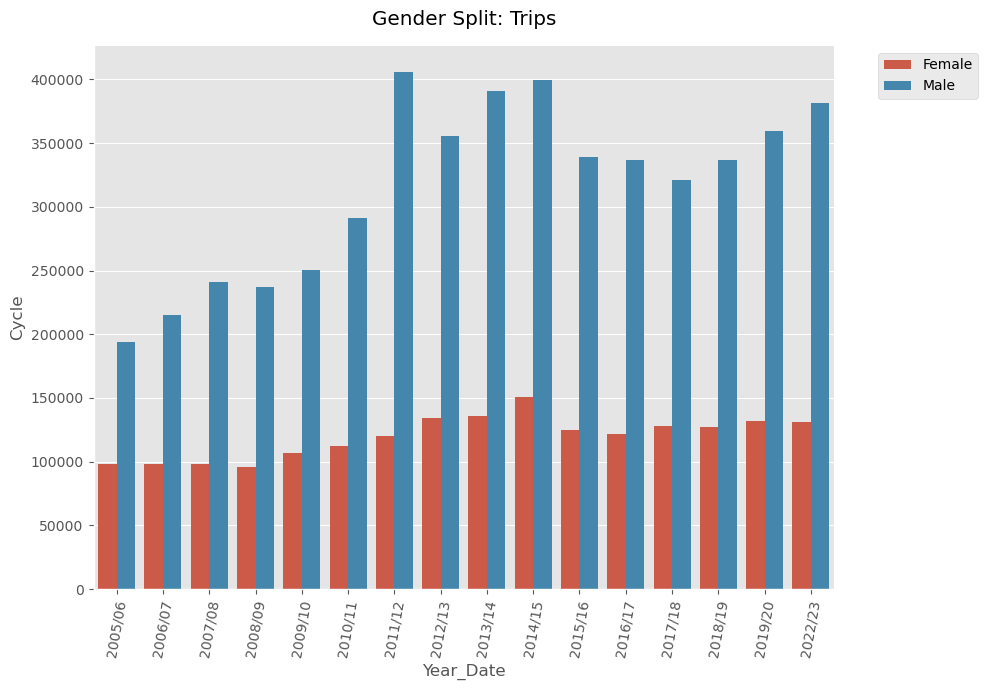

In [88]:
fig, ax = plt.subplots(figsize=(10, 7))
colors = sns.color_palette("colorblind", n_colors=len(k))

sns.barplot(x = 'Year_Date',
            y = 'Cycle',
            hue = 'Gender',
            data = k)

sns.despine()
plt.style.use('ggplot')
plt.xticks(rotation=80)
# title of plot
plt.title("Gender Split: Trips",pad=15)

sns.plotting_context("notebook")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.tight_layout()

plt.savefig("Gender_Split_Trips.png")
plt.show()


### Stages Male

In [89]:
df_stages_male = df_stages.iloc[37:46,0:17]

#set column names equal to values in row index position 0
df_stages_male.columns = df_stages_male.iloc[0]

#remove first row from DataFrame
df_stages_male = df_stages_male[1:]

df_stages_male = df_stages_male.T

# Set the first row as the header
df_stages_male.columns = df_stages_male.iloc[0]

df_stages_male.index.rename('Year_Date', inplace=True)

df_stages_male = df_stages_male[1:]


df_stages_male = df_stages_male.T
df_stages_male
df_stages_male.T

Male,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle
Year_Date,,,,,,,,
2005/06,586612,1254603,1727292,125642,3060718,955669,74863,207775
2006/07,545118,1319432,1730198,162267,2948252,1030018,73113,229982
2007/08,475377,1356355,1707871,138656,2929005,1049998,85062,250565
2008/09,556038,1391802,1814308,102278,2518358,902448,83983,243383
2009/10,598628,1368071,1777601,133578,2653727,909030,82679,270807
2010/11,683037,1431633,1784318,140913,2611925,917424,54666,308268
2011/12,673468,1435622,1817574,142545,2833795,975080,70038,433385
2012/13,702802,1611590,1840625,143227,2594824,910533,80223,378606
2013/14,751489,1607237,1943968,144164,2655839,980727,62083,409508


### Stages Female

In [90]:
df_stages_female = df_stages.iloc[48:57,0:17]

#set column names equal to values in row index position 0
df_stages_female.columns = df_stages_female.iloc[0]

#remove first row from DataFrame
df_stages_female = df_stages_female[1:]

df_stages_female = df_stages_female.T

# Set the first row as the header
df_stages_female.columns = df_stages_female.iloc[0]

df_stages_female.index.rename('Year_Date', inplace=True)

df_stages_female = df_stages_female[1:]


df_stages_female = df_stages_female.T
df_stages_female
df_stages_female.T

Female,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle
Year_Date,,,,,,,,
2005/06,354709,867826,2094887,145866,2502442,1526176,11364,100788
2006/07,397308,972999,2151528,164619,2417165,1722058,15235,101903
2007/08,440953,1105885,2135054,150978,2362056,1573803,9530,101024
2008/09,416671,1030335,2230652,118907,2109172,1353686,10970,99178
2009/10,431312,1040098,2232693,117106,2008567,1474170,8659,109066
2010/11,496762,1213484,2405825,132053,2248178,1486471,9125,119081
2011/12,547460,1234974,2337897,149303,2185289,1547124,10950,136509
2012/13,616179,1287295,2424987,154235,2221601,1486364,11565,145757
2013/14,535939,1225595,2528551,141528,2426710,1608724,9275,145727


In [91]:
compmf_stages = (df_stages_male.compare(df_stages_female,keep_equal=True, keep_shape=True))

In [92]:

compmf_stages.rename(columns={'self':'Male','other':'Female'},inplace=True)


compmf_stages = compmf_stages.T

compmf_stages = compmf_stages.reset_index()

#group the data by geo split
m = compmf_stages.groupby(['Year_Date','level_1'])['Cycle'].sum()

#create the dataframe
m= pd.DataFrame(m)
m = m.reset_index()

m.rename(columns={'level_1':'Gender'},inplace=True)
m.head()

,Year_Date,Gender,Cycle
0,2005/06,Female,100788
1,2005/06,Male,207775
2,2006/07,Female,101903
3,2006/07,Male,229982
4,2007/08,Female,101024


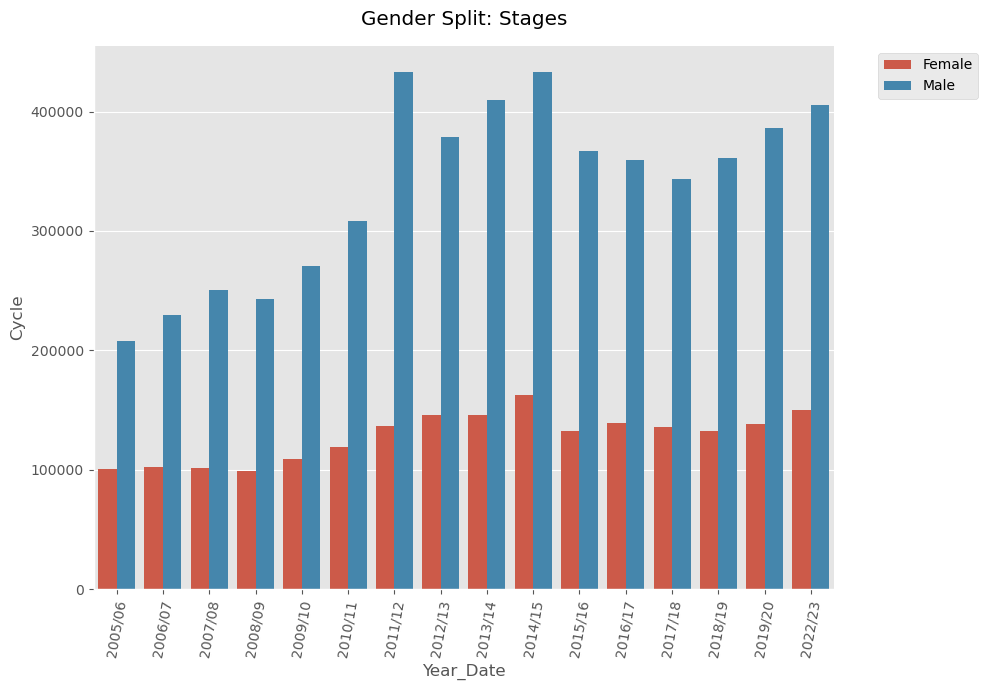

In [93]:
fig, ax = plt.subplots(figsize=(10, 7))
colors = sns.color_palette("colorblind", n_colors=len(k))

sns.barplot(x = 'Year_Date',
            y = 'Cycle',
            hue = 'Gender',
            data = m)

sns.despine()
plt.style.use('ggplot')
plt.xticks(rotation=80)
# title of plot
plt.title("Gender Split: Stages",pad=15)

sns.plotting_context("notebook")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.tight_layout()

plt.savefig("compmf_stages.png")
plt.show()


### Trip Rates Male

In [94]:
df_trips_rates_male = df_trip_rates.iloc[40:50,0:17]

#set column names equal to values in row index position 0
df_trips_rates_male.columns = df_trips_rates_male.iloc[0]

#remove first row from DataFrame
df_trips_rates_male = df_trips_rates_male[1:]

df_trips_rates_male = df_trips_rates_male.T

# Set the first row as the header
df_trips_rates_male.columns = df_trips_rates_male.iloc[0]

df_trips_rates_male.index.rename('Year_Date', inplace=True)

df_trips_rates_male = df_trips_rates_male[1:]


df_trips_rates_male = df_trips_rates_male.T
df_trips_rates_male
df_trips_rates_male.T

Male,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,0.13845,0.20307,0.30558,0.02594,0.83401,0.25956,0.02145,0.05646,0.72653
2006/07,0.1267,0.20589,0.31993,0.04025,0.80527,0.2807,0.02087,0.06199,0.75338
2007/08,0.11316,0.21182,0.31374,0.03233,0.80805,0.29786,0.02424,0.06869,0.7528
2008/09,0.13019,0.21632,0.32433,0.02435,0.68807,0.24976,0.02344,0.06644,0.66265
2009/10,0.1366,0.20037,0.30887,0.03125,0.71563,0.24583,0.02261,0.06926,0.67116
2010/11,0.14257,0.21715,0.30471,0.03515,0.69864,0.24634,0.01491,0.07937,0.68637
2011/12,0.13738,0.20778,0.31945,0.03345,0.73844,0.2533,0.01873,0.10858,0.69921
2012/13,0.14702,0.23979,0.30894,0.0323,0.66521,0.23078,0.02087,0.09335,0.73291
2013/14,0.1484,0.22858,0.31445,0.03333,0.67013,0.24689,0.01608,0.10129,0.67613


### Trip Rates Female

In [95]:
df_trip_rates_female =  df_trip_rates.iloc[52:62,0:17]

#set column names equal to values in row index position 0
df_trip_rates_female.columns = df_trip_rates_female.iloc[0]

#remove first row from DataFrame
df_trip_rates_female = df_trip_rates_female[1:]

df_trip_rates_female = df_trip_rates_female.T

# Set the first row as the header
df_trip_rates_female.columns = df_trip_rates_female.iloc[0]

df_trip_rates_female.index.rename('Year_Date', inplace=True)

df_trip_rates_female = df_trip_rates_female[1:]


df_trip_rates_female = df_trip_rates_female.T
df_trip_rates_female
df_trip_rates_female.T

Female,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,0.08387,0.13804,0.39666,0.02828,0.66169,0.40433,0.00297,0.02749,0.85558
2006/07,0.10811,0.17875,0.36687,0.03894,0.71991,0.36566,0.01238,0.04423,0.80528
2007/08,0.09746,0.16336,0.409,0.03491,0.62748,0.41936,0.00241,0.02699,0.84655
2008/09,0.09348,0.16083,0.41319,0.02729,0.55437,0.35735,0.00297,0.02584,0.78764
2009/10,0.09471,0.1555,0.40492,0.027,0.52325,0.37969,0.00231,0.0285,0.77285
2010/11,0.10557,0.17722,0.44355,0.032,0.5784,0.37889,0.00229,0.0294,0.7762
2011/12,0.11206,0.18071,0.42232,0.03292,0.54893,0.3879,0.00283,0.03106,0.82243
2012/13,0.12769,0.18084,0.41842,0.03493,0.55154,0.3627,0.00275,0.03408,0.82783
2013/14,0.10922,0.17016,0.44522,0.03153,0.59691,0.38797,0.00233,0.03412,0.81821


In [96]:
compmf_trip_r = (df_trips_rates_male.compare(df_trip_rates_female,keep_equal=True, keep_shape=True))

In [97]:
compmf_trip_r.rename(columns={'self':'Male','other':'Female'},inplace=True)


compmf_trip_r = compmf_trip_r.T

compmf_trip_r = compmf_trip_r.reset_index()

#group the data by geo split
n = compmf_trip_r.groupby(['Year_Date','level_1'])['Cycle'].sum()

#create the dataframe
n= pd.DataFrame(n)
n = n.reset_index()

n.rename(columns={'level_1':'Gender'},inplace=True)
n.head()

,Year_Date,Gender,Cycle
0,2005/06,Female,0.02749
1,2005/06,Male,0.05646
2,2006/07,Female,0.04423
3,2006/07,Male,0.06199
4,2007/08,Female,0.02699


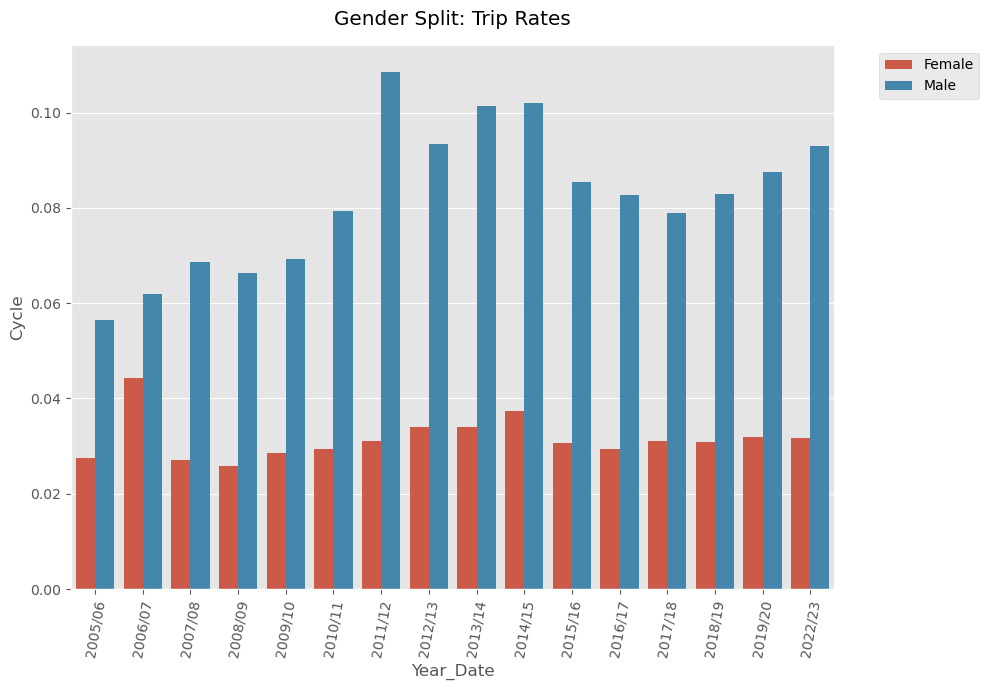

In [98]:
fig, ax = plt.subplots(figsize=(10, 7))
colors = sns.color_palette("colorblind", n_colors=len(n))

sns.barplot(x = 'Year_Date',
            y = 'Cycle',
            hue = 'Gender',
            data = n)

sns.despine()
plt.style.use('ggplot')
plt.xticks(rotation=80)
# title of plot
plt.title("Gender Split: Trip Rates",pad=15)

sns.plotting_context("notebook")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.tight_layout()

plt.savefig("compmf_trip_r.png")
plt.show()

[ perhaps a pie of the average over the entire time horizon]? 

### Stage Rates Male

In [99]:
df_stage_rates_male = df_stage_rates.iloc[37:47,0:17]

#set column names equal to values in row index position 0
df_stage_rates_male.columns = df_stage_rates_male.iloc[0]

#remove first row from DataFrame
df_stage_rates_male = df_stage_rates_male[1:]

df_stage_rates_male = df_stage_rates_male.T

# Set the first row as the header
df_stage_rates_male.columns = df_stage_rates_male.iloc[0]

df_stage_rates_male.index.rename('Year_Date', inplace=True)

df_stage_rates_male = df_stage_rates_male[1:]


df_stage_rates_male = df_stage_rates_male.T
df_stage_rates_male
df_stage_rates_male.T


Male,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,All (excluding Walk)
Year_Date,,,,,,,,,
2005/06,0.17076,0.3652,0.5028,0.03657,0.89095,0.27819,0.02179,0.06048,2.32675
2006/07,0.15714,0.38035,0.49876,0.04678,0.84988,0.29692,0.02108,0.0663,2.3172
2007/08,0.13548,0.38657,0.48675,0.03952,0.83478,0.29925,0.02424,0.07141,2.27801
2008/09,0.15606,0.39063,0.50922,0.02871,0.70682,0.25329,0.02357,0.06831,2.13661
2009/10,0.16557,0.37837,0.49164,0.03694,0.73395,0.25141,0.02287,0.0749,2.15566
2010/11,0.1863,0.39047,0.48667,0.03843,0.71239,0.25022,0.01491,0.08408,2.16347
2011/12,0.18008,0.38388,0.48601,0.03812,0.75775,0.26073,0.01873,0.11589,2.24119
2012/13,0.18461,0.42332,0.48348,0.03762,0.68159,0.23917,0.02107,0.09945,2.17032
2013/14,0.19463,0.41626,0.50348,0.03734,0.68785,0.254,0.01608,0.10606,2.2157


### Stage Rates Female

In [100]:
df_stage_rates_female = df_stage_rates.iloc[48:57,0:17]

#set column names equal to values in row index position 0
df_stage_rates_female.columns = df_stage_rates_female.iloc[0]

#remove first row from DataFrame
df_stage_rates_female = df_stage_rates_female[1:]

df_stage_rates_female = df_stage_rates_female.T

# Set the first row as the header
df_stage_rates_female.columns = df_stage_rates_female.iloc[0]

df_stage_rates_female.index.rename('Year_Date', inplace=True)

df_stage_rates_female = df_stage_rates_female[1:]


df_stage_rates_female = df_stage_rates_female.T
df_stage_rates_female
df_stage_rates_female.T

Female,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle
Year_Date,,,,,,,,
2005/06,0.09903,0.24229,0.58488,0.04072,0.69866,0.4261,0.00317,0.02814
2006/07,0.11001,0.26941,0.59573,0.04558,0.66928,0.47681,0.00422,0.02822
2007/08,0.12083,0.30304,0.58506,0.04137,0.64726,0.43126,0.00261,0.02768
2008/09,0.11276,0.27883,0.60367,0.03218,0.57079,0.36634,0.00297,0.02684
2009/10,0.11486,0.27698,0.59457,0.03119,0.53488,0.39257,0.00231,0.02904
2010/11,0.13046,0.31869,0.63182,0.03468,0.59042,0.39038,0.0024,0.03127
2011/12,0.14143,0.31905,0.60398,0.03857,0.56456,0.39969,0.00283,0.03527
2012/13,0.15667,0.32731,0.61657,0.03922,0.56486,0.37792,0.00294,0.03706
2013/14,0.13457,0.30773,0.63488,0.03554,0.60931,0.40393,0.00233,0.03659


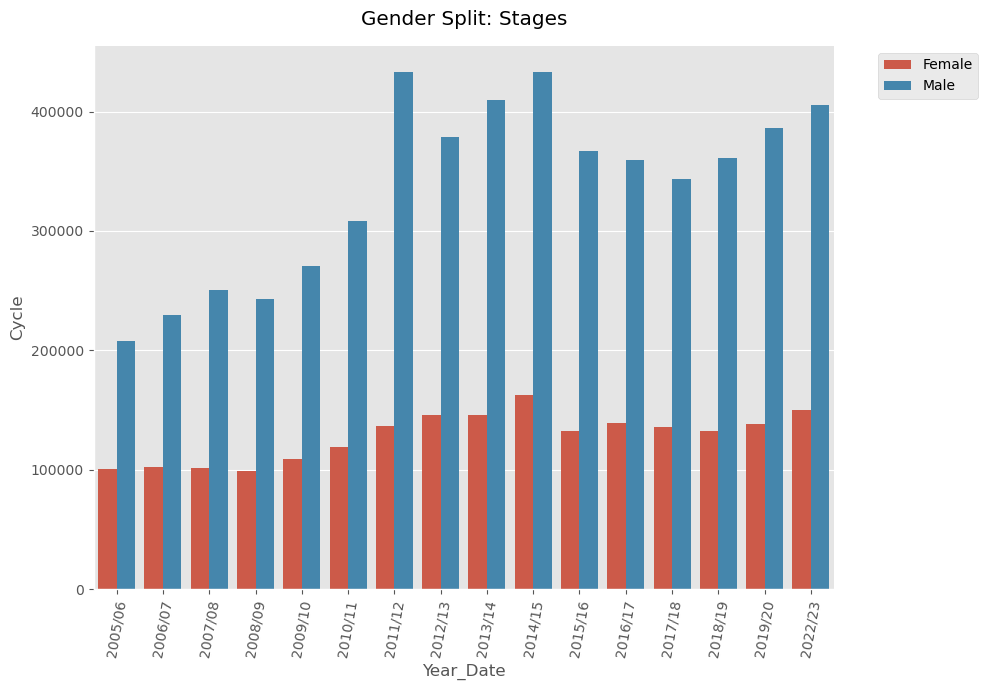

In [101]:
fig, ax = plt.subplots(figsize=(10, 7))
colors = sns.color_palette("colorblind", n_colors=len(k))

sns.barplot(x = 'Year_Date',
            y = 'Cycle',
            hue = 'Gender',
            data = m)

sns.despine()
plt.style.use('ggplot')
plt.xticks(rotation=80)
# title of plot
plt.title("Gender Split: Stages",pad=15)

sns.plotting_context("notebook")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.tight_layout()

plt.savefig("compmf_stages.png")
plt.show()

### Trip Rates Weekdays Male

In [102]:
df_trip_rates_wkdys_male = df_trip_rates_wkdys.iloc[40:50,0:17]

#set column names equal to values in row index position 0
df_trip_rates_wkdys_male.columns = df_trip_rates_wkdys_male.iloc[0]

#remove first row from DataFrame
df_trip_rates_wkdys_male = df_trip_rates_wkdys_male[1:]

df_trip_rates_wkdys_male = df_trip_rates_wkdys_male.T

# Set the first row as the header
df_trip_rates_wkdys_male.columns = df_trip_rates_wkdys_male.iloc[0]

df_trip_rates_wkdys_male.index.rename('Year_Date', inplace=True)

df_trip_rates_wkdys_male = df_trip_rates_wkdys_male[1:]


df_trip_rates_wkdys_male = df_trip_rates_wkdys_male.T
df_trip_rates_wkdys_male
df_trip_rates_wkdys_male.T

Male,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,0.16323,0.23181,0.34134,0.0287,0.85538,0.24858,0.02388,0.05989,0.71477
2006/07,0.14985,0.24057,0.34313,0.04112,0.80754,0.24786,0.02583,0.06319,0.78294
2007/08,0.14496,0.25424,0.33521,0.03489,0.80413,0.25575,0.02808,0.07659,0.78528
2008/09,0.16294,0.25625,0.35977,0.02399,0.68691,0.21943,0.03109,0.07942,0.69032
2009/10,0.15816,0.24281,0.3364,0.03165,0.72904,0.2201,0.02674,0.06955,0.66221
2010/11,0.17312,0.25545,0.33282,0.02585,0.69132,0.21305,0.01732,0.08872,0.6944
2011/12,0.15719,0.2535,0.35081,0.0342,0.71088,0.21747,0.02231,0.10978,0.71706
2012/13,0.17026,0.2678,0.34871,0.02932,0.66071,0.20053,0.02527,0.10731,0.76562
2013/14,0.17861,0.275,0.33693,0.03118,0.65641,0.21434,0.01868,0.11532,0.71604


### Trip Rates Weekdays Female

In [103]:
df_trip_rates_wkdys_female = df_trip_rates_wkdys.iloc[52:62,0:17]

#set column names equal to values in row index position 0
df_trip_rates_wkdys_female.columns = df_trip_rates_wkdys_female.iloc[0]

#remove first row from DataFrame
df_trip_rates_wkdys_female = df_trip_rates_wkdys_female[1:]

df_trip_rates_wkdys_female = df_trip_rates_wkdys_female.T

# Set the first row as the header
df_trip_rates_wkdys_female.columns = df_trip_rates_wkdys_female.iloc[0]

df_trip_rates_wkdys_female.index.rename('Year_Date', inplace=True)

df_trip_rates_wkdys_female = df_trip_rates_wkdys_female[1:]


df_trip_rates_wkdys_female = df_trip_rates_wkdys_female.T
df_trip_rates_wkdys_female
df_trip_rates_wkdys_female.T

Female,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,0.10118,0.16839,0.4504,0.02386,0.75112,0.37114,0.00243,0.02647,0.92596
2006/07,0.10885,0.17963,0.46232,0.03843,0.6967,0.36933,0.00479,0.03193,0.94533
2007/08,0.12058,0.1744,0.45803,0.03614,0.68147,0.35458,0.00295,0.02973,0.9447
2008/09,0.11594,0.19143,0.47322,0.02456,0.58835,0.28898,0.00388,0.03081,0.88493
2009/10,0.11183,0.1872,0.4557,0.02389,0.56267,0.3243,0.00153,0.03565,0.84306
2010/11,0.12172,0.20405,0.49498,0.02856,0.63046,0.30213,0.00257,0.03331,0.8591
2011/12,0.131,0.20704,0.46861,0.03356,0.60738,0.32003,0.00399,0.03697,0.92463
2012/13,0.14661,0.20368,0.45999,0.0333,0.6059,0.29077,0.00314,0.03808,0.91639
2013/14,0.12708,0.19902,0.49297,0.03115,0.66362,0.32276,0.00176,0.03855,0.89638


In [104]:
compmf_trw = (df_trip_rates_wkdys_male.compare(df_trip_rates_wkdys_female,keep_equal=True, keep_shape=True))

In [105]:
compmf_trw.rename(columns={'self':'Male','other':'Female'},inplace=True)


compmf_trw = compmf_trw.T

compmf_trw = compmf_trw.reset_index()

#group the data by geo split
o = compmf_trw.groupby(['Year_Date','level_1'])['Cycle'].sum()

#create the dataframe
o= pd.DataFrame(o)
o = o.reset_index()

o.rename(columns={'level_1':'Gender'},inplace=True)
o.head()

,Year_Date,Gender,Cycle
0,2005/06,Female,0.02647
1,2005/06,Male,0.05989
2,2006/07,Female,0.03193
3,2006/07,Male,0.06319
4,2007/08,Female,0.02973


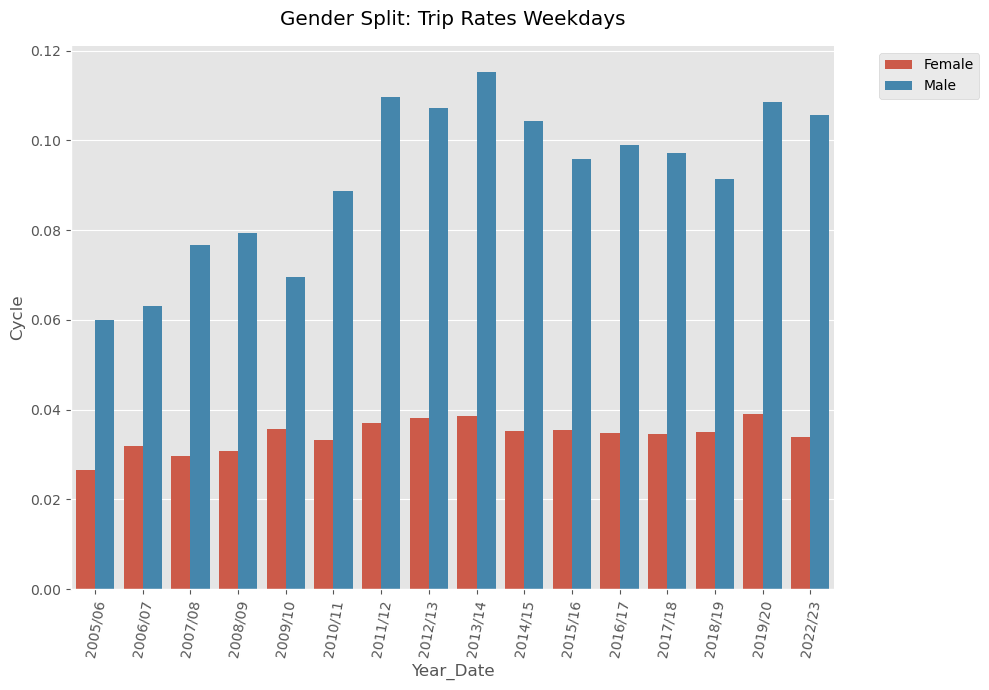

In [106]:
fig, ax = plt.subplots(figsize=(10, 7))
colors = sns.color_palette("colorblind", n_colors=len(n))

sns.barplot(x = 'Year_Date',
            y = 'Cycle',
            hue = 'Gender',
            data = o)

sns.despine()
plt.style.use('ggplot')
plt.xticks(rotation=80)
# title of plot
plt.title("Gender Split: Trip Rates Weekdays",pad=15)

sns.plotting_context("notebook")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.tight_layout()

plt.savefig("compmf_trw.png")
plt.show()

### Trip Rates Weekends Male

In [107]:
df_trip_rates_wkends_male = df_trip_rates_wkends.iloc[40:50,0:17]

#set column names equal to values in row index position 0
df_trip_rates_wkends_male.columns = df_trip_rates_wkends_male.iloc[0]

#remove first row from DataFrame
df_trip_rates_wkends_male = df_trip_rates_wkends_male[1:]

df_trip_rates_wkends_male = df_trip_rates_wkends_male.T

# Set the first row as the header
df_trip_rates_wkends_male.columns = df_trip_rates_wkends_male.iloc[0]

df_trip_rates_wkends_male.index.rename('Year_Date', inplace=True)

df_trip_rates_wkends_male = df_trip_rates_wkends_male[1:]


df_trip_rates_wkends_male = df_trip_rates_wkends_male.T
df_trip_rates_wkends_male
df_trip_rates_wkends_male.T

Male,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,0.0693,0.12827,0.21384,0.02002,0.75454,0.29639,0.01418,0.049,0.71373
2006/07,0.06257,0.11887,0.25605,0.03627,0.77207,0.36601,0.00776,0.05516,0.66638
2007/08,0.04148,0.11623,0.25596,0.02853,0.84864,0.40525,0.01654,0.04872,0.68885
2008/09,0.05584,0.12725,0.256,0.02622,0.72571,0.34231,0.00451,0.03829,0.63032
2009/10,0.08114,0.09749,0.23345,0.03011,0.6856,0.29852,0.01214,0.07031,0.68883
2010/11,0.06692,0.11725,0.23805,0.05944,0.71268,0.33353,0.00936,0.06007,0.66791
2011/12,0.09174,0.10424,0.24736,0.03088,0.83104,0.341,0.00974,0.11067,0.66806
2012/13,0.10271,0.17606,0.21576,0.04027,0.69937,0.31465,0.00978,0.06359,0.67732
2013/14,0.08856,0.12774,0.2887,0.03852,0.73611,0.34302,0.01099,0.07755,0.63629


### Trip Rates Weekends Female

In [108]:
df_trip_rates_wkends_female = df_trip_rates_wkends.iloc[52:62,0:17]

#set column names equal to values in row index position 0
df_trip_rates_wkends_female.columns = df_trip_rates_wkends_female.iloc[0]

#remove first row from DataFrame
df_trip_rates_wkends_female = df_trip_rates_wkends_female[1:]

df_trip_rates_wkends_female = df_trip_rates_wkends_female.T

# Set the first row as the header
df_trip_rates_wkends_female.columns = df_trip_rates_wkends_female.iloc[0]

df_trip_rates_wkends_female.index.rename('Year_Date', inplace=True)

df_trip_rates_wkends_female = df_trip_rates_wkends_female[1:]


df_trip_rates_wkends_female = df_trip_rates_wkends_female.T
df_trip_rates_wkends_female
df_trip_rates_wkends_female.T

Female,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,0.03789,0.07423,0.2664,0.03632,0.44302,0.50418,0.00437,0.02404,0.68502
2006/07,0.04383,0.08947,0.27771,0.03745,0.47127,0.62519,0.00318,0.01534,0.6085
2007/08,0.03783,0.14105,0.28929,0.03213,0.4797,0.58849,0.00218,0.02077,0.59851
2008/09,0.04625,0.09501,0.28589,0.03645,0.48834,0.5441,0.00097,0.01566,0.58321
2009/10,0.06107,0.08257,0.28244,0.03305,0.43314,0.53408,0.0042,0.01317,0.61434
2010/11,0.07048,0.10611,0.3008,0.04347,0.46275,0.57532,0.00148,0.02474,0.57588
2011/12,0.06851,0.12423,0.31295,0.03039,0.40678,0.55669,0,0.01547,0.58548
2012/13,0.07998,0.12437,0.31232,0.03987,0.41979,0.54768,0.00202,0.02448,0.62953
2013/14,0.07466,0.10272,0.33256,0.0311,0.4476,0.55989,0.00405,0.02296,0.63169


In [109]:
compmf_trw_ends = (df_trip_rates_wkends_male.compare(df_trip_rates_wkends_female,keep_equal=True, keep_shape=True))

In [110]:
compmf_trw_ends.rename(columns={'self':'Male','other':'Female'},inplace=True)


compmf_trw_ends = compmf_trw_ends.T

compmf_trw_ends = compmf_trw_ends.reset_index()

#group the data by geo split
p = compmf_trw_ends.groupby(['Year_Date','level_1'])['Cycle'].sum()

#create the dataframe
p= pd.DataFrame(p)
p= p.reset_index()

p.rename(columns={'level_1':'Gender'},inplace=True)
p.head()

,Year_Date,Gender,Cycle
0,2005/06,Female,0.02404
1,2005/06,Male,0.049
2,2006/07,Female,0.01534
3,2006/07,Male,0.05516
4,2007/08,Female,0.02077


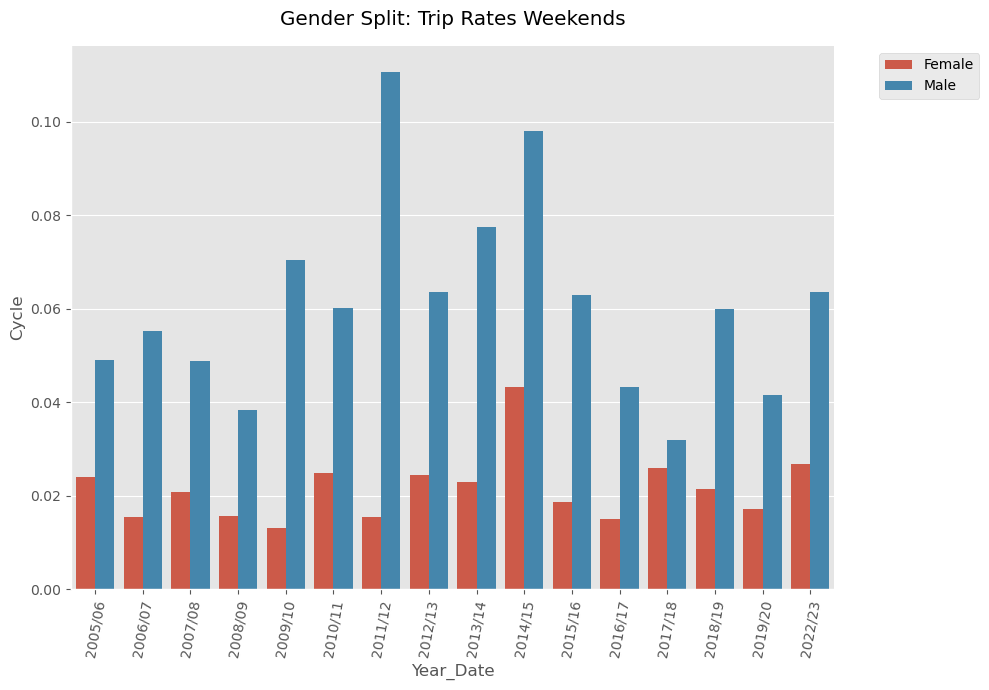

In [111]:
fig, ax = plt.subplots(figsize=(10, 7))
colors = sns.color_palette("colorblind", n_colors=len(n))

sns.barplot(x = 'Year_Date',
            y = 'Cycle',
            hue = 'Gender',
            data = p)

sns.despine()
plt.style.use('ggplot')
plt.xticks(rotation=80)
# title of plot
plt.title("Gender Split: Trip Rates Weekends",pad=15)

sns.plotting_context("notebook")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.tight_layout()

plt.savefig("compmf_trw_ends.png")
plt.show()

### Mode Shares Male

In [112]:
df_mode_shares_male = df_mode_shares.iloc[38:48,0:17]

#set column names equal to values in row index position 0
df_mode_shares_male.columns = df_mode_shares_male.iloc[0]

#remove first row from DataFrame
df_mode_shares_male = df_mode_shares_male[1:]

df_mode_shares_male = df_mode_shares_male.T

# Set the first row as the header
df_mode_shares_male.columns = df_mode_shares_male.iloc[0]

df_mode_shares_male.index.rename('Year_Date', inplace=True)

df_mode_shares_male = df_mode_shares_male[1:]


df_mode_shares_male = df_mode_shares_male.T
df_mode_shares_male
df_mode_shares_male.T

Male,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,0.05385,0.07898,0.11886,0.01009,0.32438,0.10096,0.00834,0.02196,0.28258
2006/07,0.04845,0.07873,0.12234,0.01539,0.30794,0.10734,0.00798,0.02371,0.2881
2007/08,0.04315,0.08076,0.11963,0.01233,0.3081,0.11357,0.00924,0.02619,0.28703
2008/09,0.05458,0.09068,0.13596,0.01021,0.28843,0.1047,0.00982,0.02785,0.27778
2009/10,0.05688,0.08343,0.12861,0.01321,0.29798,0.10236,0.00941,0.02884,0.27947
2010/11,0.05879,0.08954,0.12564,0.01449,0.28808,0.10158,0.00615,0.03273,0.28301
2011/12,0.0546,0.08257,0.12695,0.01329,0.29346,0.10066,0.00744,0.04315,0.27787
2012/13,0.05949,0.09703,0.12502,0.01307,0.26919,0.09339,0.00845,0.03778,0.29659
2013/14,0.06094,0.09386,0.12912,0.01369,0.27518,0.10138,0.0066,0.04159,0.27764


### Mode Shares Female

In [113]:
df_mode_shares_female = df_mode_shares.iloc[49:59,0:17]

#set column names equal to values in row index position 0
df_mode_shares_female.columns = df_mode_shares_female.iloc[0]

#remove first row from DataFrame
df_mode_shares_female = df_mode_shares_female[1:]

df_mode_shares_female = df_mode_shares_female.T

# Set the first row as the header
df_mode_shares_female.columns = df_mode_shares_female.iloc[0]

df_mode_shares_female.index.rename('Year_Date', inplace=True)

df_mode_shares_female = df_mode_shares_female[1:]


df_mode_shares_female = df_mode_shares_female.T
df_mode_shares_female
df_mode_shares_female.T

Female,London Overground/National Rail,London Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk
Year_Date,,,,,,,,,
2005/06,0.03227,0.05312,0.15263,0.01088,0.2546,0.15558,0.00114,0.01058,0.32921
2006/07,0.03388,0.05731,0.15462,0.01414,0.23943,0.16787,0.00158,0.01019,0.32096
2007/08,0.03709,0.06217,0.15566,0.01329,0.23881,0.1596,0.00092,0.01027,0.32219
2008/09,0.03858,0.06638,0.17053,0.01126,0.2288,0.14748,0.00123,0.01067,0.32507
2009/10,0.03965,0.0651,0.16951,0.0113,0.21905,0.15895,0.00097,0.01193,0.32354
2010/11,0.04183,0.07023,0.17577,0.01268,0.2292,0.15014,0.00091,0.01165,0.30759
2011/12,0.0441,0.07111,0.16619,0.01296,0.21602,0.15265,0.00111,0.01222,0.32364
2012/13,0.05026,0.07118,0.16468,0.01375,0.21707,0.14275,0.00108,0.01341,0.32582
2013/14,0.04208,0.06556,0.17152,0.01215,0.22996,0.14947,0.0009,0.01315,0.31522


In [114]:
compmf_m_shr = (df_mode_shares_male.compare(df_mode_shares_female,keep_equal=True, keep_shape=True))

In [115]:
compmf_m_shr.rename(columns={'self':'Male','other':'Female'},inplace=True)


compmf_m_shr = compmf_m_shr.T

compmf_m_shr = compmf_m_shr.reset_index()

#group the data by geo split
q = compmf_m_shr.groupby(['Year_Date','level_1'])['Cycle'].sum()

#create the dataframe
q= pd.DataFrame(q)
q= q.reset_index()

q.rename(columns={'level_1':'Gender'},inplace=True)
q.head()

,Year_Date,Gender,Cycle
0,2005/06,Female,0.01058
1,2005/06,Male,0.02196
2,2006/07,Female,0.01019
3,2006/07,Male,0.02371
4,2007/08,Female,0.01027


In [116]:
#compmf_m_shr.columns

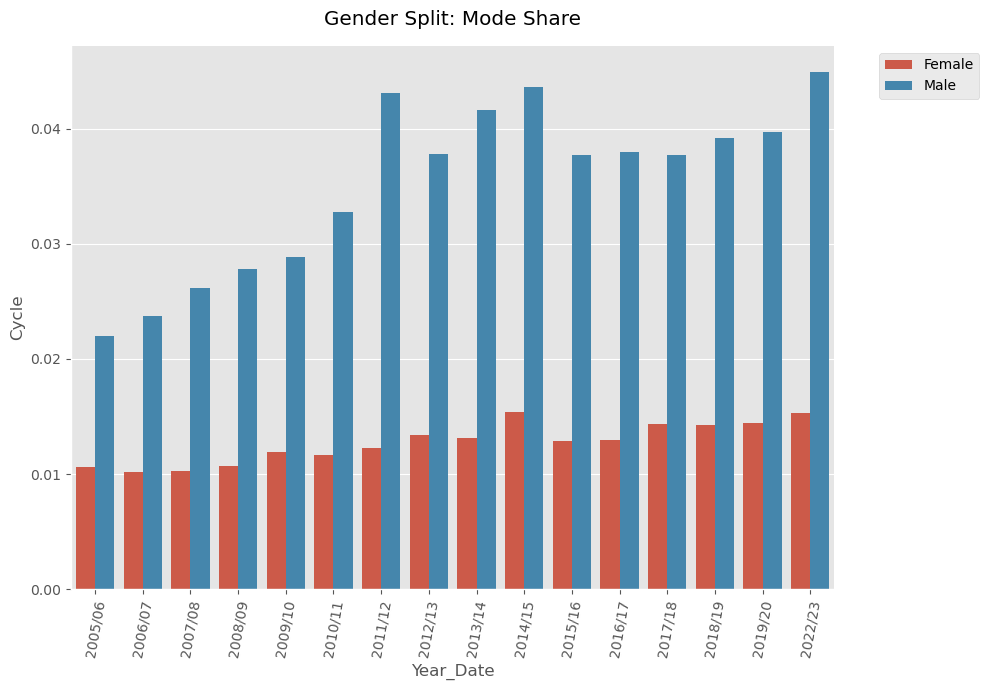

In [117]:
fig, ax = plt.subplots(figsize=(10, 7))
colors = sns.color_palette("colorblind", n_colors=len(n))

sns.barplot(x = 'Year_Date',
            y = 'Cycle',
            hue = 'Gender',
            data = q)

sns.despine()
plt.style.use('ggplot')
plt.xticks(rotation=80)
# title of plot
plt.title("Gender Split: Mode Share",pad=15)

sns.plotting_context("notebook")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.tight_layout()

plt.savefig("compmf_m_shr.png")
plt.show()

### Trip shares by time period

In [118]:
df_tod_shares = pd.read_excel('ltds-0523-acc.xlsx', sheet_name="Time of day - weekdays")

In [119]:
df_tod_shares = df_tod_shares.iloc[13:20,0:17]
#set column names equal to values in row index position 0
df_tod_shares.columns = df_tod_shares.iloc[0]

#remove first row from DataFrame
df_tod_shares = df_tod_shares[1:]

df_tod_shares = df_tod_shares.T

#Set the first row as the header
df_tod_shares.columns = df_tod_shares.iloc[0]

df_tod_shares.index.rename('Year_Date', inplace=True)

df_tod_shares = df_tod_shares[1:]


df_tod_shares = df_tod_shares.T
df_tod_shares
df_tod_shares.T


Trip shares,Early morning (04:00-07:00),Morning peak (07:00-10:00),Inter-peak (10:00-16:00),Evening peak (16:00-19:00),Late evening (19:00-22:00),Night (22:00-04:00)
Year_Date,,,,,,
2005/06,0.02434,0.23838,0.39939,0.21328,0.09368,0.03091
2006/07,0.02582,0.22198,0.40428,0.21437,0.09761,0.03595
2007/08,0.02563,0.22928,0.40285,0.21703,0.09202,0.03319
2008/09,0.02613,0.23205,0.39528,0.22173,0.09104,0.03377
2009/10,0.0272,0.22495,0.40758,0.21675,0.09123,0.03229
2010/11,0.0245,0.23205,0.41149,0.21486,0.08661,0.03049
2011/12,0.02517,0.21753,0.40626,0.21645,0.09812,0.03647
2012/13,0.02483,0.22412,0.39844,0.21627,0.09972,0.03661
2013/14,0.0268,0.22495,0.3996,0.21404,0.09904,0.03559


#### Average weekday trips by start hour

In [120]:
avg_wkd_trip_hr = pd.read_excel('ltds-0523-acc.xlsx', sheet_name="Time of day - weekdays")

In [121]:
avg_wkd_trip_hr
avg_wkd_trip_hr = avg_wkd_trip_hr.iloc[23:48,0:17]

#set column names equal to values in row index position 0
avg_wkd_trip_hr.columns = avg_wkd_trip_hr.iloc[0]

#remove first row from DataFrame
avg_wkd_trip_hr = avg_wkd_trip_hr[1:]
avg_wkd_trip_hr = avg_wkd_trip_hr.T

#Set the first row as the header
avg_wkd_trip_hr.columns = avg_wkd_trip_hr.iloc[0]
avg_wkd_trip_hr.index.rename('Year_Date', inplace=True)
avg_wkd_trip_hr = avg_wkd_trip_hr[1:]
avg_wkd_trip_hr = avg_wkd_trip_hr.T


In [122]:
#subset to last for years of time series 

avg_wkd_trip_hr_ts = avg_wkd_trip_hr[['2017/18', '2018/19', '2019/20', '2022/23']]

<Figure size 600x800 with 0 Axes>

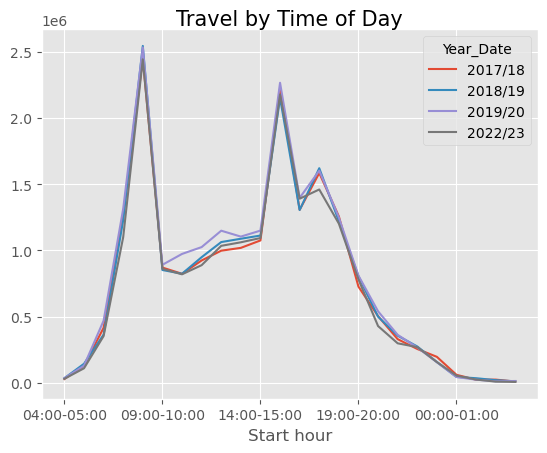

In [123]:
plt.figure(figsize=(6, 8))
colors = sns.color_palette("colorblind", n_colors=len(avg_wkd_trip_hr_ts)) 
avg_wkd_trip_hr_ts.plot(y=['2017/18', '2018/19', '2019/20','2022/23'])

plt.style.use('ggplot')
plt.savefig("avg_wkd_trip_hr_ts.png")
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Travel by Time of Day', fontsize=15, pad=1)
#plt.figure(constrained_layout=True)

plt.savefig("avg_wkd_trip_hr_ts2.png")
plt.show()


## Heathy Streets Scorecard Data

In [124]:
hss = pd.read_excel('Healthy_streets_scorecard.xlsx')

In [125]:
p_cyl_track_perc_hist = pd.read_excel('Healthy_streets_scorecard.xlsx', sheet_name="p_cycle_track")
sch_str_hist = pd.read_excel('Healthy_streets_scorecard.xlsx', sheet_name= "School_Streets")
#p_cyl_track = pd.read_excel('Healthy_streets_scorecard.xlsx', sheet_name="p_cycle_track2_over_time")
LTN = pd.read_excel('Healthy_streets_scorecard.xlsx', sheet_name="LTN")
twenty_mph = pd.read_excel('Healthy_streets_scorecard.xlsx', sheet_name="20MPH")
twenty_mph_hist = pd.read_excel('Healthy_streets_scorecard.xlsx', sheet_name="20mph_speed_limits_19-23")

### Time Series Data

Inner London vs Outer London 

In [126]:
#making the time series for each dataframe of equal legnth


In [127]:
p_cyl_track_perc_hist
p_cyl_track_perc_hist = p_cyl_track_perc_hist.iloc[2:6,0:35]
p_cyl_track_perc_hist


#Set the first row as the header
p_cyl_track_perc_hist.columns = p_cyl_track_perc_hist.iloc[0] 
p_cyl_track_perc_hist = p_cyl_track_perc_hist.iloc[1:].reset_index(drop=True)

p_cyl_track_perc_hist


2,Borough,Kensington & Chelsea,Barnet,Havering,Croydon,Bromley,Lewisham,Redbridge,Hillingdon,Brent,...,Newham,Kingston upon Thames,Greenwich,Westminster,Camden,Hounslow,Enfield,Waltham Forest,City of London,Greater London Average
0,2021,0.002,0.007,0.01,0.006,0.013,0.007,0.012,0.023,0.023,...,0.07,0.059,0.076,0.076,0.078,0.093,0.105,0.124,0.213,0.041
1,2022,0.003,0.007,0.01,0.006,0.013,0.007,0.012,0.023,0.023,...,0.07,0.069,0.076,0.076,0.08,0.095,0.106,0.125,0.226,0.041
2,2023,0.003,0.007,0.01,0.012,0.012,0.015,0.022,0.023,0.024,...,0.073,0.075,0.076,0.076,0.087,0.1,0.107,0.128,0.214,0.044


In [128]:
sch_str_hist
sch_str_hist = sch_str_hist.iloc[2:7,0:35]
sch_str_hist


#Set the first row as the header
sch_str_hist.columns = sch_str_hist.iloc[0] 
sch_str_hist = sch_str_hist.iloc[1:].reset_index(drop=True)
sch_str_hist
#removing first row
#sch_str_hist.drop(sch_str_hist.index[:1], inplace=True)
#sch_str_hist

2,Borough,Bexley,Hammersmith & Fulham,Hillingdon,Bromley,Barnet,Harrow,Greenwich,Redbridge,Kensington & Chelsea,...,Waltham Forest,Croydon,Camden,Hounslow,Brent,Merton,Lewisham,Hackney,Islington,Greater London Average
0,2020,0,0,0.009,0,0,0,0.038,0.02,0.011,...,0.022,0.107,0.031,0.031,0.017,0.039,0,0.08,0.16,0.024
1,2021,0,0.167,0.009,0.052,0.067,0.054,0.099,0.033,0.149,...,0.217,0.172,0.2,0.27,0.307,0.411,0.242,0.391,0.395,0.146
2,2022,0,0,0.009,0.026,0.071,0.055,0.102,0.077,0.122,...,0.265,0.166,0.291,0.303,0.307,0.417,0.398,0.445,0.5,0.181
3,2023,0,0,0.009,0.035,0.037,0.041,0.1,0.111,0.125,...,0.28,0.284,0.287,0.303,0.327,0.411,0.462,0.473,0.507,0.195


In [129]:
#creating 2023 columns  
sch_str_hist_2023 = sch_str_hist.drop(sch_str_hist.index[:3])
sch_str_hist_2023

2,Borough,Bexley,Hammersmith & Fulham,Hillingdon,Bromley,Barnet,Harrow,Greenwich,Redbridge,Kensington & Chelsea,...,Waltham Forest,Croydon,Camden,Hounslow,Brent,Merton,Lewisham,Hackney,Islington,Greater London Average
3,2023,0,0,0.009,0.035,0.037,0.041,0.1,0.111,0.125,...,0.28,0.284,0.287,0.303,0.327,0.411,0.462,0.473,0.507,0.195


In [130]:
sch_str_hist_2023 = sch_str_hist_2023.rename(columns={'Borough': 'Borough_sch_str_hist'})

In [131]:
twenty_mph_hist

twenty_mph_hist = twenty_mph_hist.iloc[2:8,0:35]
twenty_mph_hist

#Set the first row as the header
twenty_mph_hist.columns = twenty_mph_hist.iloc[0] 
twenty_mph_hist = twenty_mph_hist.iloc[2:].reset_index(drop=True)
twenty_mph_hist

2,Borough,Barnet,Bromley,Hillingdon,Bexley,Havering,Redbridge,Enfield,Harrow,Sutton,...,Islington,Kensington & Chelsea,Lambeth,Lewisham,Richmond upon Thames,Southwark,Tower Hamlets,Wandsworth,Westminster,Greater London Average
0,2020,0.043,0.049,0.079,0.095,0.094,0.153,0.218,0.266,0.232,...,0.97,0.102,0.897,0.93,0.064,0.965,0.918,0.8,0.11,0.45
1,2021,0.049,0.049,0.08,0.097,0.099,0.148,0.211,0.249,0.237,...,0.97,1,0.902,0.949,0.949,0.965,0.92,0.809,1,0.52
2,2022,0.049,0.049,0.08,0.097,0.099,0.148,0.211,0.249,0.237,...,0.97,1,0.902,0.949,0.949,0.965,0.92,0.809,1,0.522
3,2023,0.049,0.049,0.08,0.096,0.099,0.148,0.211,0.249,0.255,...,1,1,1,1,1,1,1,1,1,0.532


In [132]:
#creating 2023 columns  
p_cyl_track_perc_hist_2023 = p_cyl_track_perc_hist.drop(p_cyl_track_perc_hist.index[:2])
p_cyl_track_perc_hist_2023

2,Borough,Kensington & Chelsea,Barnet,Havering,Croydon,Bromley,Lewisham,Redbridge,Hillingdon,Brent,...,Newham,Kingston upon Thames,Greenwich,Westminster,Camden,Hounslow,Enfield,Waltham Forest,City of London,Greater London Average
2,2023,0.003,0.007,0.01,0.012,0.012,0.015,0.022,0.023,0.024,...,0.073,0.075,0.076,0.076,0.087,0.1,0.107,0.128,0.214,0.044


In [133]:
#creating 2023 columns  
twenty_mph_hist_2023 = twenty_mph_hist.drop(twenty_mph_hist.index[:3])
twenty_mph_hist_2023

2,Borough,Barnet,Bromley,Hillingdon,Bexley,Havering,Redbridge,Enfield,Harrow,Sutton,...,Islington,Kensington & Chelsea,Lambeth,Lewisham,Richmond upon Thames,Southwark,Tower Hamlets,Wandsworth,Westminster,Greater London Average
3,2023,0.049,0.049,0.08,0.096,0.099,0.148,0.211,0.249,0.255,...,1,1,1,1,1,1,1,1,1,0.532


In [134]:
#creating 2023 columns
p_cyl_track_perc_hist_2023 = p_cyl_track_perc_hist.drop(p_cyl_track_perc_hist.index[:2])
p_cyl_track_perc_hist_2023

2,Borough,Kensington & Chelsea,Barnet,Havering,Croydon,Bromley,Lewisham,Redbridge,Hillingdon,Brent,...,Newham,Kingston upon Thames,Greenwich,Westminster,Camden,Hounslow,Enfield,Waltham Forest,City of London,Greater London Average
2,2023,0.003,0.007,0.01,0.012,0.012,0.015,0.022,0.023,0.024,...,0.073,0.075,0.076,0.076,0.087,0.1,0.107,0.128,0.214,0.044


In [135]:
#rename key column
p_cyl_track_perc_hist_2023.columns

Index(['Borough', 'Kensington & Chelsea', 'Barnet', 'Havering', 'Croydon',
       'Bromley', 'Lewisham', 'Redbridge', 'Hillingdon', 'Brent',
       'Richmond upon Thames', 'Lambeth', 'Bexley', 'Merton', 'Haringey',
       'Sutton', 'Hackney', 'Hammersmith & Fulham', 'Harrow', 'Islington',
       'Ealing', 'Wandsworth', 'Southwark', 'Barking & Dagenham',
       'Tower Hamlets', 'Newham', 'Kingston upon Thames', 'Greenwich',
       'Westminster', 'Camden', 'Hounslow', 'Enfield', 'Waltham Forest',
       'City of London', 'Greater London Average'],
      dtype='object', name=2)

In [136]:
p_cyl_track_perc_hist_2023 = p_cyl_track_perc_hist_2023.rename(columns={'Borough': 'Borough_perc_cyl_trk'})
                                                              

In [137]:
p_cyl_track_perc_hist_2023

2,Borough_perc_cyl_trk,Kensington & Chelsea,Barnet,Havering,Croydon,Bromley,Lewisham,Redbridge,Hillingdon,Brent,...,Newham,Kingston upon Thames,Greenwich,Westminster,Camden,Hounslow,Enfield,Waltham Forest,City of London,Greater London Average
2,2023,0.003,0.007,0.01,0.012,0.012,0.015,0.022,0.023,0.024,...,0.073,0.075,0.076,0.076,0.087,0.1,0.107,0.128,0.214,0.044


In [138]:
twenty_mph_hist_2023 = twenty_mph_hist_2023.rename(columns={'Borough': 'Borough_twenty_mph'})
twenty_mph_hist_2023

2,Borough_twenty_mph,Barnet,Bromley,Hillingdon,Bexley,Havering,Redbridge,Enfield,Harrow,Sutton,...,Islington,Kensington & Chelsea,Lambeth,Lewisham,Richmond upon Thames,Southwark,Tower Hamlets,Wandsworth,Westminster,Greater London Average
3,2023,0.049,0.049,0.08,0.096,0.099,0.148,0.211,0.249,0.255,...,1,1,1,1,1,1,1,1,1,0.532


In [139]:
sch_str_hist_2023

2,Borough_sch_str_hist,Bexley,Hammersmith & Fulham,Hillingdon,Bromley,Barnet,Harrow,Greenwich,Redbridge,Kensington & Chelsea,...,Waltham Forest,Croydon,Camden,Hounslow,Brent,Merton,Lewisham,Hackney,Islington,Greater London Average
3,2023,0,0,0.009,0.035,0.037,0.041,0.1,0.111,0.125,...,0.28,0.284,0.287,0.303,0.327,0.411,0.462,0.473,0.507,0.195


In [140]:
sch_str_hist_2023.T.head()

,3
2,
Borough_sch_str_hist,2023
Bexley,0
Hammersmith & Fulham,0
Hillingdon,0.009
Bromley,0.035


In [141]:
twenty_mph_hist_2023 = twenty_mph_hist_2023.T
twenty_mph_hist_2023 = twenty_mph_hist_2023.reset_index()
twenty_mph_hist_2023
twenty_mph_hist_2023.columns = twenty_mph_hist_2023.iloc[0] 
twenty_mph_hist_2023
twenty_mph_hist_2023 = twenty_mph_hist_2023.iloc[2:].reset_index(drop=True)
twenty_mph_hist_2023

,Borough_twenty_mph,2023
0,Bromley,0.049
1,Hillingdon,0.08
2,Bexley,0.096
3,Havering,0.099
4,Redbridge,0.148
5,Enfield,0.211
6,Harrow,0.249
7,Sutton,0.255
8,Barking & Dagenham,0.274
9,Newham,0.409


In [142]:
p_cyl_track_perc_hist_2023.T

,2
2,
Borough_perc_cyl_trk,2023
Kensington & Chelsea,0.003
Barnet,0.007
Havering,0.01
Croydon,0.012
Bromley,0.012
Lewisham,0.015
Redbridge,0.022
Hillingdon,0.023
